LSTM networks

Load data and make plot of them and timeseries bellow

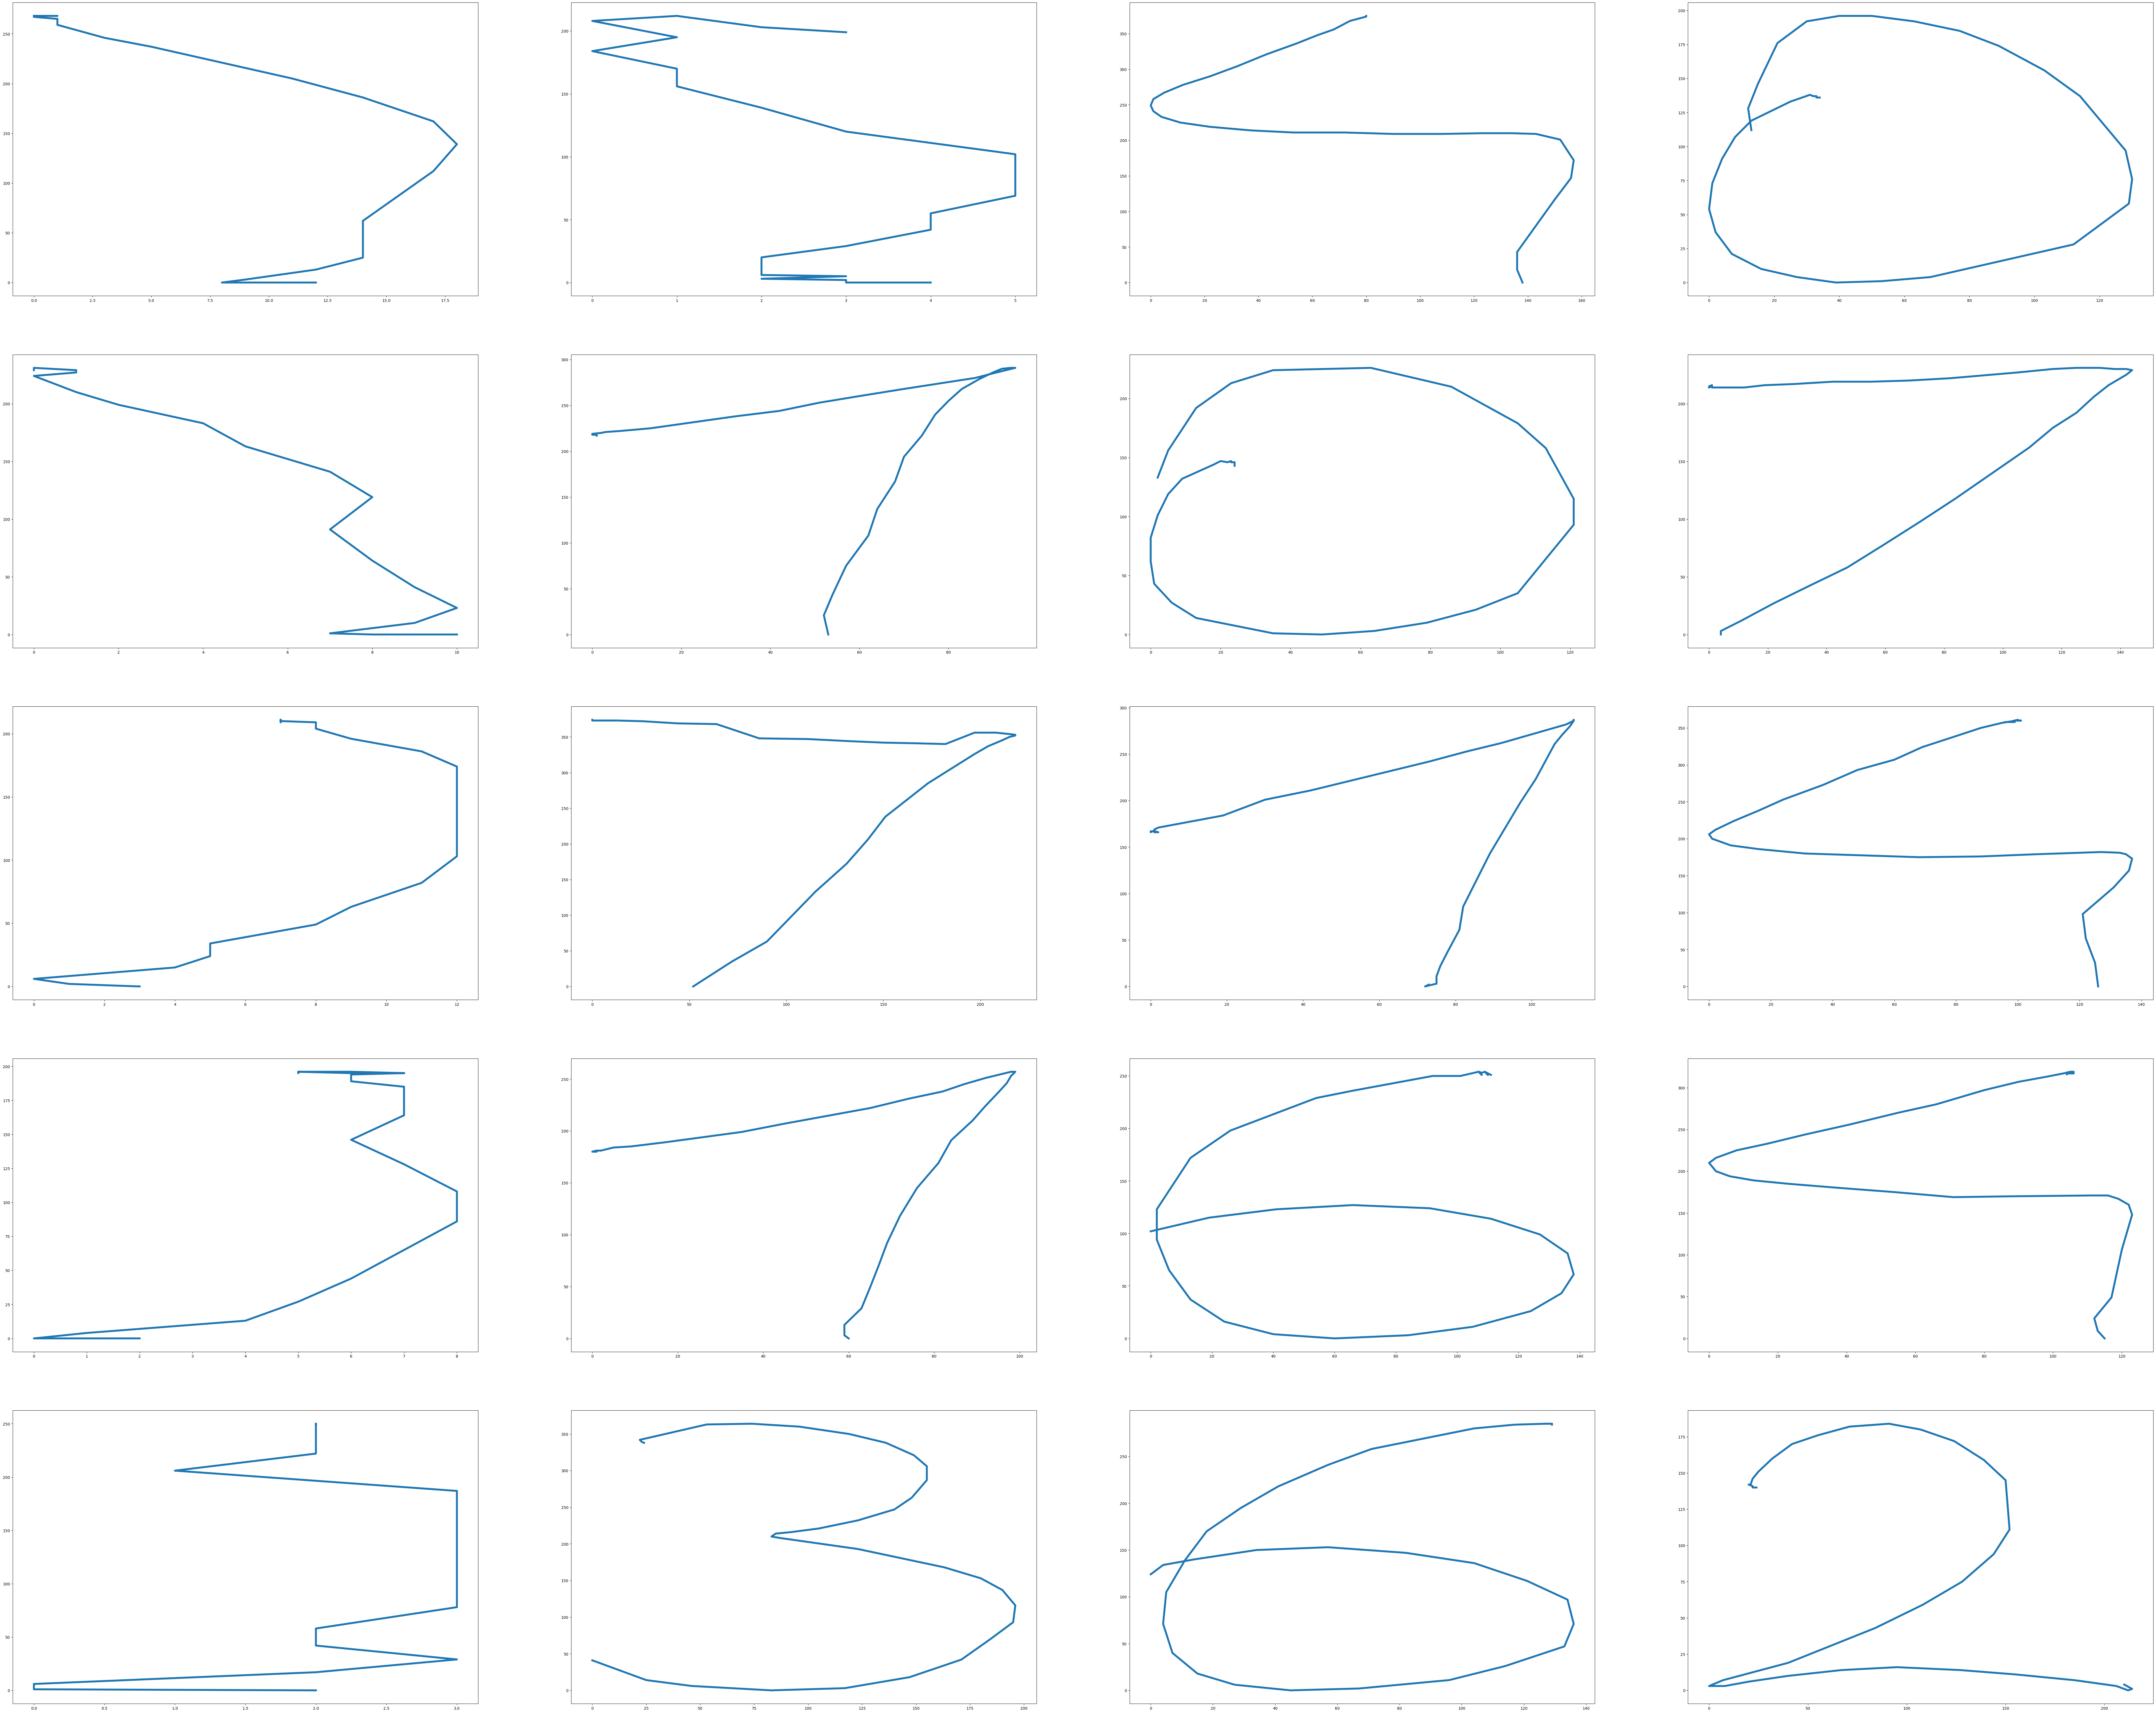

In [2]:
# Load data
import os
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np

def load_mat_files_from_folder(folder_path):
    mat_data = {}
    ytrain_data = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.mat'):
            file_path = os.path.join(folder_path, filename)
            mat_data[filename] = loadmat(file_path)
            mat_data = mat_data['DynCislaData_Python.mat']
            
    return mat_data

folder_path = './'
data = load_mat_files_from_folder(folder_path)
# Train Data
XtrainArr = data['XTrain']
YtrainArr = data['YTrain']
# Test Data
XtestArr = data['XTest']
YtestArr = data['YTest']


NumOfPrints = 0
NumOfPrintsRow = 0
fig, axes = plt.subplots(5, 4, figsize=(5 * 20, 4*20)) 
for i in XtrainArr:
    data = i[0]
    xpoints, ypoints = data[0], data[1]
    axes[NumOfPrints%5,NumOfPrintsRow].plot(xpoints,ypoints,linewidth=5)
    NumOfPrints+=1
    if NumOfPrints%5 == 0:
        NumOfPrintsRow+=1
    if NumOfPrints>19:
        break
plt.show()    


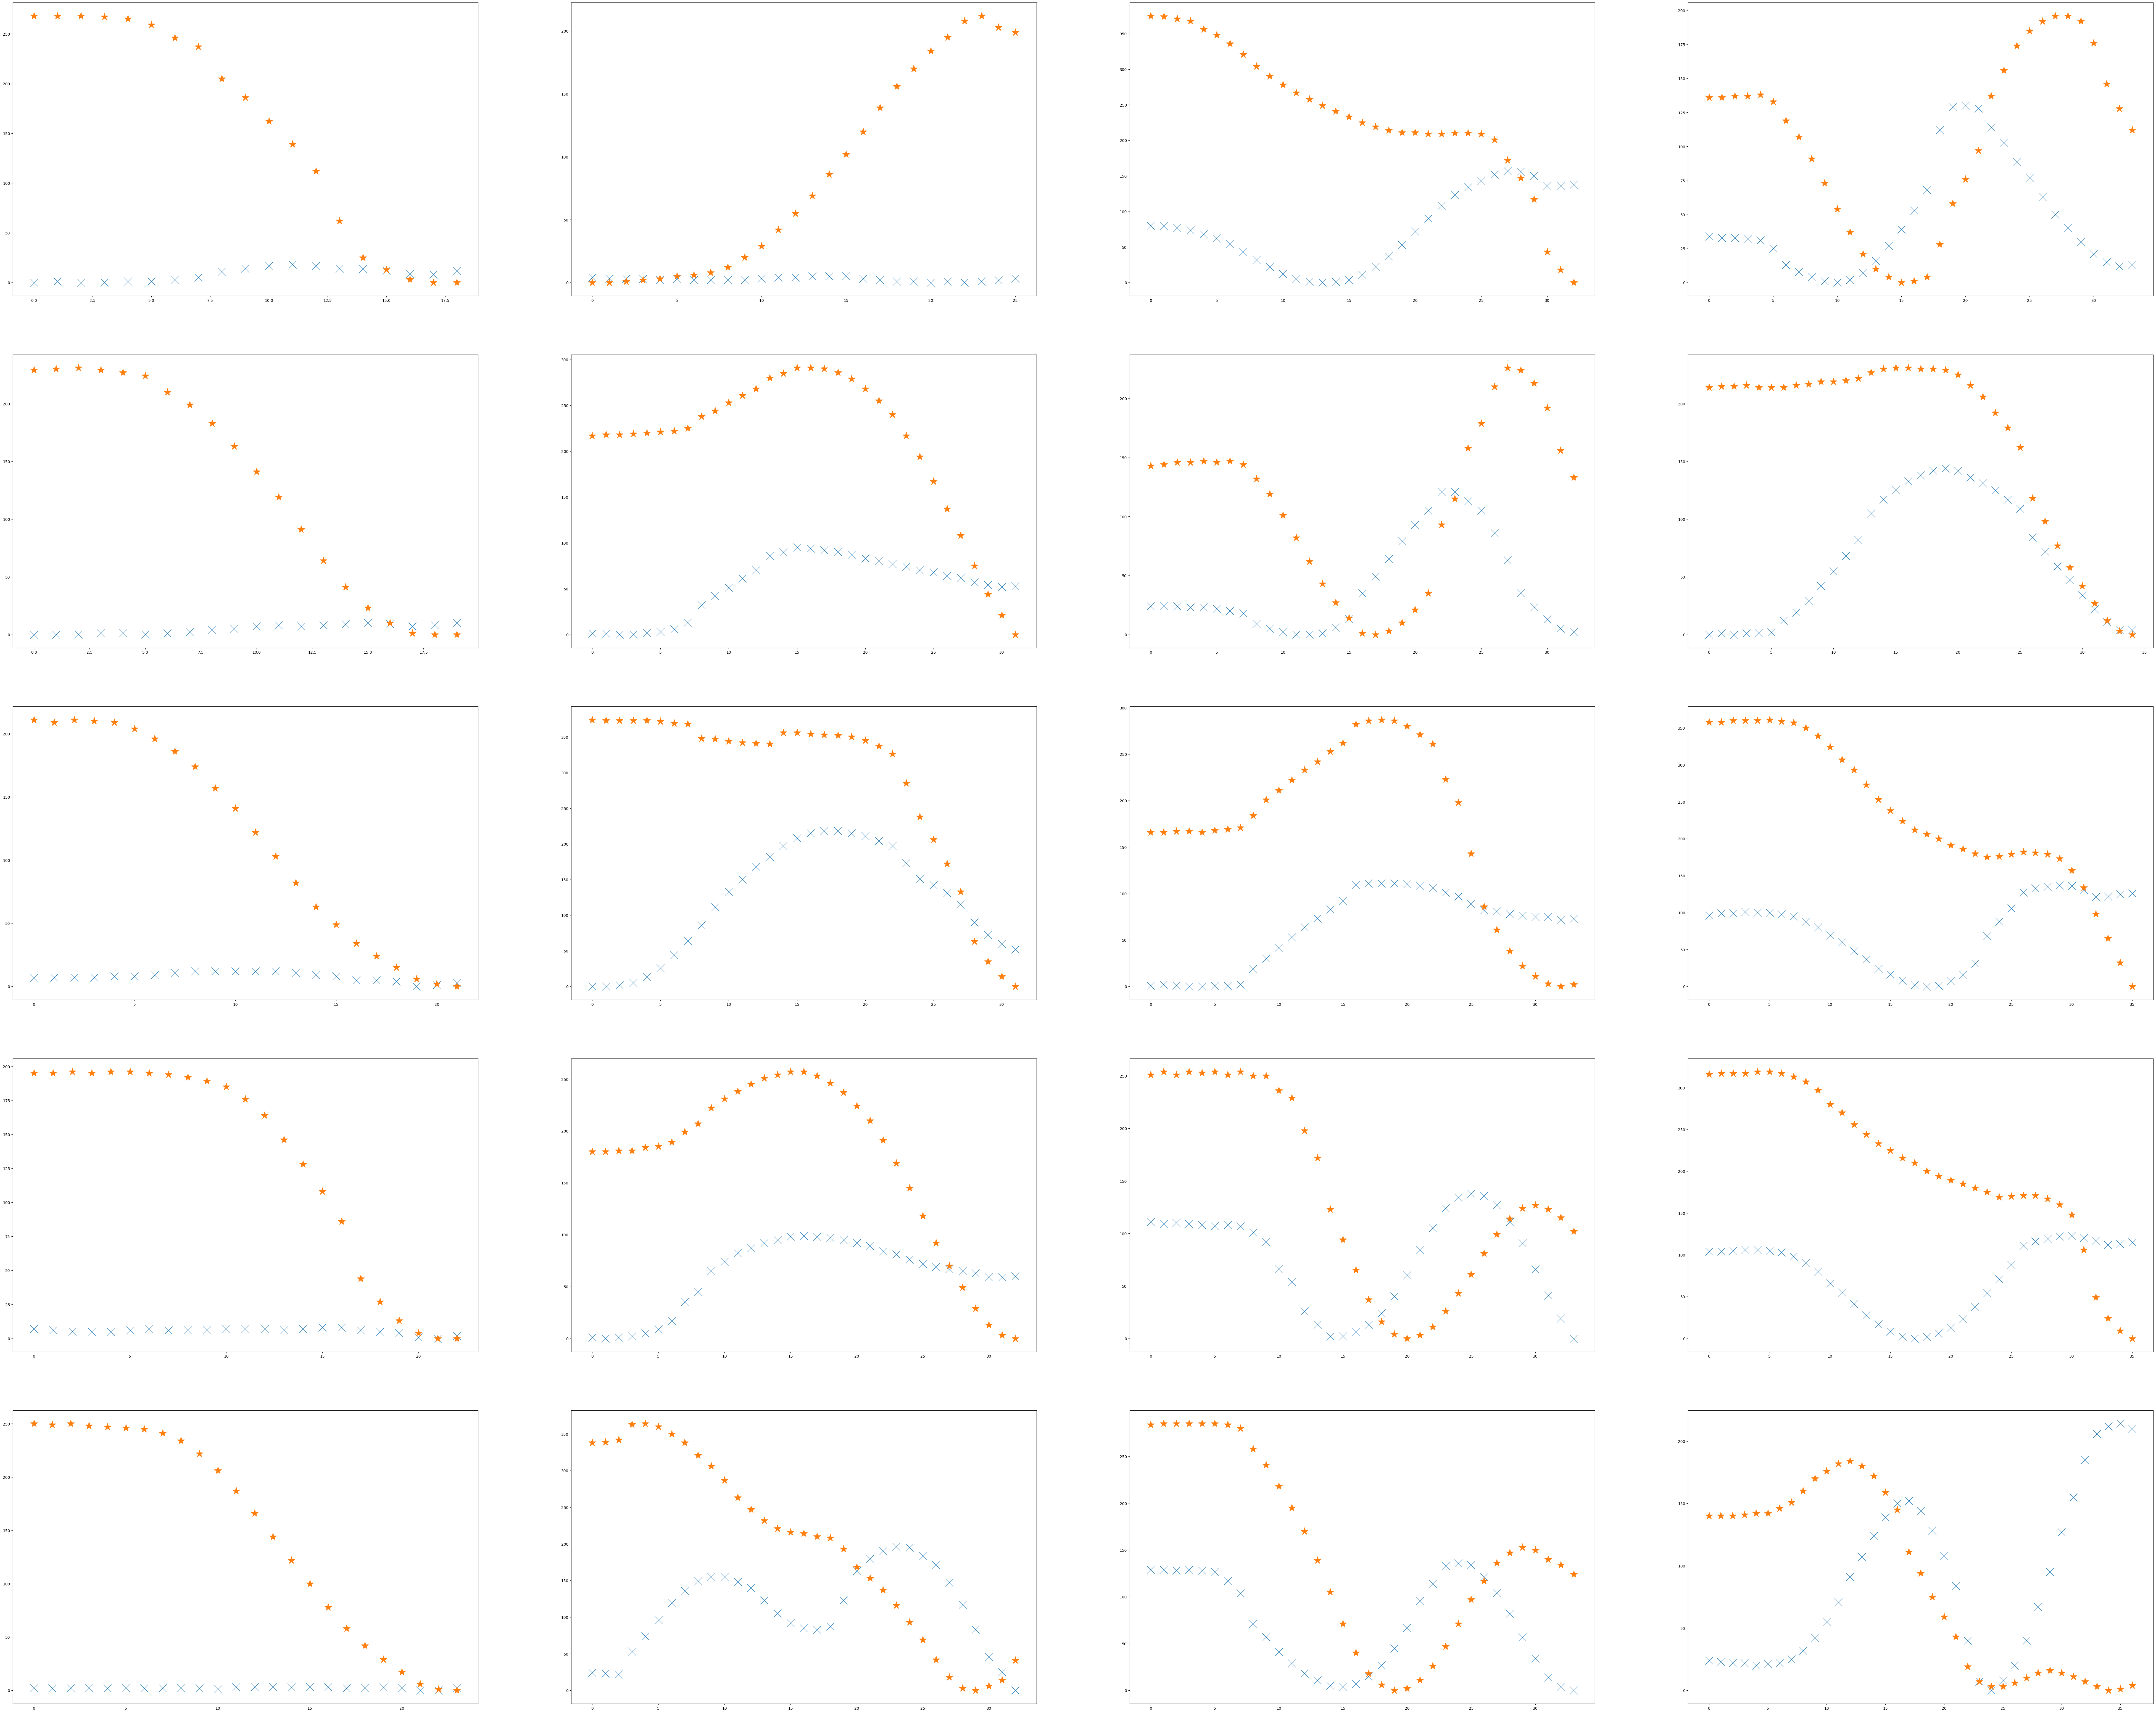

In [3]:
NumOfPrints = 0
NumOfPrintsRow = 0
fig, axes = plt.subplots(5, 4, figsize=(5 * 20, 4*20)) 
for i in XtrainArr:
    data = i[0]
    xpoints, ypoints = data[0], data[1]
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(xpoints)),xpoints,marker="x",linestyle=' ',markersize=20)
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(ypoints)),ypoints,marker="*",linestyle=' ',markersize=20)
    NumOfPrints+=1
    if NumOfPrints%5 == 0:
        NumOfPrintsRow+=1
    if NumOfPrints>19:
        break
plt.show()  

Unifiing length of the samples

In [4]:
import random

def resize_arrays(data, target_length=80,threshold=8):
    data1 = []
    for i, sublist in enumerate(data):
        resized_sublist = []  
        arr1, arr2 = sublist[0]
        filtered_arr1 = []
        filtered_arr2 = []
        new_arr1 = np.zeros(target_length, dtype=arr1.dtype)
        new_arr2 = np.zeros(target_length, dtype=arr2.dtype)

        if arr1.size > target_length:
            endX, endY = arr1[len(arr1)-1],arr2[len(arr1)-1]
            initX, initY = arr1[0],arr2[0]
            for j, (num1, num2) in enumerate(zip(arr1, arr2)):
                distanceInit = np.sqrt((int(num1) - initX)**2 + (int(num2) - initY)**2)
                distanceEnd = np.sqrt((int(num1) - endX)**2 + (int(num2) - endY)**2)
                if distanceInit >= threshold and distanceEnd >= threshold:
                    filtered_arr1.append(num1)
                    filtered_arr2.append(num2)
            
            # Randlmly delete some points to keep it at length 80
            len1 = len(filtered_arr1)
            if len1 > target_length:
                num_to_remove = len1-target_length
                for _ in range(num_to_remove):
                    index_to_remove = random.randint(0, len(filtered_arr1) - 1)
                    filtered_arr1.pop(index_to_remove)
                    filtered_arr2.pop(index_to_remove)
            
            filtered_arr1 = np.array(filtered_arr1, dtype=arr1.dtype)
            filtered_arr2 = np.array(filtered_arr2, dtype=arr2.dtype)
        else:
            filtered_arr1 = np.array(arr1, dtype=arr1.dtype)
            filtered_arr2 = np.array(arr2, dtype=arr2.dtype)
        # Ensure that it will be lenght 80
        new_arr1[:filtered_arr1.size] = filtered_arr1
        new_arr2[:filtered_arr2.size] = filtered_arr2

        resized_sublist.append(new_arr1)
        resized_sublist.append(new_arr2)
        data1.append([resized_sublist])

    return data1
resized_data = resize_arrays(XtrainArr)
resized_test = resize_arrays(XtestArr)

Iterpolation - not used

[ 0.          0.1097561   0.2195122   0.32926829  0.43902439  0.54878049
  0.65853659  0.76829268  0.87804878  0.98780488  0.90243902  0.79268293
  0.68292683  0.57317073  0.46341463  0.35365854  0.24390244  0.13414634
  0.02439024  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.07317073  0.18292683
  0.29268293  0.40243902  0.51219512  0.62195122  0.73170732  0.84146341
  0.95121951  1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.09756098  1.31707317
  1.53658537  1.75609756  1.97560976  2.19512195  2.41463415  2.63414634
  2.85365854  3.07317073  3.29268293  3.51219512  3.73170732  3.95121951
  4.17073171  4.3902439   4.6097561   4.82926829  5.14634146  5.80487805
  6.46341463  7.12195122  7.7804878   8.43902439  9.09756098  9.75609756
 10.41463415 11.03658537 11.36585366 11.69512195 12.02439024 12.35365854
 12.68292683 13.01219512 13.34146341 13.67073171 14.         14.329

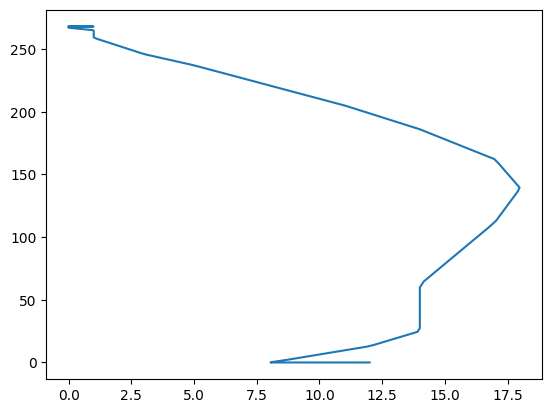

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.08536585  0.20121951  0.31707317  0.43292683  0.54878049  0.66463415
  0.7804878   0.89634146  1.          1.          1.          1.
  1.          1.          1.          1.          1.          0.94512195
  0.82926829  0.71341463  0.59756098  0.48170732  0.36585366  0.25
  0.13414634  0.01829268  0.09756098  0.21341463  0.32926829  0.44512195
  0.56097561  0.67682927  0.79268293  0.90853659  1.02439024  1.1402439
  1.25609756  1.37195122  1.48780488  1.60365854  1.7195122   1.83536585
  1.95121951  2.13414634  2.36585366  2.59756098  2.82926829  3.06097561
  3.29268293  3.52439024  3.75609756  3.98780488  4.1097561   4.22560976
  4.34146341  4.45731707  4.57317073  4.68902439  4.80487805  4.92073171
  5.07317073  5.30487805  5.53658537  5.76829268  6.          6.23170732
  6.46341463  6.6

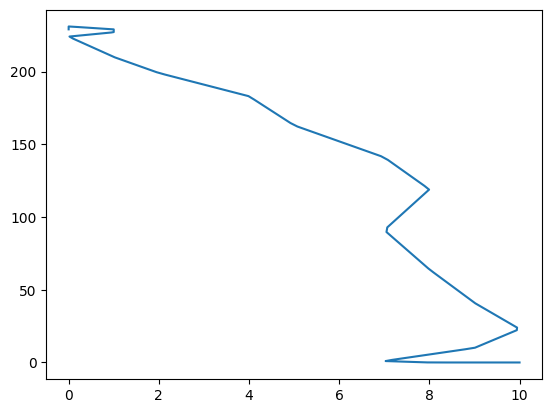

[ 7.          7.          7.          7.          7.          7.
  7.          7.          7.          7.          7.          7.
  7.          7.          7.          7.          7.          7.
  7.          7.          7.          7.          7.          7.
  7.07317073  7.20121951  7.32926829  7.45731707  7.58536585  7.71341463
  7.84146341  7.9695122   8.          8.          8.          8.
  8.          8.          8.          8.          8.12195122  8.25
  8.37804878  8.50609756  8.63414634  8.76219512  8.8902439   9.03658537
  9.29268293  9.54878049  9.80487805 10.06097561 10.31707317 10.57317073
 10.82926829 11.04268293 11.17073171 11.29878049 11.42682927 11.55487805
 11.68292683 11.81097561 11.93902439 12.         12.         12.
 12.         12.         12.         12.         12.         12.
 12.         12.         12.         12.         12.         12.
 12.         12.         12.         12.         12.         12.
 12.         12.         12.         12.         12.    

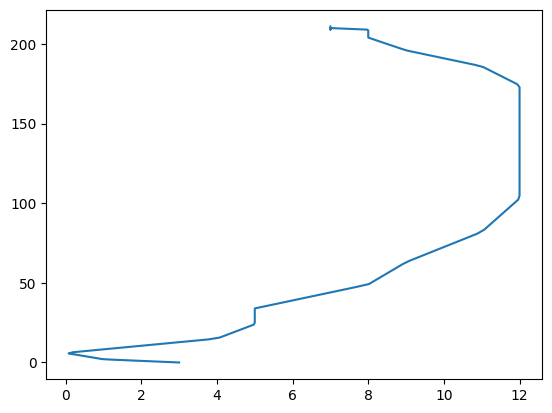

[7.         6.86585366 6.73170732 6.59756098 6.46341463 6.32926829
 6.19512195 6.06097561 5.92682927 5.79268293 5.65853659 5.52439024
 5.3902439  5.25609756 5.12195122 5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.
 5.02439024 5.15853659 5.29268293 5.42682927 5.56097561 5.69512195
 5.82926829 5.96341463 6.09756098 6.23170732 6.36585366 6.5
 6.63414634 6.76829268 6.90243902 6.96341463 6.82926829 6.69512195
 6.56097561 6.42682927 6.29268293 6.15853659 6.02439024 6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.         6.         6.         6.
 6.         6.         6.12195122 6.25609756 6.3902439  6.52439024
 6.65853659 6.79268293 6.92682927 7.         7.         7.
 7.         7.         7.         7.         7.         7.
 7.         7.         7.         7.         7.         7.
 6.92682927 6.79268293 6.65853659 6.52439024 6.3902439  6.25609756
 6.1219

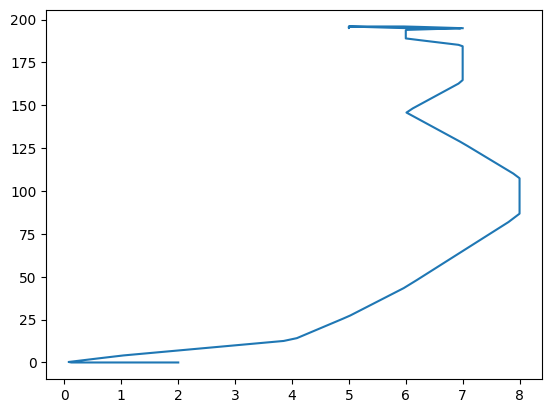

[2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         1.88414634
 1.74390244 1.60365854 1.46341463 1.32317073 1.18292683 1.04268293
 1.19512195 1.47560976 1.75609756 2.03658537 2.31707317 2.59756098
 2.87804878 3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         3.       

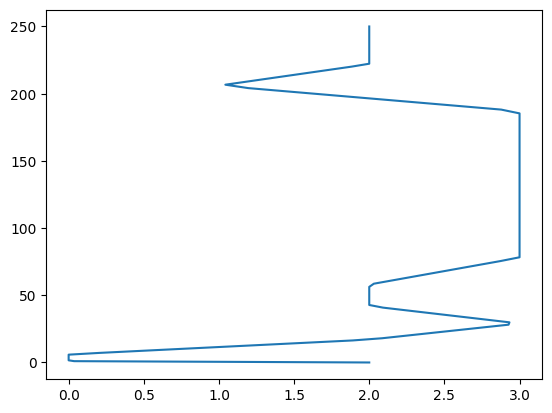

[4.         3.84756098 3.69512195 3.54268293 3.3902439  3.23780488
 3.08536585 3.         3.         3.         3.         3.
 3.         3.         3.         3.         3.         3.
 3.         3.         2.95121951 2.79878049 2.64634146 2.49390244
 2.34146341 2.18902439 2.03658537 2.11585366 2.26829268 2.42073171
 2.57317073 2.72560976 2.87804878 2.9695122  2.81707317 2.66463415
 2.51219512 2.3597561  2.20731707 2.05487805 2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.         2.         2.         2.         2.         2.
 2.14634146 2.29878049 2.45121951 2.60365854 2.75609756 2.90853659
 3.06097561 3.21341463 3.36585366 3.51829268 3.67073171 3.82317073
 3.97560976 4.         4.         4.         4.         4.
 4.         4.04268293 4.19512195 4.34756098 4.5        4.65243902
 4.80487805 4.95731707 5.         5.         5.         5.
 5.         5.         5.         5.         5.         5.


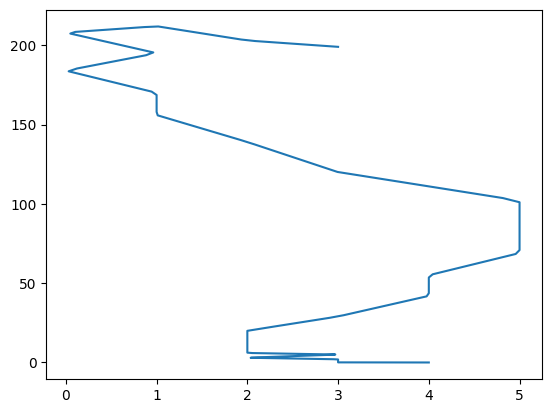

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 8.65853659e-01 6.76829268e-01
 4.87804878e-01 2.98780488e-01 1.09756098e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.87804878e-02 4.26829268e-01 8.04878049e-01 1.18292683e+00
 1.56097561e+00 1.93902439e+00 2.15853659e+00 2.34756098e+00
 2.53658537e+00 2.72560976e+00 2.91463415e+00 3.31097561e+00
 3.87804878e+00 4.44512195e+00 5.01219512e+00 5.57926829e+00
 6.34146341e+00 7.66463415e+00 8.98780488e+00 1.03109756e+01
 1.16341463e+01 1.29573171e+01 1.64756098e+01 2.00670732e+01
 2.36585366e+01 2.72500000e+01 3.08414634e+01 3.32804878e+01
 3.51707317e+01 3.70609756e+01 3.89512195e+01 4.08414634e+01
 4.26585366e+01 4.43597561e+01 4.60609756e+01 4.77621951e+01
 4.94634146e+01 5.11829268e+01 5.30731707e+01 5.49634146e+01
 5.68536585e+01 5.87439024e+01 6.06341463e+01 6.23719512e+01
 6.40731707e+01 6.57743902e+01 6.74756098e+01 6.91768293e+01
 7.15609756e+01 7.458536

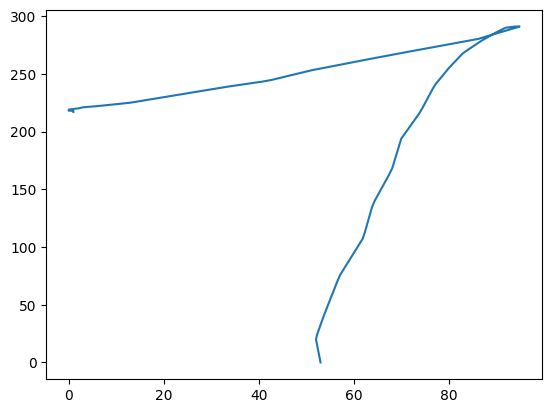

[  0.           0.           0.           0.           0.
   0.           0.26829268   0.64634146   1.02439024   1.40243902
   1.7804878    2.23780488   2.80487805   3.37195122   3.93902439
   4.50609756   5.19512195   6.70731707   8.2195122    9.73170732
  11.24390244  12.75609756  15.06097561  17.51829268  19.97560976
  22.43292683  24.8902439   27.86585366  31.26829268  34.67073171
  38.07317073  41.47560976  44.97560976  48.75609756  52.53658537
  56.31707317  60.09756098  63.87804878  68.02439024  72.18292683
  76.34146341  80.5         84.65853659  89.20121951  93.92682927
  98.65243902 103.37804878 108.10365854 112.6097561  116.76829268
 120.92682927 125.08536585 129.24390244 133.31097561 136.52439024
 139.73780488 142.95121951 146.16463415 149.37804878 152.74390244
 156.14634146 159.54878049 162.95121951 166.35365854 169.36585366
 172.01219512 174.65853659 177.30487805 179.95121951 182.6402439
 185.47560976 188.31097561 191.14634146 193.98170732 196.81707317
 198.94512195 201.0

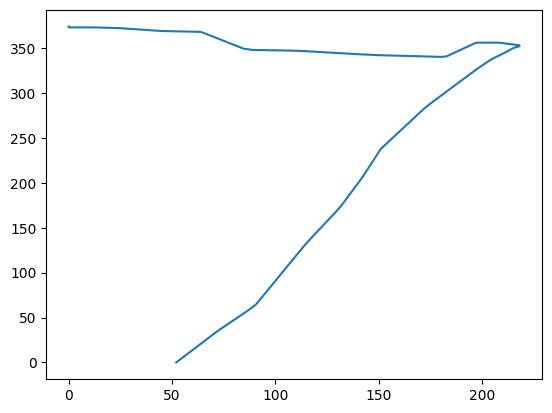

[1.00000000e+00 8.04878049e-01 6.09756098e-01 4.14634146e-01
 2.19512195e-01 2.43902439e-02 1.70731707e-01 3.65853659e-01
 5.60975610e-01 7.56097561e-01 9.51219512e-01 1.14634146e+00
 1.34146341e+00 1.53658537e+00 1.73170732e+00 1.92682927e+00
 2.36585366e+00 2.95121951e+00 3.53658537e+00 4.12195122e+00
 4.70731707e+00 5.39024390e+00 6.17073171e+00 6.95121951e+00
 7.73170732e+00 8.51219512e+00 9.58536585e+00 1.11463415e+01
 1.27073171e+01 1.42682927e+01 1.58292683e+01 1.78780488e+01
 2.13902439e+01 2.49024390e+01 2.84146341e+01 3.19268293e+01
 3.52439024e+01 3.71951220e+01 3.91463415e+01 4.10975610e+01
 4.30487805e+01 4.50000000e+01 4.89024390e+01 5.28048780e+01
 5.67073171e+01 6.06097561e+01 6.45121951e+01 6.65365854e+01
 6.82926829e+01 7.00487805e+01 7.18048780e+01 7.35609756e+01
 7.51707317e+01 7.67317073e+01 7.82926829e+01 7.98536585e+01
 8.14146341e+01 8.26097561e+01 8.35853659e+01 8.45609756e+01
 8.55365854e+01 8.65121951e+01 8.74878049e+01 8.84634146e+01
 8.94390244e+01 9.041463

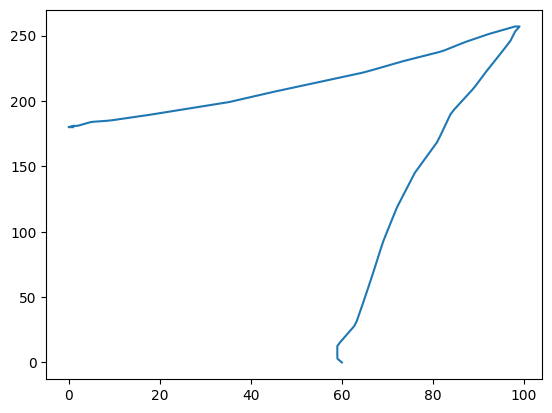

[ 24.          23.80487805  23.6097561   23.41463415  23.2195122
  23.02439024  22.82926829  22.63414634  22.43902439  22.24390244
  22.04878049  26.53658537  32.58536585  38.63414634  44.68292683
  50.73170732  55.56097561  59.65853659  63.75609756  67.85365854
  71.95121951  76.14634146  80.43902439  84.73170732  89.02439024
  93.31707317  97.68292683 102.17073171 106.65853659 111.14634146
 115.63414634 119.82926829 123.14634146 126.46341463 129.7804878
 133.09756098 136.31707317 138.85365854 141.3902439  143.92682927
 146.46341463 149.         150.17073171 151.34146341 152.51219512
 153.68292683 154.85365854 155.         155.         155.
 155.         155.         153.97560976 152.6097561  151.24390244
 149.87804878 148.51219512 147.02439024 145.46341463 143.90243902
 142.34146341 140.7804878  138.34146341 135.02439024 131.70731707
 128.3902439  125.07317073 121.68292683 118.17073171 114.65853659
 111.14634146 107.63414634 104.36585366 101.82926829  99.29268293
  96.75609756  94.21

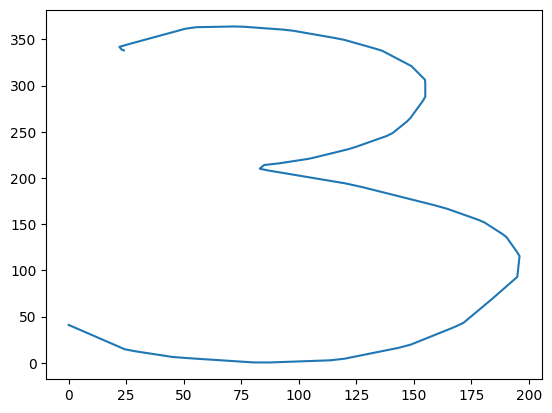

[8.00000000e+01 8.00000000e+01 8.00000000e+01 8.00000000e+01
 8.00000000e+01 8.00000000e+01 7.94878049e+01 7.89024390e+01
 7.83170732e+01 7.77317073e+01 7.71463415e+01 7.65609756e+01
 7.59756098e+01 7.53902439e+01 7.48048780e+01 7.42195122e+01
 7.32682927e+01 7.20975610e+01 7.09268293e+01 6.97560976e+01
 6.85853659e+01 6.74146341e+01 6.62439024e+01 6.50731707e+01
 6.39024390e+01 6.27317073e+01 6.14146341e+01 5.98536585e+01
 5.82926829e+01 5.67317073e+01 5.51707317e+01 5.34634146e+01
 5.13170732e+01 4.91707317e+01 4.70243902e+01 4.48780488e+01
 4.27317073e+01 4.05853659e+01 3.84390244e+01 3.62926829e+01
 3.41463415e+01 3.20000000e+01 3.00487805e+01 2.80975610e+01
 2.61463415e+01 2.41951220e+01 2.22439024e+01 2.02926829e+01
 1.83414634e+01 1.63902439e+01 1.44390244e+01 1.24878049e+01
 1.09756098e+01 9.60975610e+00 8.24390244e+00 6.87804878e+00
 5.51219512e+00 4.51219512e+00 3.73170732e+00 2.95121951e+00
 2.17073171e+00 1.39024390e+00 9.02439024e-01 7.07317073e-01
 5.12195122e-01 3.170731

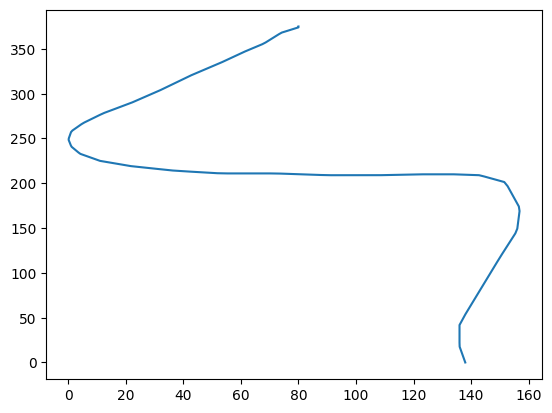

[2.40000000e+01 2.40000000e+01 2.40000000e+01 2.40000000e+01
 2.40000000e+01 2.40000000e+01 2.40000000e+01 2.40000000e+01
 2.40000000e+01 2.40000000e+01 2.40000000e+01 2.38536585e+01
 2.36585366e+01 2.34634146e+01 2.32682927e+01 2.30731707e+01
 2.30000000e+01 2.30000000e+01 2.30000000e+01 2.30000000e+01
 2.30000000e+01 2.29024390e+01 2.27073171e+01 2.25121951e+01
 2.23170732e+01 2.21219512e+01 2.18536585e+01 2.14634146e+01
 2.10731707e+01 2.06829268e+01 2.02926829e+01 1.99024390e+01
 1.95121951e+01 1.91219512e+01 1.87317073e+01 1.83414634e+01
 1.77804878e+01 1.60243902e+01 1.42682927e+01 1.25121951e+01
 1.07560976e+01 9.00000000e+00 8.21951220e+00 7.43902439e+00
 6.65853659e+00 5.87804878e+00 5.09756098e+00 4.48780488e+00
 3.90243902e+00 3.31707317e+00 2.73170732e+00 2.14634146e+00
 1.70731707e+00 1.31707317e+00 9.26829268e-01 5.36585366e-01
 1.46341463e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.75609756e-02 2.92682927e-01
 4.87804878e-01 6.829268

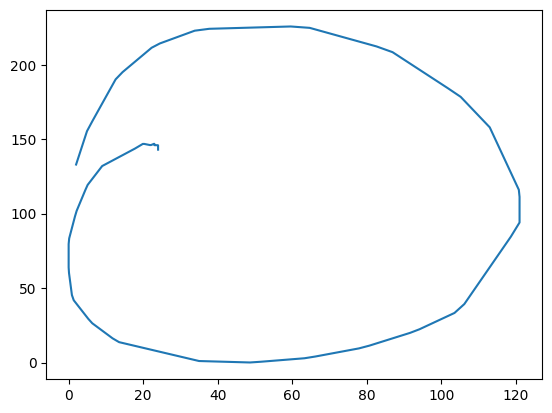

[1.00000000e+00 1.20121951e+00 1.40243902e+00 1.60365854e+00
 1.80487805e+00 1.99390244e+00 1.79268293e+00 1.59146341e+00
 1.39024390e+00 1.18902439e+00 9.87804878e-01 7.86585366e-01
 5.85365854e-01 3.84146341e-01 1.82926829e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.43902439e-02 2.25609756e-01 4.26829268e-01 6.28048780e-01
 8.29268293e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.03658537e+00 1.23780488e+00
 1.43902439e+00 1.64024390e+00 1.84146341e+00 2.72560976e+00
 6.14634146e+00 9.56707317e+00 1.29878049e+01 1.64085366e+01
 1.95365854e+01 2.17500000e+01 2.39634146e+01 2.61768293e+01
 2.83902439e+01 3.06585366e+01 3.30731707e+01 3.54878049e+01
 3.79024390e+01 4.03170732e+01 4.26707317e+01 4.48841463e+01
 4.70975610e+01 4.93109756e+01 5.15243902e+01 5.37378049e+01
 5.59512195e+01 5.81646341e+01 6.03780488e+01 6.25914634e+01
 6.46585366e+01 6.64695122e+01 6.82804878e+01 7.00914634e+01
 7.19024390e+01 7.379268

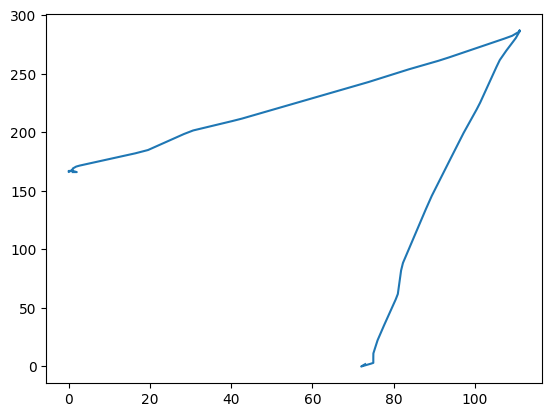

[111.         110.59756098 110.19512195 109.79268293 109.3902439
 109.00609756 109.20731707 109.40853659 109.6097561  109.81097561
 109.98780488 109.78658537 109.58536585 109.38414634 109.18292683
 108.98170732 108.7804878  108.57926829 108.37804878 108.17682927
 107.97560976 107.77439024 107.57317073 107.37195122 107.17073171
 107.0304878  107.23170732 107.43292683 107.63414634 107.83536585
 107.96341463 107.76219512 107.56097561 107.3597561  107.15853659
 106.74390244 105.53658537 104.32926829 103.12195122 101.91463415
 100.56097561  98.75        96.93902439  95.12804878  93.31707317
  90.57317073  85.34146341  80.1097561   74.87804878  69.64634146
  65.26829268  62.85365854  60.43902439  58.02439024  55.6097561
  52.12195122  46.48780488  40.85365854  35.2195122   29.58536585
  25.04878049  22.43292683  19.81707317  17.20121951  14.58536585
  12.12804878   9.91463415   7.70121951   5.48780488   3.27439024
   2.           2.           2.           2.           2.
   2.36585366   3.17

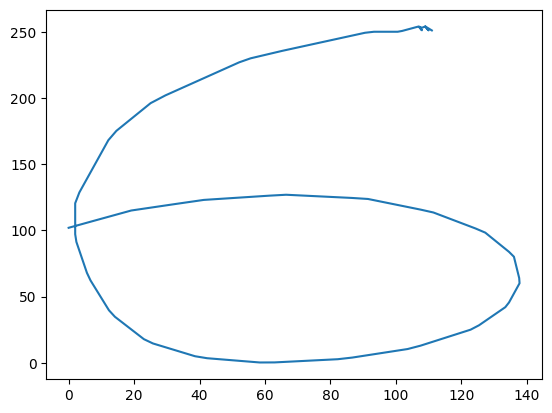

[129.         129.         129.         129.         129.
 128.99390244 128.79268293 128.59146341 128.3902439  128.18902439
 128.01219512 128.21341463 128.41463415 128.61585366 128.81707317
 128.98170732 128.7804878  128.57926829 128.37804878 128.17682927
 127.97560976 127.77439024 127.57317073 127.37195122 127.17073171
 126.69512195 124.68292683 122.67073171 120.65853659 118.64634146
 116.52439024 113.90853659 111.29268293 108.67682927 106.06097561
 102.59146341  95.95121951  89.31097561  82.67073171  76.0304878
  70.31707317  67.5         64.68292683  61.86585366  59.04878049
  56.12195122  52.90243902  49.68292683  46.46341463  43.24390244
  40.26829268  37.85365854  35.43902439  33.02439024  30.6097561
  28.26219512  26.04878049  23.83536585  21.62195122  19.40853659
  17.48780488  16.07926829  14.67073171  13.26219512  11.85365854
  10.52439024   9.31707317   8.1097561    6.90243902   5.69512195
   4.91463415   4.71341463   4.51219512   4.31097561   4.1097561
   4.27439024   4.878

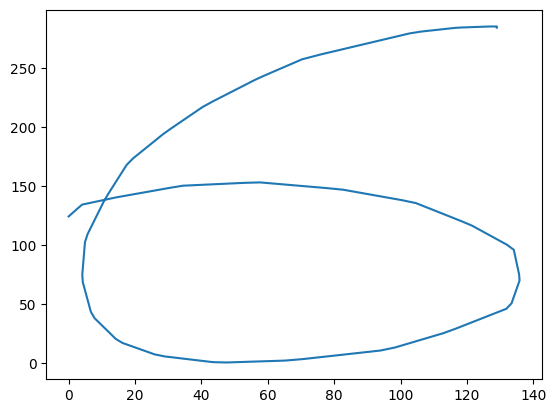

[3.40000000e+01 3.37987805e+01 3.35975610e+01 3.33963415e+01
 3.31951220e+01 3.30000000e+01 3.30000000e+01 3.30000000e+01
 3.30000000e+01 3.30000000e+01 3.29878049e+01 3.27865854e+01
 3.25853659e+01 3.23841463e+01 3.21829268e+01 3.19817073e+01
 3.17804878e+01 3.15792683e+01 3.13780488e+01 3.11768293e+01
 3.08536585e+01 2.96463415e+01 2.84390244e+01 2.72317073e+01
 2.60243902e+01 2.46341463e+01 2.22195122e+01 1.98048780e+01
 1.73902439e+01 1.49756098e+01 1.28170732e+01 1.18109756e+01
 1.08048780e+01 9.79878049e+00 8.79268293e+00 7.82926829e+00
 7.02439024e+00 6.21951220e+00 5.41463415e+00 4.60975610e+00
 3.85365854e+00 3.25000000e+00 2.64634146e+00 2.04268293e+00
 1.43902439e+00 9.45121951e-01 7.43902439e-01 5.42682927e-01
 3.41463415e-01 1.40243902e-01 1.21951220e-01 5.24390244e-01
 9.26829268e-01 1.32926829e+00 1.73170732e+00 2.33536585e+00
 3.34146341e+00 4.34756098e+00 5.35365854e+00 6.35975610e+00
 7.65853659e+00 9.46951220e+00 1.12804878e+01 1.30914634e+01
 1.49024390e+01 1.687195

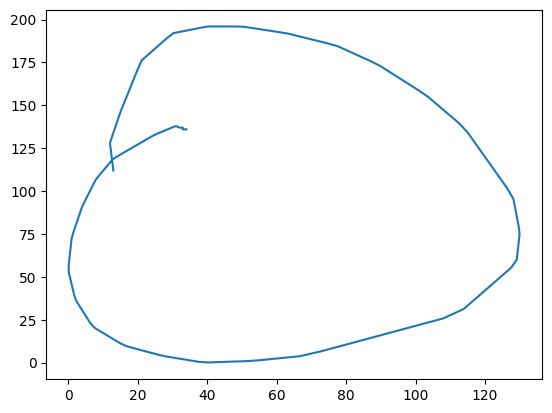

[0.00000000e+00 2.07317073e-01 4.14634146e-01 6.21951220e-01
 8.29268293e-01 9.63414634e-01 7.56097561e-01 5.48780488e-01
 3.41463415e-01 1.34146341e-01 7.31707317e-02 2.80487805e-01
 4.87804878e-01 6.95121951e-01 9.02439024e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.14634146e+00 1.35365854e+00 1.56097561e+00 1.76829268e+00
 1.97560976e+00 3.82926829e+00 5.90243902e+00 7.97560976e+00
 1.00487805e+01 1.20853659e+01 1.35365854e+01 1.49878049e+01
 1.64390244e+01 1.78902439e+01 1.94878049e+01 2.15609756e+01
 2.36341463e+01 2.57073171e+01 2.77804878e+01 3.01097561e+01
 3.28048780e+01 3.55000000e+01 3.81951220e+01 4.08902439e+01
 4.35853659e+01 4.62804878e+01 4.89756098e+01 5.16707317e+01
 5.43658537e+01 5.70609756e+01 5.97560976e+01 6.24512195e+01
 6.51463415e+01 6.78414634e+01 7.07317073e+01 7.36341463e+01
 7.65365854e+01 7.94390244e+01 8.25609756e+01 8.73292683e+01
 9.20975610e+01 9.68658537e+01 1.01634146e+02 1.05731707e+02
 1.08219512e+02 1.107073

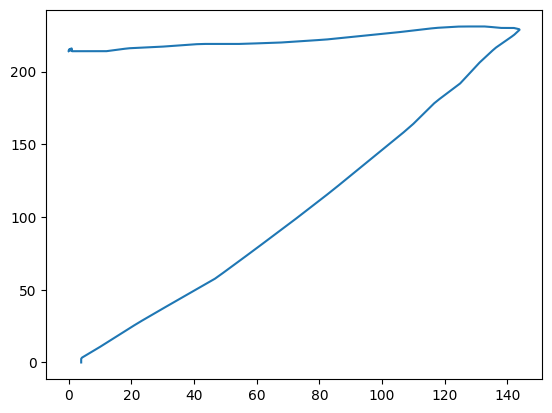

[ 96.          96.6402439   97.2804878   97.92073171  98.56097561
  99.          99.          99.          99.          99.
  99.26829268  99.69512195 100.12195122 100.54878049 100.97560976
 100.79878049 100.58536585 100.37195122 100.15853659 100.
 100.         100.         100.         100.          99.75609756
  99.32926829  98.90243902  98.47560976  98.04878049  97.43292683
  96.79268293  96.15243902  95.51219512  94.70121951  93.20731707
  91.71341463  90.2195122   88.72560976  87.12195122  85.41463415
  83.70731707  82.          80.29268293  78.05487805  75.70731707
  73.3597561   71.01219512  68.72560976  66.80487805  64.88414634
  62.96341463  61.04268293  58.82926829  56.26829268  53.70731707
  51.14634146  48.58536585  46.18902439  43.84146341  41.49390244
  39.14634146  36.76219512  33.98780488  31.21341463  28.43902439
  25.66463415  23.31707317  21.6097561   19.90243902  18.19512195
  16.48780488  14.7804878   13.07317073  11.36585366   9.65853659
   7.96341463   6.68292683

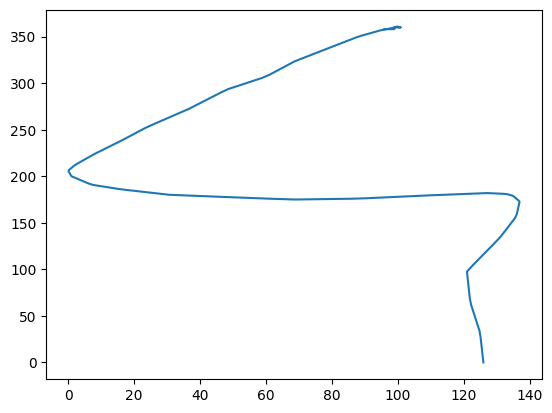

[104.         104.         104.         104.         104.
 104.06707317 104.2804878  104.49390244 104.70731707 104.92073171
 105.13414634 105.34756098 105.56097561 105.77439024 105.98780488
 106.         106.         106.         106.         105.94512195
 105.73170732 105.51829268 105.30487805 105.09146341 104.75609756
 104.32926829 103.90243902 103.47560976 103.04878049 102.05487805
 100.98780488  99.92073171  98.85365854  97.65853659  95.95121951
  94.24390244  92.53658537  90.82926829  88.90243902  86.76829268
  84.63414634  82.5         80.36585366  77.52439024  74.53658537
  71.54878049  68.56097561  65.66463415  63.31707317  60.9695122
  58.62195122  56.27439024  53.63414634  50.64634146  47.65853659
  44.67073171  41.68292683  38.8597561   36.08536585  33.31097561
  30.53658537  27.79878049  25.45121951  23.10365854  20.75609756
  18.40853659  16.23170732  14.31097561  12.3902439   10.4695122
   8.54878049   7.08536585   5.80487805   4.52439024   3.24390244
   1.98780488   1.56

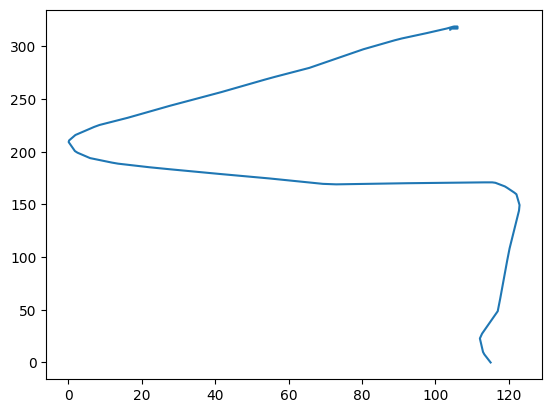

[ 24.          23.7804878   23.56097561  23.34146341  23.12195122
  22.90243902  22.68292683  22.46341463  22.24390244  22.02439024
  22.          22.          22.          22.          21.85365854
  21.41463415  20.97560976  20.53658537  20.09756098  20.17073171
  20.3902439   20.6097561   20.82926829  21.04878049  21.26829268
  21.48780488  21.70731707  21.92682927  22.43902439  23.09756098
  23.75609756  24.41463415  25.17073171  26.70731707  28.24390244
  29.7804878   31.31707317  33.2195122   35.41463415  37.6097561
  39.80487805  42.          44.85365854  47.70731707  50.56097561
  53.41463415  56.56097561  60.07317073  63.58536585  67.09756098
  70.6097561   74.90243902  79.29268293  83.68292683  88.07317073
  92.17073171  95.68292683  99.19512195 102.70731707 106.2195122
 109.90243902 113.63414634 117.36585366 121.09756098 124.73170732
 128.02439024 131.31707317 134.6097561  137.90243902 140.6097561
 143.02439024 145.43902439 147.85365854 150.04878049 150.48780488
 150.92682927

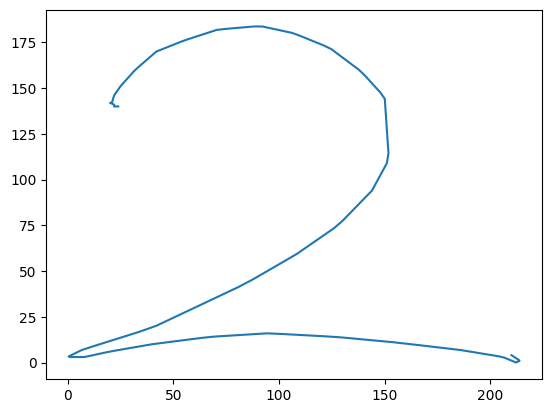

[1.03000000e+02 1.03219512e+02 1.03439024e+02 1.03658537e+02
 1.03878049e+02 1.04195122e+02 1.04634146e+02 1.05073171e+02
 1.05512195e+02 1.05951220e+02 1.05024390e+02 1.03926829e+02
 1.02829268e+02 1.01731707e+02 1.00634146e+02 9.95365854e+01
 9.84390244e+01 9.73414634e+01 9.62439024e+01 9.46341463e+01
 9.28780488e+01 9.11219512e+01 8.93658537e+01 8.74146341e+01
 8.47804878e+01 8.21463415e+01 7.95121951e+01 7.68780488e+01
 7.39512195e+01 7.08780488e+01 6.78048780e+01 6.47317073e+01
 6.16341463e+01 5.83414634e+01 5.50487805e+01 5.17560976e+01
 4.84634146e+01 4.56585366e+01 4.32439024e+01 4.08292683e+01
 3.84146341e+01 3.60000000e+01 3.31463415e+01 3.02926829e+01
 2.74390244e+01 2.45853659e+01 2.20243902e+01 1.98292683e+01
 1.76341463e+01 1.54390244e+01 1.32439024e+01 1.14390244e+01
 9.68292683e+00 7.92682927e+00 6.17073171e+00 4.70731707e+00
 3.82926829e+00 2.95121951e+00 2.07317073e+00 1.19512195e+00
 8.29268293e-01 6.09756098e-01 3.90243902e-01 1.70731707e-01
 4.87804878e-02 2.682926

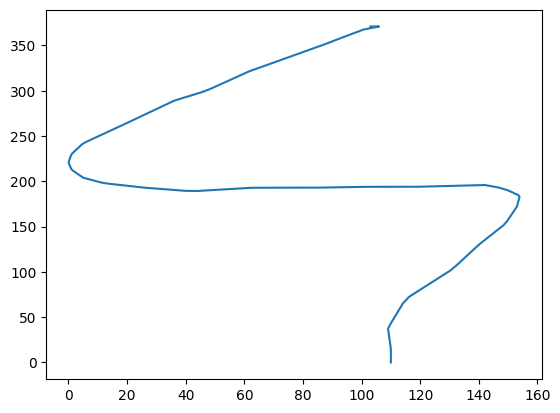

[114.         114.         114.         114.         114.
 114.         114.         114.         114.         114.
 113.80487805 113.58536585 113.36585366 113.14634146 113.07317073
 113.29268293 113.51219512 113.73170732 113.95121951 113.82926829
 113.6097561  113.3902439  113.17073171 113.04878049 113.26829268
 113.48780488 113.70731707 113.92682927 113.85365854 113.63414634
 113.41463415 113.19512195 112.97560976 112.75609756 112.53658537
 112.31707317 112.09756098 112.         112.         112.
 112.         112.         111.34146341 110.68292683 110.02439024
 109.36585366 107.24390244 103.29268293  99.34146341  95.3902439
  91.43902439  88.07317073  84.7804878   81.48780488  78.19512195
  75.19512195  72.7804878   70.36585366  67.95121951  65.53658537
  62.6097561   59.53658537  56.46341463  53.3902439   50.41463415
  47.7804878   45.14634146  42.51219512  39.87804878  35.48780488
  30.2195122   24.95121951  19.68292683  14.85365854  13.53658537
  12.2195122   10.90243902   9.5853

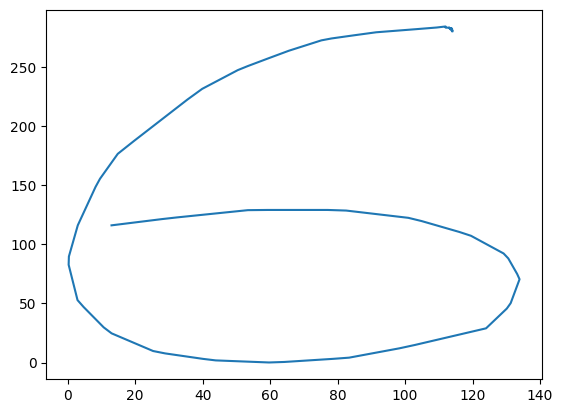

[1.23000000e+02 1.22780488e+02 1.22560976e+02 1.22341463e+02
 1.22121951e+02 1.22097561e+02 1.22317073e+02 1.22536585e+02
 1.22756098e+02 1.22975610e+02 1.22804878e+02 1.22585366e+02
 1.22365854e+02 1.22146341e+02 1.21926829e+02 1.21707317e+02
 1.21487805e+02 1.21268293e+02 1.21048780e+02 1.20829268e+02
 1.20609756e+02 1.20390244e+02 1.20170732e+02 1.19853659e+02
 1.19195122e+02 1.18536585e+02 1.17878049e+02 1.17219512e+02
 1.15829268e+02 1.14073171e+02 1.12317073e+02 1.10560976e+02
 1.08756098e+02 1.06560976e+02 1.04365854e+02 1.02170732e+02
 9.99756098e+01 9.41219512e+01 8.53414634e+01 7.65609756e+01
 6.77804878e+01 5.90000000e+01 5.65853659e+01 5.41707317e+01
 5.17560976e+01 4.93414634e+01 4.67317073e+01 4.38780488e+01
 4.10243902e+01 3.81707317e+01 3.53170732e+01 3.24634146e+01
 2.96097561e+01 2.67560976e+01 2.39024390e+01 2.12682927e+01
 1.90731707e+01 1.68780488e+01 1.46829268e+01 1.24878049e+01
 1.08048780e+01 9.26829268e+00 7.73170732e+00 6.19512195e+00
 4.75609756e+00 3.658536

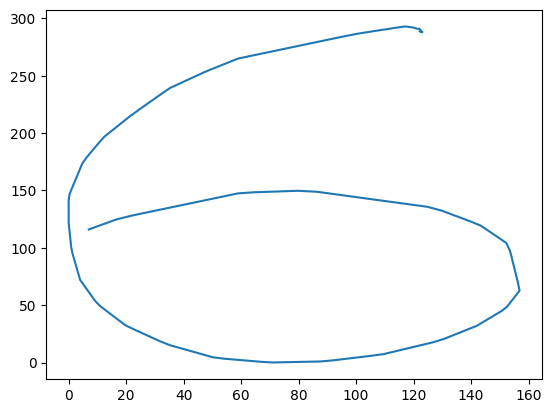

[ 28.          27.7804878   27.56097561  27.34146341  27.12195122
  26.90243902  26.68292683  26.46341463  26.24390244  26.02439024
  25.80487805  25.58536585  25.36585366  25.14634146  25.
  25.          25.          25.          25.          24.82926829
  24.6097561   24.3902439   24.17073171  23.85365854  23.19512195
  22.53658537  21.87804878  21.2195122   20.56097561  19.90243902
  19.24390244  18.58536585  17.90243902  17.02439024  16.14634146
  15.26829268  14.3902439   13.3902439   12.29268293  11.19512195
  10.09756098   9.           8.12195122   7.24390244   6.36585366
   5.48780488   4.70731707   4.04878049   3.3902439    2.73170732
   2.07317073   1.6097561    1.17073171   0.73170732   0.29268293
   0.29268293   1.17073171   2.04878049   2.92682927   3.80487805
   5.02439024   6.34146341   7.65853659   8.97560976  10.43902439
  12.41463415  14.3902439   16.36585366  18.34146341  20.90243902
  23.75609756  26.6097561   29.46341463  32.36585366  35.65853659
  38.95121951  42.

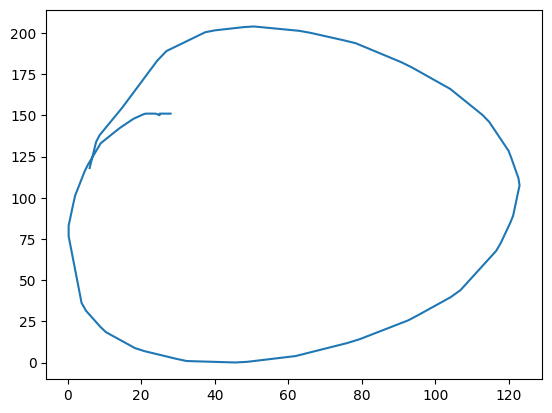

[5.20000000e+01 5.17804878e+01 5.15609756e+01 5.13414634e+01
 5.11219512e+01 5.09024390e+01 5.06829268e+01 5.04634146e+01
 5.02439024e+01 5.00243902e+01 4.96097561e+01 4.91707317e+01
 4.87317073e+01 4.82926829e+01 4.78536585e+01 4.74146341e+01
 4.69756098e+01 4.65365854e+01 4.60975610e+01 4.51463415e+01
 4.40487805e+01 4.29512195e+01 4.18536585e+01 4.07073171e+01
 3.93902439e+01 3.80731707e+01 3.67560976e+01 3.54390244e+01
 3.42682927e+01 3.31707317e+01 3.20731707e+01 3.09756098e+01
 2.98536585e+01 2.85365854e+01 2.72195122e+01 2.59024390e+01
 2.45853659e+01 2.31463415e+01 2.16097561e+01 2.00731707e+01
 1.85365854e+01 1.70000000e+01 1.56829268e+01 1.43658537e+01
 1.30487805e+01 1.17317073e+01 1.04146341e+01 9.09756098e+00
 7.78048780e+00 6.46341463e+00 5.14634146e+00 4.21951220e+00
 3.34146341e+00 2.46341463e+00 1.58536585e+00 9.26829268e-01
 7.07317073e-01 4.87804878e-01 2.68292683e-01 4.87804878e-02
 5.12195122e-01 1.17073171e+00 1.82926829e+00 2.48780488e+00
 3.34146341e+00 4.878048

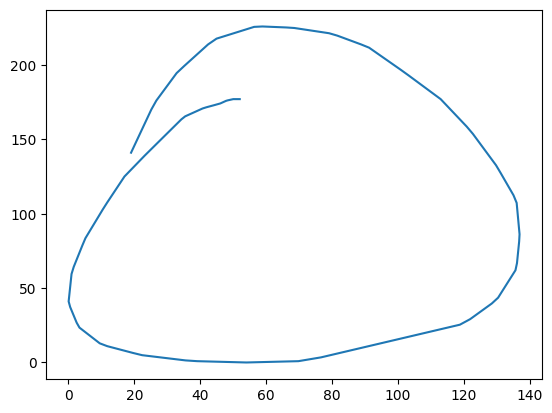

[1.00000000e+00 7.80487805e-01 5.60975610e-01 3.41463415e-01
 1.21951220e-01 9.75609756e-02 3.17073171e-01 5.36585366e-01
 7.56097561e-01 9.75609756e-01 1.19512195e+00 1.41463415e+00
 1.63414634e+00 1.85365854e+00 2.29268293e+00 3.17073171e+00
 4.04878049e+00 4.92682927e+00 5.80487805e+00 6.51219512e+00
 7.17073171e+00 7.82926829e+00 8.48780488e+00 9.29268293e+00
 1.06097561e+01 1.19268293e+01 1.32439024e+01 1.45609756e+01
 1.61707317e+01 1.79268293e+01 1.96829268e+01 2.14390244e+01
 2.32439024e+01 2.54390244e+01 2.76341463e+01 2.98292683e+01
 3.20243902e+01 3.45853659e+01 3.74390244e+01 4.02926829e+01
 4.31463415e+01 4.60000000e+01 4.92926829e+01 5.25853659e+01
 5.58780488e+01 5.91707317e+01 6.42195122e+01 7.14634146e+01
 7.87073171e+01 8.59512195e+01 9.31951220e+01 1.00439024e+02
 1.07682927e+02 1.14926829e+02 1.22170732e+02 1.27878049e+02
 1.30512195e+02 1.33146341e+02 1.35780488e+02 1.38414634e+02
 1.42926829e+02 1.47975610e+02 1.53024390e+02 1.58073171e+02
 1.62439024e+02 1.644146

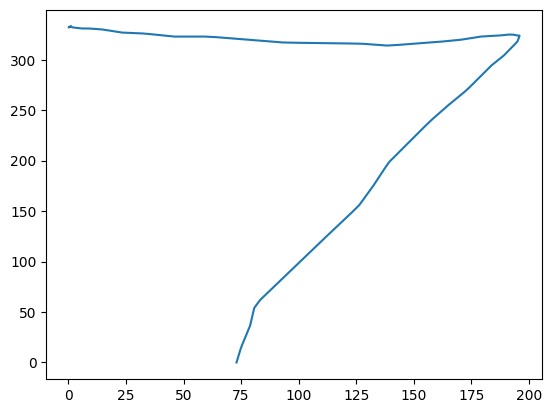

[ 40.          39.77439024  39.54878049  39.32317073  39.09756098
  39.12804878  39.35365854  39.57926829  39.80487805  40.
  40.          40.          40.          40.          39.84146341
  39.61585366  39.3902439   39.16463415  38.87804878  38.42682927
  37.97560976  37.52439024  37.07317073  36.81097561  36.58536585
  36.3597561   36.13414634  35.72560976  35.04878049  34.37195122
  33.69512195  33.01829268  32.56097561  32.1097561   31.65853659
  31.20731707  30.51219512  29.6097561   28.70731707  27.80487805
  26.95121951  26.5         26.04878049  25.59756098  25.14634146
  24.54268293  23.86585366  23.18902439  22.51219512  21.56097561
  19.75609756  17.95121951  16.14634146  14.34146341  13.63414634
  13.18292683  12.73170732  12.2804878   11.48780488  10.13414634
   8.7804878    7.42682927   6.07317073   5.14634146   4.24390244
   3.34146341   2.43902439   1.76829268   1.31707317   0.86585366
   0.41463415   0.           0.           0.           0.
   0.           0.43902439

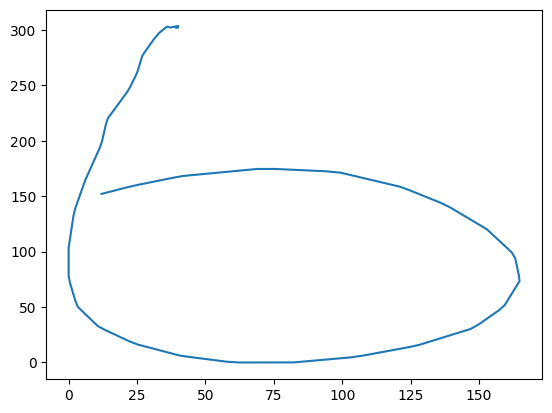

[107.         107.         107.         107.         107.
 107.12804878 107.35365854 107.57926829 107.80487805 108.0304878
 108.25609756 108.48170732 108.70731707 108.93292683 108.84146341
 108.61585366 108.3902439  108.16463415 108.12195122 108.57317073
 109.02439024 109.47560976 109.92682927 109.81097561 109.58536585
 109.3597561  109.13414634 109.09146341 109.31707317 109.54268293
 109.76829268 109.99390244 110.         110.         110.
 110.         110.         110.         110.         110.
 110.         110.         110.         110.         110.
 109.84756098 109.62195122 109.39634146 109.17073171 108.8902439
 108.43902439 107.98780488 107.53658537 107.08536585 103.34146341
  98.82926829  94.31707317  89.80487805  85.8902439   82.95731707
  80.02439024  77.09146341  74.15853659  70.79878049  67.41463415
  64.0304878   60.64634146  57.6097561   54.90243902  52.19512195
  49.48780488  46.74390244  43.58536585  40.42682927  37.26829268
  34.1097561   31.82926829  30.02439024  28.

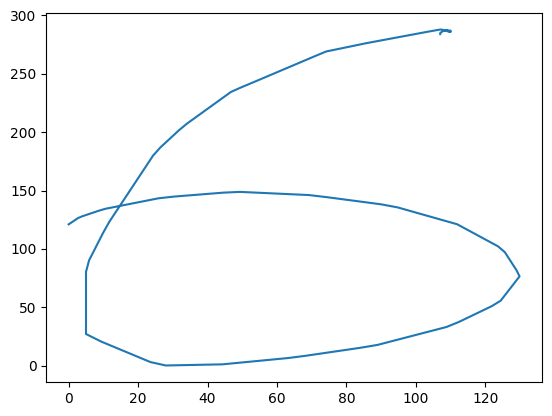

[1.16000000e+02 1.16000000e+02 1.16000000e+02 1.16000000e+02
 1.16000000e+02 1.16000000e+02 1.16000000e+02 1.16000000e+02
 1.16000000e+02 1.15969512e+02 1.15743902e+02 1.15518293e+02
 1.15292683e+02 1.15067073e+02 1.15000000e+02 1.15000000e+02
 1.15000000e+02 1.15000000e+02 1.14939024e+02 1.14713415e+02
 1.14487805e+02 1.14262195e+02 1.14036585e+02 1.13810976e+02
 1.13585366e+02 1.13359756e+02 1.13134146e+02 1.12725610e+02
 1.12048780e+02 1.11371951e+02 1.10695122e+02 1.10018293e+02
 1.08682927e+02 1.07329268e+02 1.05975610e+02 1.04621951e+02
 1.02658537e+02 1.00176829e+02 9.76951220e+01 9.52134146e+01
 9.26585366e+01 8.95000000e+01 8.63414634e+01 8.31829268e+01
 8.00243902e+01 7.71707317e+01 7.44634146e+01 7.17560976e+01
 6.90487805e+01 6.62865854e+01 6.33536585e+01 6.04207317e+01
 5.74878049e+01 5.45548780e+01 5.18048780e+01 4.90975610e+01
 4.63902439e+01 4.36829268e+01 4.09756098e+01 3.82682927e+01
 3.55609756e+01 3.28536585e+01 3.01463415e+01 2.78658537e+01
 2.56097561e+01 2.335365

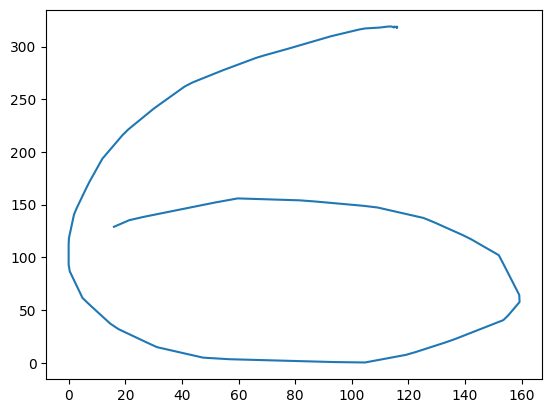

[  0.           0.45121951   0.90243902   1.35365854   1.80487805
   2.38414634   3.06097561   3.73780488   4.41463415   5.15243902
   6.2804878    7.40853659   8.53658537   9.66463415  11.90243902
  14.6097561   17.31707317  20.02439024  22.18292683  22.8597561
  23.53658537  24.21341463  24.8902439   25.94512195  27.07317073
  28.20121951  29.32926829  30.73170732  32.53658537  34.34146341
  36.14634146  37.95121951  40.41463415  42.89634146  45.37804878
  47.8597561   50.70731707  53.86585366  57.02439024  60.18292683
  63.43902439  67.5         71.56097561  75.62195122  79.68292683
  84.04878049  88.56097561  93.07317073  97.58536585 102.20731707
 107.17073171 112.13414634 117.09756098 122.06097561 127.20731707
 132.39634146 137.58536585 142.77439024 147.96341463 153.15243902
 158.34146341 163.5304878  168.7195122  173.69512195 178.65853659
 183.62195122 188.58536585 193.31707317 197.82926829 202.34146341
 206.85365854 211.34756098 215.63414634 219.92073171 224.20731707
 228.493902

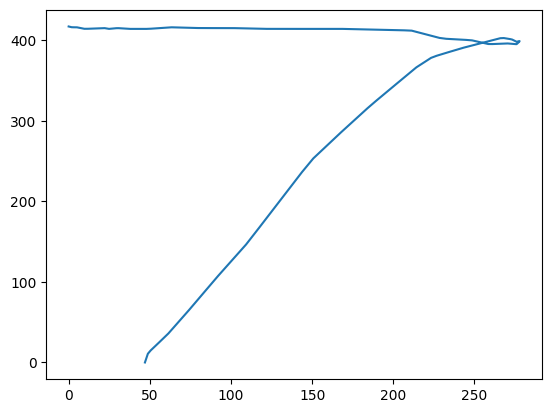

[ 35.          34.77439024  34.54878049  34.32317073  34.09756098
  33.87195122  33.64634146  33.42073171  33.19512195  32.9695122
  32.74390244  32.51829268  32.29268293  32.06707317  31.84146341
  31.61585366  31.3902439   31.16463415  30.93902439  30.71341463
  30.48780488  30.26219512  30.03658537  29.62195122  29.17073171
  28.7195122   28.26829268  27.81707317  27.36585366  26.91463415
  26.46341463  26.01219512  25.12195122  24.2195122   23.31707317
  22.41463415  21.51219512  20.6097561   19.70731707  18.80487805
  17.87804878  16.75        15.62195122  14.49390244  13.36585366
  12.08536585  10.73170732   9.37804878   8.02439024   6.72560976
   5.59756098   4.4695122    3.34146341   2.21341463   1.63414634
   1.18292683   0.73170732   0.2804878    0.17073171   0.62195122
   1.07317073   1.52439024   1.97560976   3.2804878    4.63414634
   5.98780488   7.34146341   8.92682927  10.73170732  12.53658537
  14.34146341  16.40243902  21.36585366  26.32926829  31.29268293
  36.256097

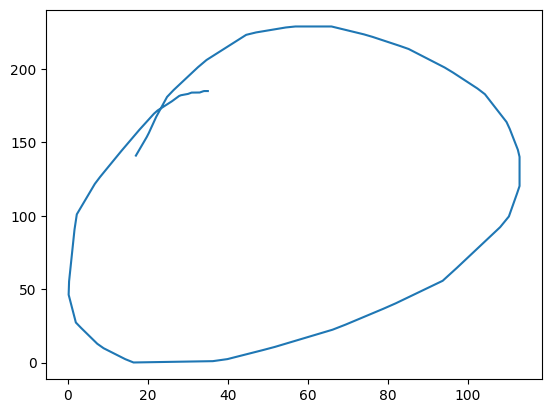

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 8.41463415e-01 6.09756098e-01 3.78048780e-01
 1.46341463e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.21951220e-02 2.43902439e-01 4.75609756e-01
 7.07317073e-01 9.39024390e-01 1.17073171e+00 1.40243902e+00
 1.63414634e+00 1.86585366e+00 2.97560976e+00 5.29268293e+00
 7.60975610e+00 9.92682927e+00 1.22195122e+01 1.43048780e+01
 1.63902439e+01 1.84756098e+01 2.05609756e+01 2.28292683e+01
 2.51463415e+01 2.74634146e+01 2.97804878e+01 3.20975610e+01
 3.44146341e+01 3.67317073e+01 3.90487805e+01 4.12926829e+01
 4.31463415e+01 4.50000000e+01 4.68536585e+01 4.87073171e+01
 5.09512195e+01 5.32682927e+01 5.55853659e+01 5.79024390e+01
 5.99756098e+01 6.18292683e+01 6.36829268e+01 6.55365854e+01
 6.73414634e+01 6.89634146e+01 7.05853659e+01 7.22073171e+01
 7.38292683e+01 7.52439024e+01 7.66341463e+01 7.80243902e+01
 7.94146341e+01 8.08048780e+01 8.21951220e+01 8.35853659e+01
 8.49756098e+01 8.630487

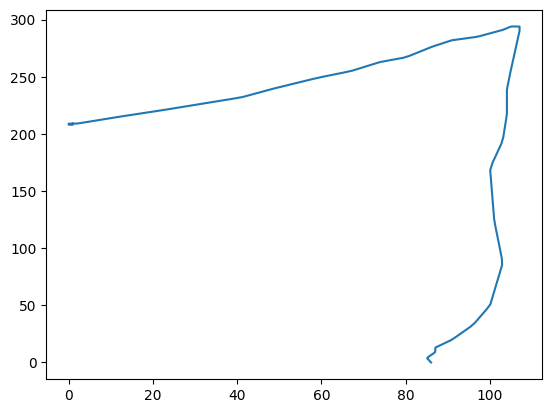

[2.10000000e+01 2.05365854e+01 2.00731707e+01 1.96097561e+01
 1.91463415e+01 1.91585366e+01 1.93902439e+01 1.96219512e+01
 1.98536585e+01 1.99146341e+01 1.96829268e+01 1.94512195e+01
 1.92195122e+01 1.89878049e+01 1.87560976e+01 1.85243902e+01
 1.82926829e+01 1.80609756e+01 1.81707317e+01 1.84024390e+01
 1.86341463e+01 1.88658537e+01 1.89024390e+01 1.86707317e+01
 1.84390244e+01 1.82073171e+01 1.80487805e+01 1.85121951e+01
 1.89756098e+01 1.94390244e+01 1.99024390e+01 2.07317073e+01
 2.16585366e+01 2.25853659e+01 2.35121951e+01 2.49878049e+01
 2.70731707e+01 2.91585366e+01 3.12439024e+01 3.33658537e+01
 3.56829268e+01 3.80000000e+01 4.03170732e+01 4.26341463e+01
 4.59268293e+01 4.94024390e+01 5.28780488e+01 5.63536585e+01
 6.04390244e+01 6.50731707e+01 6.97073171e+01 7.43414634e+01
 7.89268293e+01 8.33292683e+01 8.77317073e+01 9.21341463e+01
 9.65365854e+01 1.00731707e+02 1.04902439e+02 1.09073171e+02
 1.13243902e+02 1.17146341e+02 1.20853659e+02 1.24560976e+02
 1.28268293e+02 1.317317

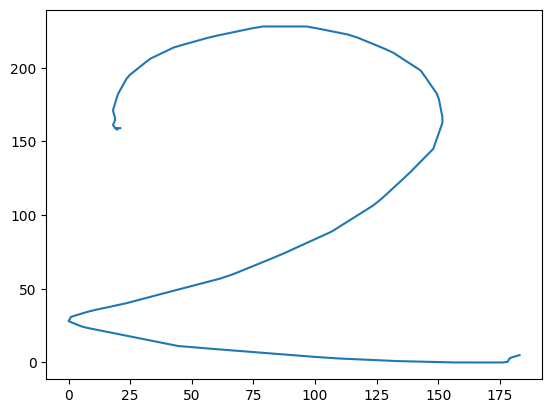

[9.80000000e+01 9.77682927e+01 9.75365854e+01 9.73048780e+01
 9.70731707e+01 9.68414634e+01 9.66097561e+01 9.63780488e+01
 9.61463415e+01 9.58292683e+01 9.53658537e+01 9.49024390e+01
 9.44390244e+01 9.39268293e+01 9.25365854e+01 9.11463415e+01
 8.97560976e+01 8.83658537e+01 8.52682927e+01 8.15609756e+01
 7.78536585e+01 7.41463415e+01 7.08292683e+01 6.80487805e+01
 6.52682927e+01 6.24878049e+01 5.94878049e+01 5.46219512e+01
 4.97560976e+01 4.48902439e+01 4.00243902e+01 3.69878049e+01
 3.44390244e+01 3.18902439e+01 2.93414634e+01 2.69024390e+01
 2.45853659e+01 2.22682927e+01 1.99512195e+01 1.77439024e+01
 1.61219512e+01 1.45000000e+01 1.28780488e+01 1.12560976e+01
 1.02195122e+01 9.29268293e+00 8.36585366e+00 7.43902439e+00
 6.51219512e+00 5.58536585e+00 4.65853659e+00 3.73170732e+00
 2.90243902e+00 2.43902439e+00 1.97560976e+00 1.51219512e+00
 1.04878049e+00 7.92682927e-01 5.60975610e-01 3.29268293e-01
 9.75609756e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.439024

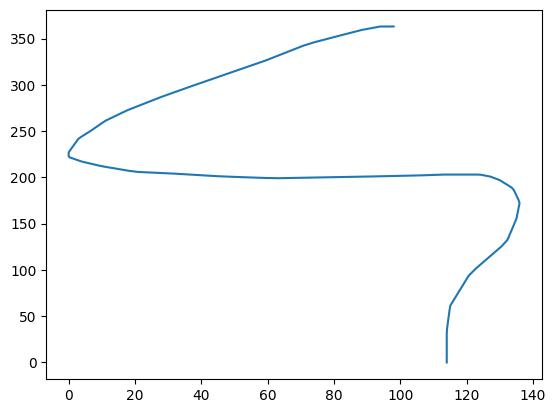

[9.90000000e+01 9.87682927e+01 9.85365854e+01 9.83048780e+01
 9.80731707e+01 9.81585366e+01 9.83902439e+01 9.86219512e+01
 9.88536585e+01 9.89146341e+01 9.86829268e+01 9.84512195e+01
 9.82195122e+01 9.80000000e+01 9.80000000e+01 9.80000000e+01
 9.80000000e+01 9.80000000e+01 9.78292683e+01 9.75975610e+01
 9.73658537e+01 9.71341463e+01 9.68048780e+01 9.63414634e+01
 9.58780488e+01 9.54146341e+01 9.49512195e+01 9.44878049e+01
 9.40243902e+01 9.35609756e+01 9.30975610e+01 9.19024390e+01
 9.05121951e+01 8.91219512e+01 8.77317073e+01 8.59024390e+01
 8.35853659e+01 8.12682927e+01 7.89512195e+01 7.65609756e+01
 7.37804878e+01 7.10000000e+01 6.82195122e+01 6.54390244e+01
 6.24634146e+01 5.94512195e+01 5.64390244e+01 5.34268293e+01
 5.05365854e+01 4.77560976e+01 4.49756098e+01 4.21951220e+01
 3.95609756e+01 3.74756098e+01 3.53902439e+01 3.33048780e+01
 3.12195122e+01 2.85121951e+01 2.57317073e+01 2.29512195e+01
 2.01707317e+01 1.79268293e+01 1.60731707e+01 1.42195122e+01
 1.23658537e+01 1.069512

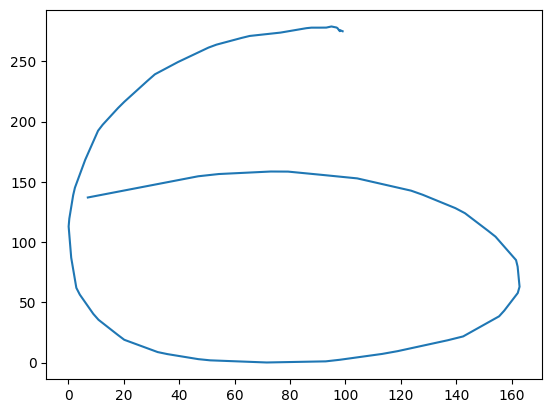

[1.30000000e+01 1.27682927e+01 1.25365854e+01 1.23048780e+01
 1.20731707e+01 1.21585366e+01 1.23902439e+01 1.26219512e+01
 1.28536585e+01 1.29146341e+01 1.26829268e+01 1.24512195e+01
 1.22195122e+01 1.19878049e+01 1.17560976e+01 1.15243902e+01
 1.12926829e+01 1.10609756e+01 1.08292683e+01 1.05975610e+01
 1.03658537e+01 1.01341463e+01 9.90243902e+00 9.67073171e+00
 9.43902439e+00 9.20731707e+00 8.95121951e+00 8.48780488e+00
 8.02439024e+00 7.56097561e+00 7.09756098e+00 6.63414634e+00
 6.17073171e+00 5.70731707e+00 5.24390244e+00 4.78048780e+00
 4.31707317e+00 3.85365854e+00 3.39024390e+00 2.92682927e+00
 2.46341463e+00 2.00000000e+00 1.53658537e+00 1.07317073e+00
 8.04878049e-01 5.73170732e-01 3.41463415e-01 1.09756098e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.95121951e-01 1.12195122e+00 2.04878049e+00 2.97560976e+00
 3.90243902e+00 5.24390244e+00 6.63414634e+00 8.02439024e+00
 9.41463415e+00 1.12073171e+01 1.32926829e+01 1.53780488e+01
 1.74634146e+01 1.973170

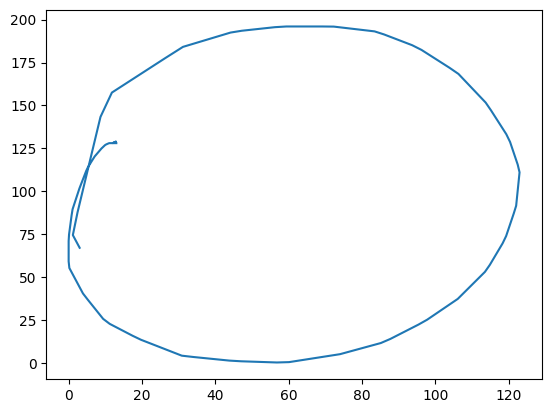

[ 2.          1.76219512  1.52439024  1.28658537  1.04878049  1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          1.          1.          1.          1.
  1.          1.          0.81707317  0.57926829  0.34146341  0.10365854
  0.13414634  0.37195122  0.6097561   0.84756098  0.91463415  0.67682927
  0.43902439  0.20121951  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.17682927
  0.41463415  0.65243902  0.8902439   1.12804878  1.36585366  1.60365854
  1.84146341  2.23780488  2.95121951  3.66463415  4.37804878  5.18292683
  6.6097561   8.03658537  9.46341463 10.8902439  12.75609756 14.65853659
 16.56097561 18.46341463 20.70731707 23.08536585 25.46341463 27.84146341
 31.80487805 37.27439024 42.74390244 48.21341463 52.73170732 55.1097561
 57.48780488 59.86585366 62.2195122  64.3597561  66.5        68.6402439
 70.7804878  72.7073

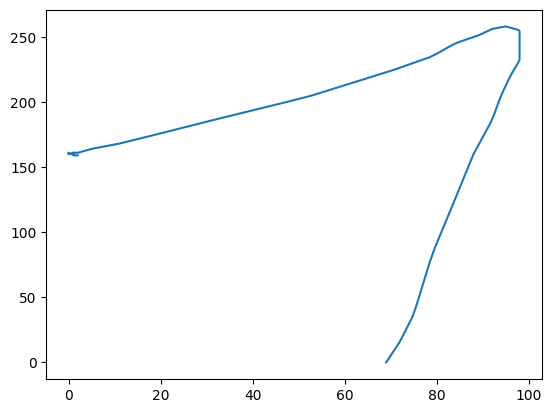

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 8.10975610e-01 5.73170732e-01 3.35365854e-01
 9.75609756e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 2.68292683e-01 7.43902439e-01
 1.21951220e+00 1.69512195e+00 2.42682927e+00 3.61585366e+00
 4.80487805e+00 5.99390244e+00 7.14634146e+00 8.09756098e+00
 9.04878049e+00 1.00000000e+01 1.09512195e+01 1.23536585e+01
 1.37804878e+01 1.52073171e+01 1.66341463e+01 1.82378049e+01
 1.99024390e+01 2.15670732e+01 2.32317073e+01 2.50243902e+01
 2.69268293e+01 2.88292683e+01 3.07317073e+01 3.27134146e+01
 3.48536585e+01 3.69939024e+01 3.91341463e+01 4.14878049e+01
 4.52926829e+01 4.90975610e+01 5.29024390e+01 5.67073171e+01
 5.89756098e+01 6.111585

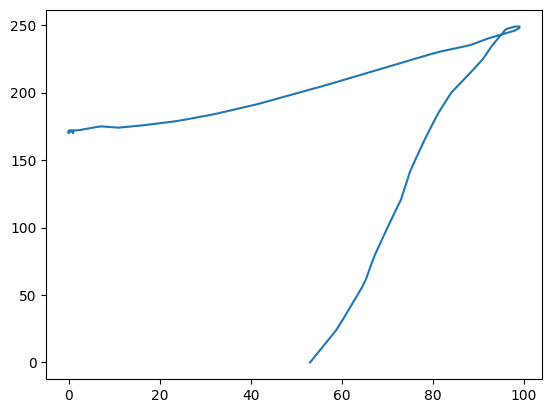

[ 23.          23.23780488  23.47560976  23.71341463  23.95121951
  24.          24.          24.          24.          23.8597561
  23.62195122  23.38414634  23.14634146  23.          23.
  23.          23.          23.          23.          23.
  23.          23.          22.76829268  22.5304878   22.29268293
  22.05487805  22.          22.          22.          22.
  22.26829268  22.74390244  23.2195122   23.69512195  24.42682927
  25.61585366  26.80487805  27.99390244  29.25609756  30.92073171
  32.58536585  34.25        35.91463415  38.48170732  41.09756098
  43.71341463  46.32926829  49.47560976  52.80487805  56.13414634
  59.46341463  62.92073171  66.48780488  70.05487805  73.62195122
  77.34756098  81.3902439   85.43292683  89.47560976  93.48780488
  97.29268293 101.09756098 104.90243902 108.70731707 111.63414634
 114.48780488 117.34146341 120.19512195 122.87804878 125.49390244
 128.1097561  130.72560976 132.48780488 133.43902439 134.3902439
 135.34146341 136.14634146 136.62195

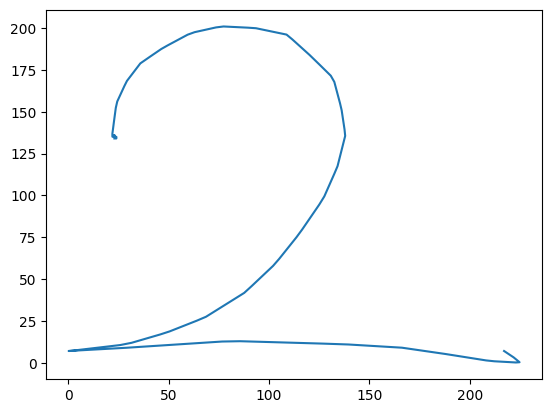

[2.70000000e+01 2.70000000e+01 2.70000000e+01 2.70000000e+01
 2.70000000e+01 2.70000000e+01 2.70000000e+01 2.70000000e+01
 2.70000000e+01 2.68597561e+01 2.66219512e+01 2.63841463e+01
 2.61463415e+01 2.60000000e+01 2.60000000e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.60000000e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.60000000e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.60000000e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.60000000e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.59146341e+01 2.56768293e+01
 2.54390244e+01 2.52012195e+01 2.50000000e+01 2.50000000e+01
 2.50000000e+01 2.50000000e+01 2.50000000e+01 2.47743902e+01
 2.45365854e+01 2.42987805e+01 2.40609756e+01 2.41768293e+01
 2.44146341e+01 2.46524390e+01 2.48902439e+01 2.57682927e+01
 2.71951220e+01 2.86219512e+01 3.00487805e+01 3.23475610e+01
 3.63902439e+01 4.04329268e+01 4.44756098e+01 4.83353659e+01
 5.09512195e+01 5.35670732e+01 5.61829268e+01 5.87987805e+01
 6.18536585e+01 6.494512

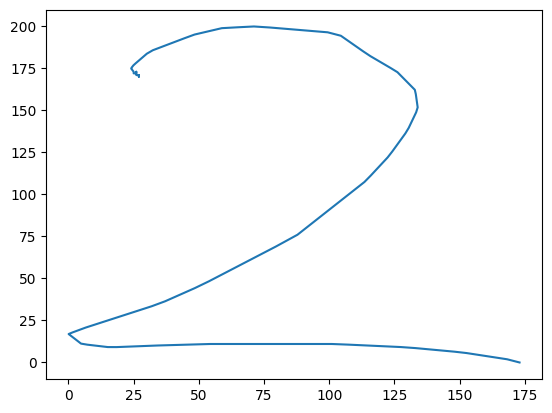

[ 45.          44.76219512  44.52439024  44.28658537  44.04878049
  44.          44.          44.          44.          44.
  44.          44.          44.          43.90853659  43.67073171
  43.43292683  43.19512195  42.95731707  42.7195122   42.48170732
  42.24390244  42.00609756  42.23170732  42.4695122   42.70731707
  42.94512195  43.          43.          43.          43.
  43.53658537  44.48780488  45.43902439  46.3902439   48.62195122
  53.1402439   57.65853659  62.17682927  66.62195122  70.66463415
  74.70731707  78.75        82.79268293  87.51219512  92.26829268
  97.02439024 101.7804878  106.71341463 111.70731707 116.70121951
 121.69512195 126.30487805 130.58536585 134.86585366 139.14634146
 143.18902439 146.75609756 150.32317073 153.8902439  157.27439024
 159.41463415 161.55487805 163.69512195 165.83536585 166.87804878
 167.82926829 168.7804878  169.73170732 170.         170.
 170.         170.         169.14634146 167.48170732 165.81707317
 164.15243902 161.17073171 155.225

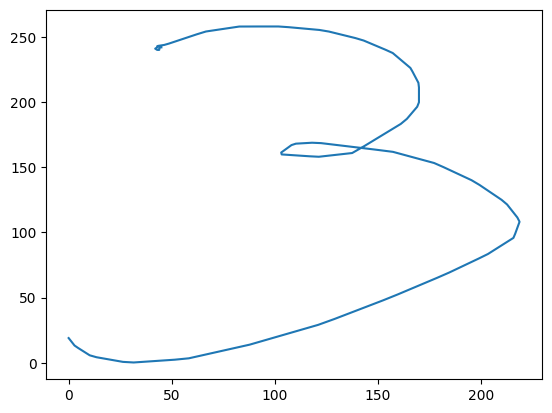

[131.         130.76219512 130.52439024 130.28658537 130.04878049
 130.18902439 130.42682927 130.66463415 130.90243902 131.1402439
 131.37804878 131.61585366 131.85365854 131.90853659 131.67073171
 131.43292683 131.19512195 131.08536585 131.56097561 132.03658537
 132.51219512 132.98780488 133.         133.         133.
 133.         133.         133.         133.         133.
 133.         133.         133.         133.         133.
 133.         133.         133.         133.         133.
 133.         133.         133.         132.77439024 132.53658537
 132.29878049 132.06097561 131.29268293 130.34146341 129.3902439
 128.43902439 126.7195122  124.34146341 121.96341463 119.58536585
 116.65243902 112.6097561  108.56707317 104.52439024 100.48170732
  96.43902439  92.39634146  88.35365854  84.31097561  80.48780488
  76.68292683  72.87804878  69.07317073  65.43902439  61.87195122
  58.30487805  54.73780488  50.92682927  46.88414634  42.84146341
  38.79878049  35.12195122  32.26829268  29.

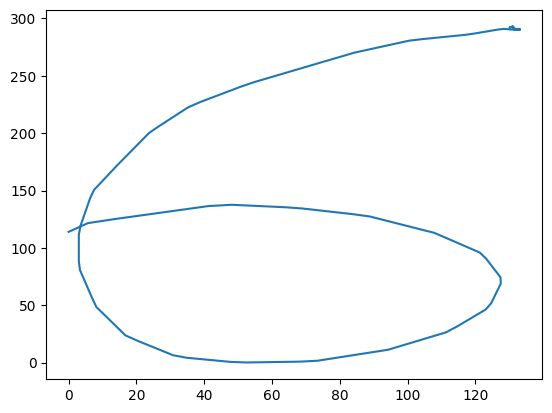

[1.15000000e+02 1.15237805e+02 1.15475610e+02 1.15713415e+02
 1.15951220e+02 1.15621951e+02 1.15146341e+02 1.14670732e+02
 1.14195122e+02 1.13859756e+02 1.13621951e+02 1.13384146e+02
 1.13146341e+02 1.12908537e+02 1.12670732e+02 1.12432927e+02
 1.12195122e+02 1.12000000e+02 1.12000000e+02 1.12000000e+02
 1.12000000e+02 1.12000000e+02 1.11536585e+02 1.11060976e+02
 1.10585366e+02 1.10109756e+02 1.09634146e+02 1.09158537e+02
 1.08682927e+02 1.08207317e+02 1.07463415e+02 1.06512195e+02
 1.05560976e+02 1.04609756e+02 1.03231707e+02 1.01091463e+02
 9.89512195e+01 9.68109756e+01 9.44878049e+01 9.11585366e+01
 8.78292683e+01 8.45000000e+01 8.11707317e+01 7.85182927e+01
 7.59024390e+01 7.32865854e+01 7.06707317e+01 6.77012195e+01
 6.46097561e+01 6.15182927e+01 5.84268293e+01 5.54634146e+01
 5.26097561e+01 4.97560976e+01 4.69024390e+01 4.41280488e+01
 4.15121951e+01 3.88963415e+01 3.62804878e+01 3.36341463e+01
 3.07804878e+01 2.79268293e+01 2.50731707e+01 2.22195122e+01
 2.00243902e+01 1.788414

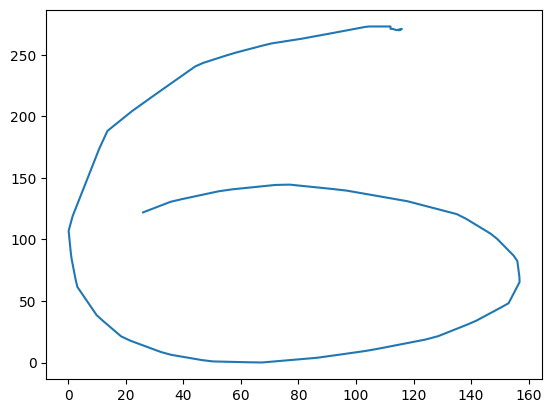

[0.00000000e+00 2.37804878e-01 4.75609756e-01 7.13414634e-01
 9.51219512e-01 8.10975610e-01 5.73170732e-01 3.35365854e-01
 9.75609756e-02 1.40243902e-01 3.78048780e-01 6.15853659e-01
 8.53658537e-01 1.09146341e+00 1.32926829e+00 1.56707317e+00
 1.80487805e+00 2.04268293e+00 2.28048780e+00 2.51829268e+00
 2.75609756e+00 2.99390244e+00 3.46341463e+00 3.93902439e+00
 4.41463415e+00 4.89024390e+00 5.91463415e+00 7.10365854e+00
 8.29268293e+00 9.48170732e+00 1.08048780e+01 1.22317073e+01
 1.36585366e+01 1.50853659e+01 1.69390244e+01 1.95548780e+01
 2.21707317e+01 2.47865854e+01 2.74756098e+01 3.05670732e+01
 3.36585366e+01 3.67500000e+01 3.98414634e+01 4.36097561e+01
 4.74146341e+01 5.12195122e+01 5.50243902e+01 5.86524390e+01
 6.22195122e+01 6.57865854e+01 6.93536585e+01 7.34329268e+01
 7.79512195e+01 8.24695122e+01 8.69878049e+01 9.15060976e+01
 9.60243902e+01 1.00542683e+02 1.05060976e+02 1.09579268e+02
 1.14097561e+02 1.18615854e+02 1.23134146e+02 1.27652439e+02
 1.32390244e+02 1.371463

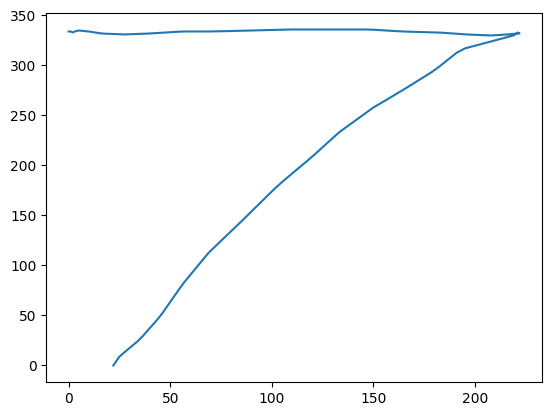

[115.         115.24390244 115.48780488 115.73170732 115.97560976
 116.2195122  116.46341463 116.70731707 116.95121951 117.19512195
 117.43902439 117.68292683 117.92682927 117.82926829 117.58536585
 117.34146341 117.09756098 116.85365854 116.6097561  116.36585366
 116.12195122 115.75609756 115.26829268 114.7804878  114.29268293
 113.51219512 112.29268293 111.07317073 109.85365854 108.48780488
 106.7804878  105.07317073 103.36585366 101.56097561  99.36585366
  97.17073171  94.97560976  92.7804878   90.58536585  88.3902439
  86.19512195  84.          79.85365854  75.70731707  71.56097561
  67.41463415  65.02439024  62.82926829  60.63414634  58.43902439
  55.46341463  52.29268293  49.12195122  45.95121951  42.95121951
  40.02439024  37.09756098  34.17073171  31.24390244  28.31707317
  25.3902439   22.46341463  19.90243902  17.70731707  15.51219512
  13.31707317  11.31707317   9.6097561    7.90243902   6.19512195
   4.7804878    4.04878049   3.31707317   2.58536585   1.90243902
   1.414634

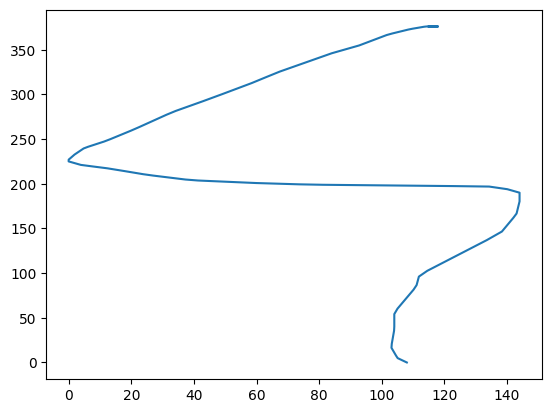

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.19512195e-01 4.63414634e-01 7.07317073e-01
 9.51219512e-01 8.04878049e-01 5.60975610e-01 3.17073171e-01
 7.31707317e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.21951220e-01 3.65853659e-01 6.09756098e-01
 8.53658537e-01 1.19512195e+00 1.68292683e+00 2.17073171e+00
 2.65853659e+00 3.29268293e+00 4.26829268e+00 5.24390244e+00
 6.21951220e+00 7.29268293e+00 8.75609756e+00 1.02195122e+01
 1.16829268e+01 1.32439024e+01 1.56829268e+01 1.81219512e+01
 2.05609756e+01 2.30000000e+01 2.66585366e+01 3.03170732e+01
 3.39756098e+01 3.76341463e+01 4.17317073e+01 4.58780488e+01
 5.00243902e+01 5.41707317e+01 5.89024390e+01 6.37804878e+01
 6.86585366e+01 7.35365854e+01 7.82439024e+01 8.28780488e+01
 8.75121951e+01 9.21463415e+01 9.72195122e+01 1.02585366e+02
 1.07951220e+02 1.13317073e+02 1.18439024e+02 1.23317073e+02
 1.28195122e+02 1.330731

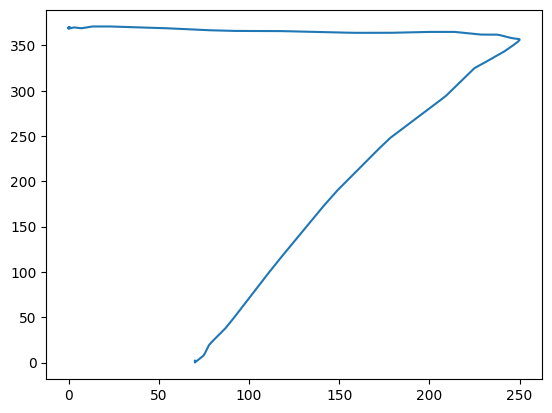

[0.00000000e+00 2.43902439e-01 4.87804878e-01 7.31707317e-01
 9.75609756e-01 7.80487805e-01 5.36585366e-01 2.92682927e-01
 4.87804878e-02 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.92682927e-01 7.80487805e-01 1.26829268e+00
 1.75609756e+00 2.12195122e+00 2.36585366e+00 2.60975610e+00
 2.85365854e+00 3.19512195e+00 3.68292683e+00 4.17073171e+00
 4.65853659e+00 5.36585366e+00 6.58536585e+00 7.80487805e+00
 9.02439024e+00 1.04390244e+01 1.26341463e+01 1.48292683e+01
 1.70243902e+01 1.93170732e+01 2.24878049e+01 2.56585366e+01
 2.88292683e+01 3.20000000e+01 3.66341463e+01 4.12682927e+01
 4.59024390e+01 5.05365854e+01 5.53902439e+01 6.02682927e+01
 6.51463415e+01 7.00243902e+01 7.56829268e+01 8.15365854e+01
 8.73902439e+01 9.32439024e+01 9.89268293e+01 1.04536585e+02
 1.10146341e+02 1.15756098e+02 1.27658537e+02 1.43756098e+02
 1.59853659e+02 1.75951220e+02 1.85707317e+02 1.89121951e+02
 1.92536585e+02 1.959512

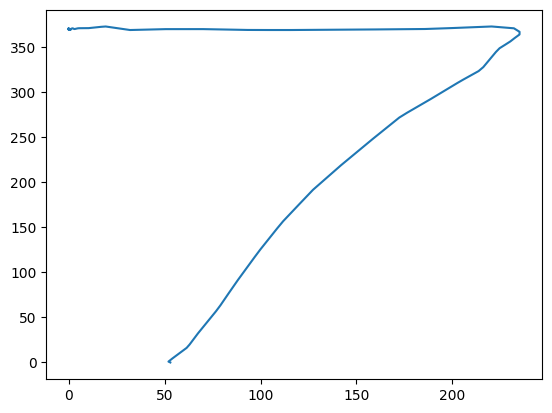

[4.20000000e+01 4.17560976e+01 4.15121951e+01 4.12682927e+01
 4.10243902e+01 4.12195122e+01 4.14634146e+01 4.17073171e+01
 4.19512195e+01 4.18048780e+01 4.15609756e+01 4.13170732e+01
 4.10731707e+01 4.10000000e+01 4.10000000e+01 4.10000000e+01
 4.10000000e+01 4.10000000e+01 4.10000000e+01 4.10000000e+01
 4.10000000e+01 4.08780488e+01 4.06341463e+01 4.03902439e+01
 4.01463415e+01 3.98048780e+01 3.93170732e+01 3.88292683e+01
 3.83414634e+01 3.77804878e+01 3.70487805e+01 3.63170732e+01
 3.55853659e+01 3.48048780e+01 3.38292683e+01 3.28536585e+01
 3.18780488e+01 3.08780488e+01 2.96585366e+01 2.84390244e+01
 2.72195122e+01 2.60000000e+01 2.45365854e+01 2.30731707e+01
 2.16097561e+01 2.01463415e+01 1.89024390e+01 1.76829268e+01
 1.64634146e+01 1.52439024e+01 1.40243902e+01 1.28048780e+01
 1.15853659e+01 1.03658537e+01 9.14634146e+00 7.92682927e+00
 6.70731707e+00 5.48780488e+00 4.56097561e+00 3.82926829e+00
 3.09756098e+00 2.36585366e+00 1.75609756e+00 1.26829268e+00
 7.80487805e-01 2.926829

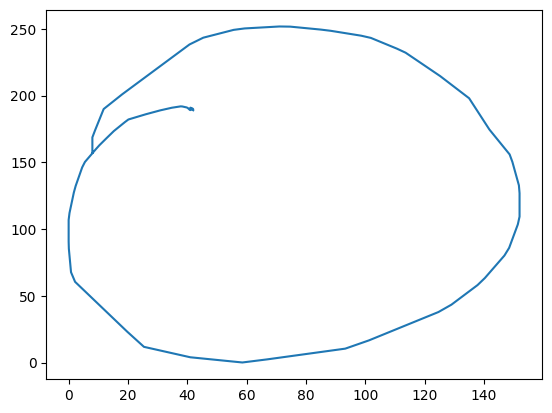

[  0.           0.24390244   0.48780488   0.73170732   0.97560976
   1.2195122    1.46341463   1.70731707   1.95121951   2.19512195
   2.43902439   2.68292683   2.92682927   3.           3.
   3.           3.           3.29268293   3.7804878    4.26829268
   4.75609756   5.24390244   5.73170732   6.2195122    6.70731707
   7.3902439    8.36585366   9.34146341  10.31707317  11.43902439
  12.90243902  14.36585366  15.82926829  17.43902439  19.63414634
  21.82926829  24.02439024  26.24390244  28.68292683  31.12195122
  33.56097561  36.          37.95121951  39.90243902  41.85365854
  43.80487805  47.95121951  52.34146341  56.73170732  61.12195122
  63.36585366  65.07317073  66.7804878   68.48780488  69.85365854
  71.07317073  72.29268293  73.51219512  74.73170732  75.95121951
  77.17073171  78.3902439   79.6097561   80.82926829  82.04878049
  83.26829268  84.09756098  84.34146341  84.58536585  84.82926829
  85.14634146  85.63414634  86.12195122  86.6097561   87.14634146
  87.87804878  88.

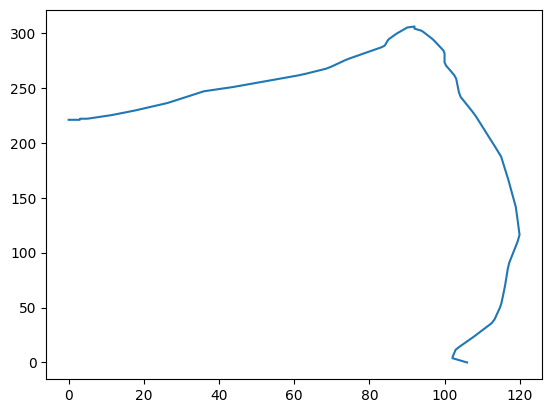

[ 50.    50.    50.    50.    50.    49.75  49.5   49.25  49.    49.
  49.    49.    49.    49.    49.    49.    49.    48.75  48.5   48.25
  48.    48.25  48.5   48.75  49.    49.5   50.    50.5   51.    52.5
  54.    55.5   57.    59.75  62.5   65.25  68.    72.25  76.5   80.75
  85.    90.25  95.5  100.75 106.   110.25 114.5  118.75 123.   128.25
 133.5  138.75 144.   148.25 152.5  156.75 161.   164.   167.   170.
 173.   174.5  176.   177.5  179.   179.25 179.5  179.75 180.   178.25
 176.5  174.75 173.   170.25 167.5  164.75 162.   157.75 153.5  149.25
 145.   140.   135.   130.   125.   120.5  116.   111.5  107.   105.
 103.   101.    99.    98.5   98.    97.5   97.    97.5   98.    98.5
  99.   100.25 101.5  102.75 104.   111.75 119.5  127.25 135.   139.25
 143.5  147.75 152.   156.5  161.   165.5  170.   173.   176.   179.
 182.   184.25 186.5  188.75 191.   192.75 194.5  196.25 198.   196.25
 194.5  192.75 191.   187.75 184.5  181.25 178.   171.75 165.5  159.25
 153.   148.   1

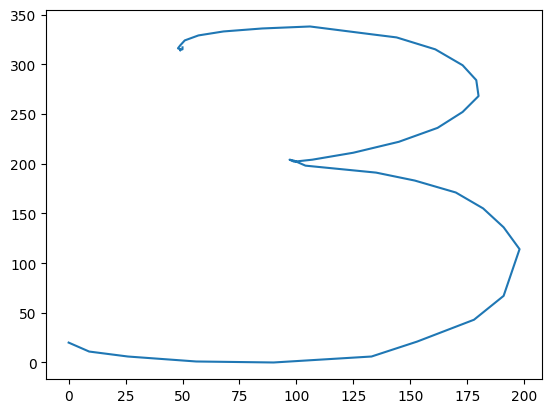

[ 28.    27.75  27.5   27.25  27.    27.    27.    27.    27.    27.
  27.    27.    27.    27.    27.    27.    27.    27.25  27.5   27.75
  28.    28.25  28.5   28.75  29.    30.    31.    32.    33.    35.
  37.    39.    41.    44.    47.    50.    53.    56.75  60.5   64.25
  68.    72.25  76.5   80.75  85.    89.25  93.5   97.75 102.   106.25
 110.5  114.75 119.   122.75 126.5  130.25 134.   137.   140.   143.
 146.   148.   150.   152.   154.   154.75 155.5  156.25 157.   156.25
 155.5  154.75 154.   152.25 150.5  148.75 147.   143.   139.   135.
 131.   126.75 122.5  118.25 114.   109.75 105.5  101.25  97.    93.75
  90.5   87.25  84.    83.    82.    81.    80.    81.    82.    83.
  84.    86.25  88.5   90.75  93.    96.5  100.   103.5  107.   115.75
 124.5  133.25 142.   146.25 150.5  154.75 159.   162.5  166.   169.5
 173.   176.75 180.5  184.25 188.   187.25 186.5  185.75 185.   182.5
 180.   177.5  175.   164.   153.   142.   131.   123.75 116.5  109.25
 102.    94.    86

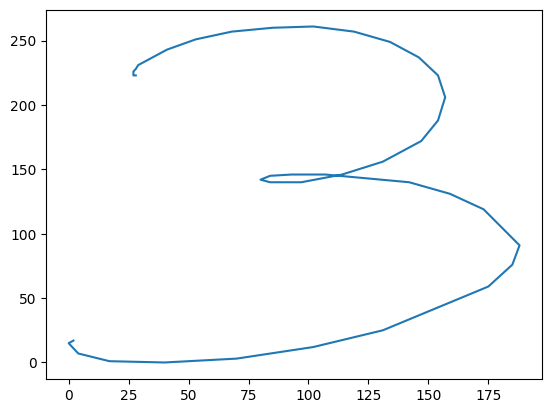

[114.   113.5  113.   112.5  112.   112.5  113.   113.5  114.   113.5
 113.   112.5  112.   112.25 112.5  112.75 113.   112.75 112.5  112.25
 112.   111.75 111.5  111.25 111.   110.75 110.5  110.25 110.   109.75
 109.5  109.25 109.   108.   107.   106.   105.   103.5  102.   100.5
  99.    96.5   94.    91.5   89.    86.75  84.5   82.25  80.    76.75
  73.5   70.25  67.    64.    61.    58.    55.    52.25  49.5   46.75
  44.    41.25  38.5   35.75  33.    30.75  28.5   26.25  24.    22.
  20.    18.    16.    14.5   13.    11.5   10.     9.25   8.5    7.75
   7.     6.5    6.     5.5    5.     5.5    6.     6.5    7.     8.
   9.    10.    11.    12.75  14.5   16.25  18.    20.5   23.    25.5
  28.    31.25  34.5   37.75  41.    45.25  49.5   53.75  58.    62.75
  67.5   72.25  77.    82.75  88.5   94.25 100.   104.75 109.5  114.25
 119.   123.75 128.5  133.25 138.   142.5  147.   151.5  156.   157.5
 159.   160.5  162.   162.5  163.   163.5  164.   164.   164.   164.
 164.   162.25 1

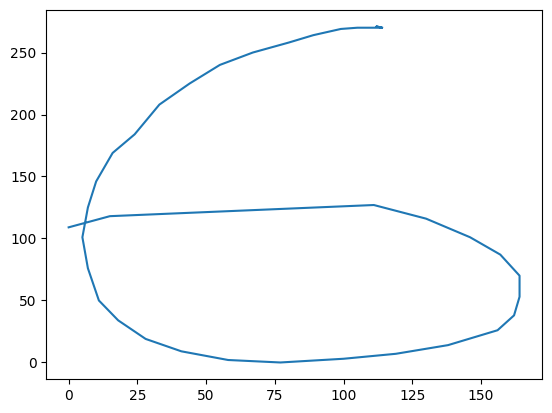

[ 38.    37.75  37.5   37.25  37.    36.75  36.5   36.25  36.    35.75
  35.5   35.25  35.    34.75  34.5   34.25  34.    33.75  33.5   33.25
  33.    32.75  32.5   32.25  32.    31.75  31.5   31.25  31.    30.75
  30.5   30.25  30.    29.5   29.    28.5   28.    27.25  26.5   25.75
  25.    24.    23.    22.    21.    19.75  18.5   17.25  16.    14.5
  13.    11.5   10.     9.     8.     7.     6.     5.25   4.5    3.75
   3.     2.25   1.5    0.75   0.     0.     0.     0.     0.     0.5
   1.     1.5    2.     3.     4.     5.     6.     7.5    9.    10.5
  12.    17.75  23.5   29.25  35.    38.5   42.    45.5   49.    52.75
  56.5   60.25  64.    71.25  78.5   85.75  93.    98.25 103.5  108.75
 114.   115.5  117.   118.5  120.   120.5  121.   121.5  122.   122.
 122.   122.   122.   121.   120.   119.   118.   116.75 115.5  114.25
 113.   111.   109.   107.   105.   102.75 100.5   98.25  96.    93.5
  91.    88.5   86.    83.    80.    77.    74.    70.75  67.5   64.25
  61.    57.

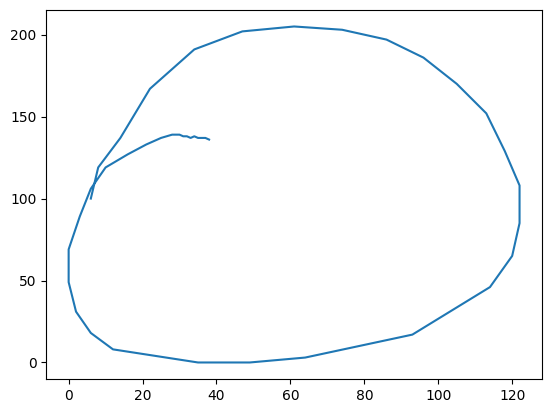

[105.   105.   105.   105.   105.   105.   105.   105.   105.   105.25
 105.5  105.75 106.   106.5  107.   107.5  108.   109.   110.   111.
 112.   113.75 115.5  117.25 119.   121.5  124.   126.5  129.   132.25
 135.5  138.75 142.   145.75 149.5  153.25 157.   161.   165.   169.
 173.   176.75 180.5  184.25 188.   191.5  195.   198.5  202.   205.5
 209.   212.5  216.   218.5  221.   223.5  226.   227.75 229.5  231.25
 233.   233.5  234.   234.5  235.   234.75 234.5  234.25 234.   232.5
 231.   229.5  228.   225.75 223.5  221.25 219.   216.   213.   210.
 207.   203.25 199.5  195.75 192.   187.25 182.5  177.75 173.   167.5
 162.   156.5  151.   146.   141.   136.   131.   125.25 119.5  113.75
 108.   102.25  96.5   90.75  85.    79.75  74.5   69.25  64.    58.75
  53.5   48.25  43.    39.    35.    31.    27.    23.75  20.5   17.25
  14.    11.75   9.5    7.25   5.     4.     3.     2.     1.     0.75
   0.5    0.25   0.    11.75  23.5   35.25  47.    51.5   56.    60.5
  65.    70.    

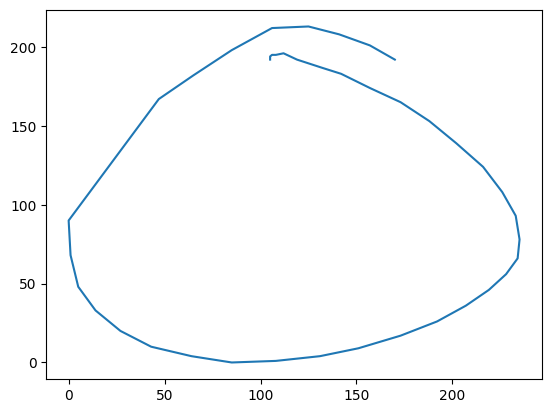

[ 34.          34.          34.          34.          33.97560976
  33.7195122   33.46341463  33.20731707  33.04878049  33.30487805
  33.56097561  33.81707317  33.85365854  33.34146341  32.82926829
  32.31707317  32.09756098  32.35365854  32.6097561   32.86585366
  33.          33.          33.          33.          32.70731707
  32.19512195  31.68292683  31.17073171  31.          31.
  31.          31.          30.80487805  30.54878049  30.29268293
  30.03658537  30.65853659  31.42682927  32.19512195  32.96341463
  33.73170732  34.5         35.26829268  36.08536585  37.87804878
  39.67073171  41.46341463  43.36585366  45.92682927  48.48780488
  51.04878049  53.73170732  56.80487805  59.87804878  62.95121951
  66.36585366  70.46341463  74.56097561  78.65853659  82.86585366
  87.2195122   91.57317073  95.92682927 100.2804878  104.63414634
 108.98780488 113.34146341 117.06097561 120.3902439  123.7195122
 127.04878049 130.37804878 133.70731707 137.03658537 140.36585366
 142.65853659 144.7

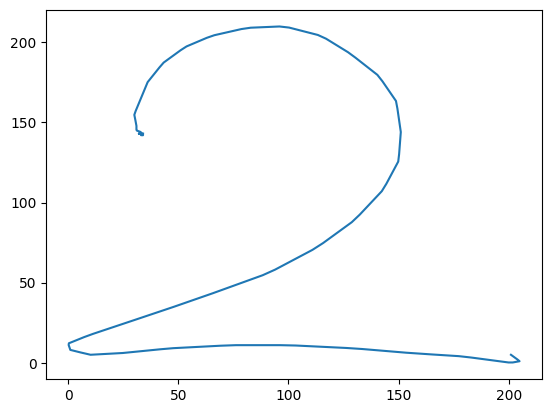

[3.40000000e+01 3.40000000e+01 3.40000000e+01 3.40000000e+01
 3.39756098e+01 3.37195122e+01 3.34634146e+01 3.32073171e+01
 3.30000000e+01 3.30000000e+01 3.30000000e+01 3.30000000e+01
 3.29268293e+01 3.26707317e+01 3.24146341e+01 3.21585366e+01
 3.19024390e+01 3.16463415e+01 3.13902439e+01 3.11341463e+01
 3.11219512e+01 3.13780488e+01 3.16341463e+01 3.18902439e+01
 3.22926829e+01 3.28048780e+01 3.33170732e+01 3.38292683e+01
 3.53658537e+01 3.74146341e+01 3.94634146e+01 4.15121951e+01
 4.35609756e+01 4.56097561e+01 4.76585366e+01 4.97073171e+01
 5.21951220e+01 5.47560976e+01 5.73170732e+01 5.98780488e+01
 6.34146341e+01 6.70000000e+01 7.05853659e+01 7.43780488e+01
 8.23170732e+01 9.02560976e+01 9.81951220e+01 1.05621951e+02
 1.09975610e+02 1.14329268e+02 1.18682927e+02 1.22975610e+02
 1.27073171e+02 1.31170732e+02 1.35268293e+02 1.39024390e+02
 1.42097561e+02 1.45170732e+02 1.48243902e+02 1.50878049e+02
 1.52926829e+02 1.54975610e+02 1.57024390e+02 1.59073171e+02
 1.61121951e+02 1.631707

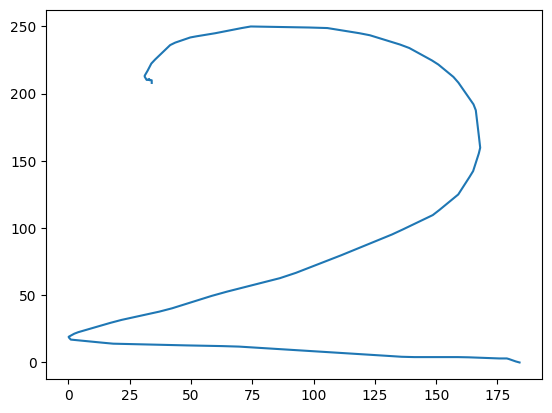

[7.20000000e+01 7.20000000e+01 7.20000000e+01 7.20000000e+01
 7.19756098e+01 7.17195122e+01 7.14634146e+01 7.12073171e+01
 7.10000000e+01 7.10000000e+01 7.10000000e+01 7.10000000e+01
 7.09268293e+01 7.06707317e+01 7.04146341e+01 7.01585366e+01
 6.99024390e+01 6.96463415e+01 6.93902439e+01 6.91341463e+01
 6.90000000e+01 6.90000000e+01 6.90000000e+01 6.90000000e+01
 6.94390244e+01 7.02073171e+01 7.09756098e+01 7.17439024e+01
 7.31951220e+01 7.49878049e+01 7.67804878e+01 7.85731707e+01
 8.15365854e+01 8.48658537e+01 8.81951220e+01 9.15243902e+01
 9.59512195e+01 1.00560976e+02 1.05170732e+02 1.09780488e+02
 1.14878049e+02 1.20000000e+02 1.25121951e+02 1.30280488e+02
 1.36170732e+02 1.42060976e+02 1.47951220e+02 1.53731707e+02
 1.58853659e+02 1.63975610e+02 1.69097561e+02 1.74097561e+02
 1.78707317e+02 1.83317073e+02 1.87926829e+02 1.91853659e+02
 1.94414634e+02 1.96975610e+02 1.99536585e+02 2.01329268e+02
 2.02097561e+02 2.02865854e+02 2.03634146e+02 2.03731707e+02
 2.03219512e+02 2.027073

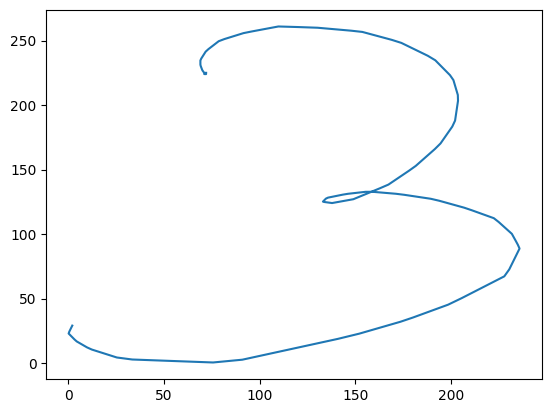

[  9.           8.74390244   8.48780488   8.23170732   7.97560976
   7.7195122    7.46341463   7.20731707   7.           7.
   7.           7.           6.92682927   6.67073171   6.41463415
   6.15853659   5.90243902   5.64634146   5.3902439    5.13414634
   4.87804878   4.62195122   4.36585366   4.1097561    4.
   4.           4.           4.           4.17073171   4.42682927
   4.68292683   4.93902439   6.36585366   8.15853659   9.95121951
  11.74390244  15.29268293  19.13414634  22.97560976  26.81707317
  33.09756098  39.5         45.90243902  52.2804878   58.17073171
  64.06097561  69.95121951  75.84146341  81.73170732  87.62195122
  93.51219512  99.09756098 103.70731707 108.31707317 112.92682927
 117.1097561  120.43902439 123.76829268 127.09756098 129.98780488
 132.29268293 134.59756098 136.90243902 138.26829268 138.7804878
 139.29268293 139.80487805 139.84146341 139.58536585 139.32926829
 139.07317073 137.90243902 136.36585366 134.82926829 133.29268293
 130.51219512 127.43902439 

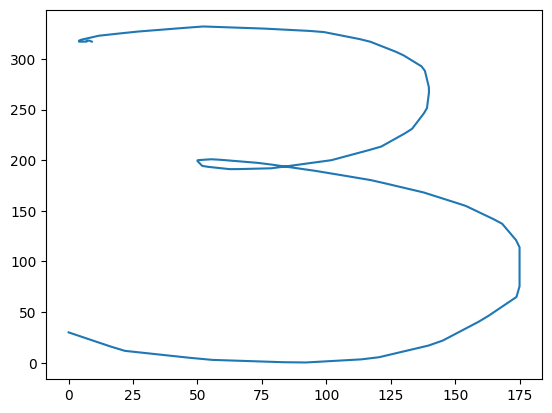

[1.00000000e+02 9.97439024e+01 9.94878049e+01 9.92317073e+01
 9.90243902e+01 9.92804878e+01 9.95365854e+01 9.97926829e+01
 9.99512195e+01 9.96951220e+01 9.94390244e+01 9.91829268e+01
 9.91463415e+01 9.96585366e+01 1.00170732e+02 1.00682927e+02
 1.00804878e+02 1.00292683e+02 9.97804878e+01 9.92682927e+01
 9.91219512e+01 9.93780488e+01 9.96341463e+01 9.98902439e+01
 9.98536585e+01 9.95975610e+01 9.93414634e+01 9.90853659e+01
 9.88292683e+01 9.85731707e+01 9.83170732e+01 9.80609756e+01
 9.80000000e+01 9.80000000e+01 9.80000000e+01 9.80000000e+01
 9.69024390e+01 9.56219512e+01 9.43414634e+01 9.30609756e+01
 9.15365854e+01 9.00000000e+01 8.84634146e+01 8.67439024e+01
 8.13658537e+01 7.59878049e+01 7.06097561e+01 6.55609756e+01
 6.24878049e+01 5.94146341e+01 5.63414634e+01 5.34512195e+01
 5.11463415e+01 4.88414634e+01 4.65365854e+01 4.42317073e+01
 4.19268293e+01 3.96219512e+01 3.73170732e+01 3.47926829e+01
 3.19756098e+01 2.91585366e+01 2.63414634e+01 2.40609756e+01
 2.22682927e+01 2.047560

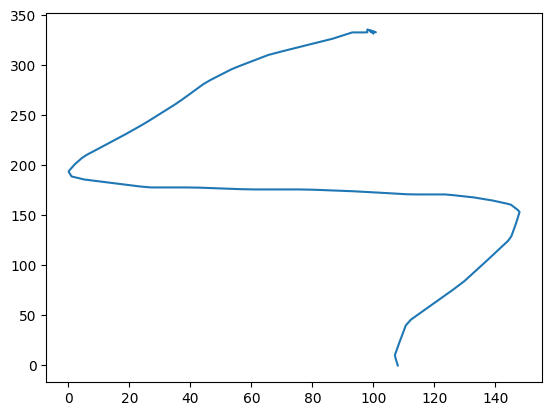

[112.         112.         112.         112.         112.
 112.         112.         112.         111.95121951 111.69512195
 111.43902439 111.18292683 111.07317073 111.32926829 111.58536585
 111.84146341 111.90243902 111.64634146 111.3902439  111.13414634
 111.12195122 111.37804878 111.63414634 111.8902439  111.85365854
 111.59756098 111.34146341 111.08536585 110.82926829 110.57317073
 110.31707317 110.06097561 109.80487805 109.54878049 109.29268293
 109.03658537 108.12195122 107.09756098 106.07317073 105.04878049
 103.53658537 102.         100.46341463  98.86585366  96.04878049
  93.23170732  90.41463415  87.59756098  84.7804878   81.96341463
  79.14634146  76.08536585  72.24390244  68.40243902  64.56097561
  61.06097561  58.24390244  55.42682927  52.6097561   48.47560976
  42.58536585  36.69512195  30.80487805  26.79268293  24.48780488
  22.18292683  19.87804878  18.20731707  16.92682927  15.64634146
  14.36585366  13.08536585  11.80487805  10.52439024   9.24390244
   9.20731707   9.

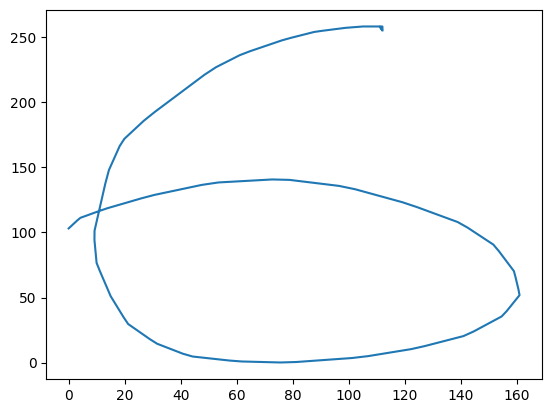

[1.18000000e+02 1.17743902e+02 1.17487805e+02 1.17231707e+02
 1.16975610e+02 1.16719512e+02 1.16463415e+02 1.16207317e+02
 1.15853659e+02 1.15085366e+02 1.14317073e+02 1.13548780e+02
 1.12707317e+02 1.11682927e+02 1.10658537e+02 1.09634146e+02
 1.08219512e+02 1.06170732e+02 1.04121951e+02 1.02073171e+02
 9.94146341e+01 9.60853659e+01 9.27560976e+01 8.94268293e+01
 8.56585366e+01 8.15609756e+01 7.74634146e+01 7.33658537e+01
 6.90975610e+01 6.47439024e+01 6.03902439e+01 5.60365854e+01
 5.22682927e+01 4.86829268e+01 4.50975610e+01 4.15121951e+01
 3.79268293e+01 3.43414634e+01 3.07560976e+01 2.71707317e+01
 2.45609756e+01 2.20000000e+01 1.94390244e+01 1.67926829e+01
 1.24390244e+01 8.08536585e+00 3.73170732e+00 1.46341463e-01
 1.17073171e+00 2.19512195e+00 3.21951220e+00 4.42682927e+00
 6.21951220e+00 8.01219512e+00 9.80487805e+00 1.19390244e+01
 1.47560976e+01 1.75731707e+01 2.03902439e+01 2.35365854e+01
 2.71219512e+01 3.07073171e+01 3.42926829e+01 3.84146341e+01
 4.30243902e+01 4.763414

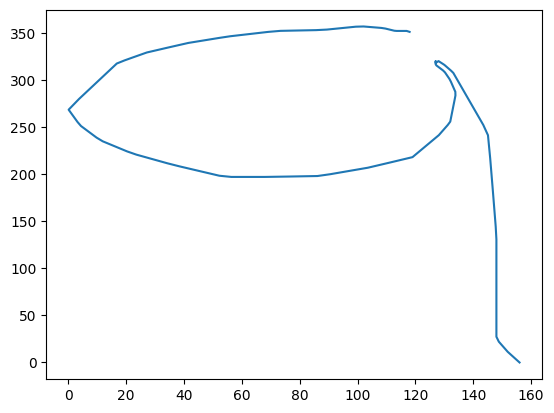

[7.10000000e+01 7.10000000e+01 7.10000000e+01 7.10000000e+01
 7.09756098e+01 7.07195122e+01 7.04634146e+01 7.02073171e+01
 6.99512195e+01 6.96951220e+01 6.94390244e+01 6.91829268e+01
 6.89268293e+01 6.86707317e+01 6.84146341e+01 6.81585366e+01
 6.79024390e+01 6.76463415e+01 6.73902439e+01 6.71341463e+01
 6.65121951e+01 6.54878049e+01 6.44634146e+01 6.34390244e+01
 6.22682927e+01 6.09878049e+01 5.97073171e+01 5.84268293e+01
 5.69756098e+01 5.54390244e+01 5.39024390e+01 5.23658537e+01
 5.04390244e+01 4.83902439e+01 4.63414634e+01 4.42926829e+01
 4.20243902e+01 3.97195122e+01 3.74146341e+01 3.51097561e+01
 3.30487805e+01 3.10000000e+01 2.89512195e+01 2.68902439e+01
 2.45853659e+01 2.22804878e+01 1.99756098e+01 1.77439024e+01
 1.59512195e+01 1.41585366e+01 1.23658537e+01 1.06341463e+01
 9.09756098e+00 7.56097561e+00 6.02439024e+00 4.65853659e+00
 3.63414634e+00 2.60975610e+00 1.58536585e+00 8.90243902e-01
 6.34146341e-01 3.78048780e-01 1.21951220e-01 1.34146341e-01
 3.90243902e-01 6.463414

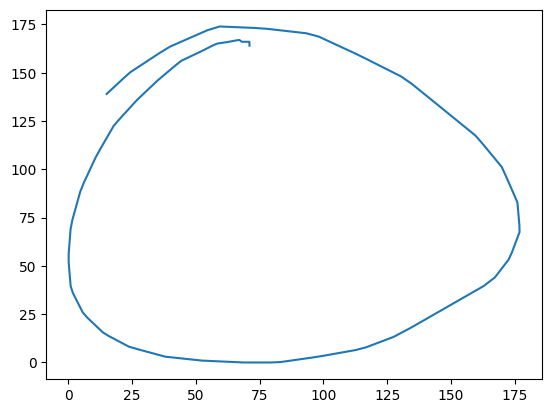

[ 0.          0.25609756  0.51219512  0.76829268  0.97560976  0.7195122
  0.46341463  0.20731707  0.          0.          0.          0.
  0.          0.          0.          0.          0.09756098  0.35365854
  0.6097561   0.86585366  1.36585366  2.13414634  2.90243902  3.67073171
  4.73170732  6.01219512  7.29268293  8.57317073 10.19512195 11.98780488
 13.7804878  15.57317073 17.56097561 19.6097561  21.65853659 23.70731707
 25.97560976 28.2804878  30.58536585 32.8902439  35.68292683 38.5
 41.31707317 44.12195122 46.68292683 49.24390244 51.80487805 54.29268293
 56.34146341 58.3902439  60.43902439 62.48780488 64.53658537 66.58536585
 68.63414634 70.59756098 72.3902439  74.18292683 75.97560976 77.43902439
 78.46341463 79.48780488 80.51219512 81.67073171 82.95121951 84.23170732
 85.51219512 86.47560976 87.24390244 88.01219512 88.7804878  89.
 89.         89.         89.         89.20731707 89.46341463 89.7195122
 89.97560976 90.         90.         90.         90.         90.
 90.       

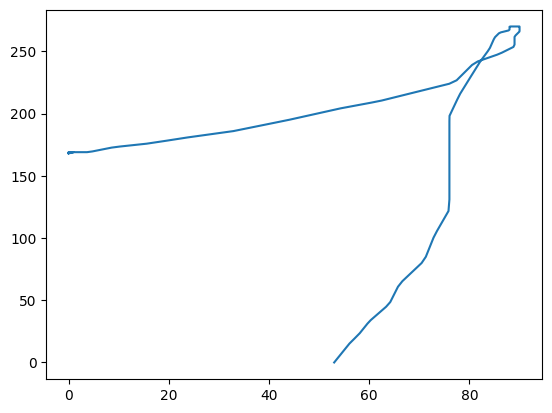

[  0.           0.25609756   0.51219512   0.76829268   1.04878049
   1.56097561   2.07317073   2.58536585   3.19512195   4.2195122
   5.24390244   6.26829268   7.36585366   8.64634146   9.92682927
  11.20731707  12.7804878   14.82926829  16.87804878  18.92682927
  22.68292683  28.31707317  33.95121951  39.58536585  43.90243902
  47.23170732  50.56097561  53.8902439   57.04878049  60.12195122
  63.19512195  66.26829268  69.73170732  73.31707317  76.90243902
  80.48780488  83.85365854  87.18292683  90.51219512  93.84146341
 100.58536585 107.5        114.41463415 121.15853659 124.48780488
 127.81707317 131.14634146 134.43902439 137.51219512 140.58536585
 143.65853659 146.54878049 148.85365854 151.15853659 153.46341463
 155.76829268 158.07317073 160.37804878 162.68292683 164.76829268
 166.56097561 168.35365854 170.14634146 171.67073171 172.95121951
 174.23170732 175.51219512 176.79268293 178.07317073 179.35365854
 180.63414634 181.36585366 181.87804878 182.3902439  182.90243902
 183.621951

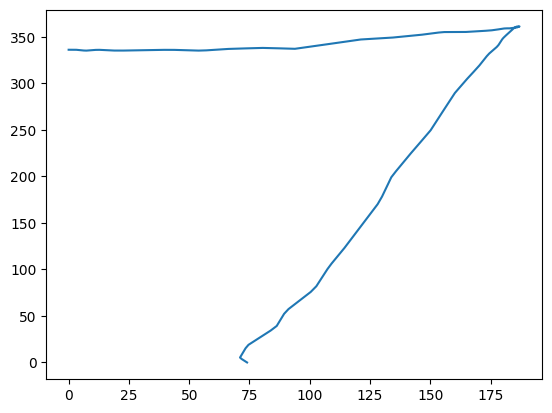

[  0.           0.76829268   1.53658537   2.30487805   3.07317073
   3.84146341   4.6097561    5.37804878   6.04878049   6.30487805
   6.56097561   6.81707317   7.2195122    7.98780488   8.75609756
   9.52439024  10.68292683  12.47560976  14.26829268  16.06097561
  17.6097561   18.8902439   20.17073171  21.45121951  23.90243902
  27.23170732  30.56097561  33.8902439   36.87804878  39.69512195
  42.51219512  45.32926829  48.34146341  51.41463415  54.48780488
  57.56097561  60.63414634  63.70731707  66.7804878   69.85365854
  73.17073171  76.5         79.82926829  83.15853659  86.48780488
  89.81707317  93.14634146  96.51219512 100.09756098 103.68292683
 107.26829268 110.73170732 113.80487805 116.87804878 119.95121951
 123.70731707 128.82926829 133.95121951 139.07317073 142.87804878
 144.92682927 146.97560976 149.02439024 150.93902439 152.73170732
 154.52439024 156.31707317 157.79268293 159.07317073 160.35365854
 161.63414634 162.54878049 163.31707317 164.08536585 164.85365854
 165.41463

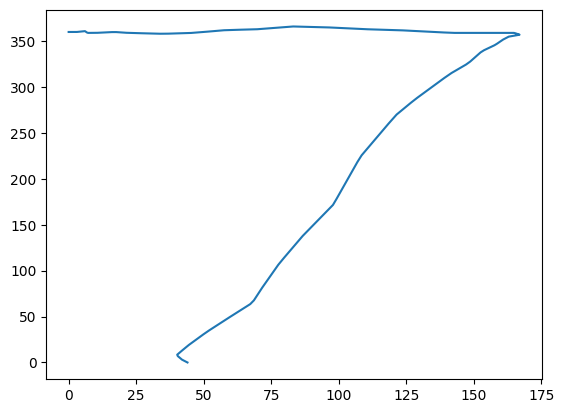

[ 62.          62.          62.          62.          61.95121951
  61.68902439  61.42682927  61.16463415  61.          61.
  61.          61.          61.          61.          61.
  61.          61.          61.          61.          61.
  61.          61.          61.          61.0304878   61.29268293
  61.55487805  61.81707317  62.15853659  62.68292683  63.20731707
  63.73170732  64.6402439   65.95121951  67.26219512  68.57317073
  70.06097561  71.63414634  73.20731707  74.7804878   77.0304878
  79.3902439   81.75        84.14634146  87.29268293  90.43902439
  93.58536585  96.85365854 100.52439024 104.19512195 107.86585366
 111.86585366 116.32317073 120.7804878  125.23780488 129.85365854
 134.57317073 139.29268293 144.01219512 148.52439024 152.98170732
 157.43902439 161.89634146 165.58536585 169.25609756 172.92682927
 176.42682927 179.04878049 181.67073171 184.29268293 186.36585366
 187.41463415 188.46341463 189.51219512 189.8597561  189.59756098
 189.33536585 189.07317073 187.8658

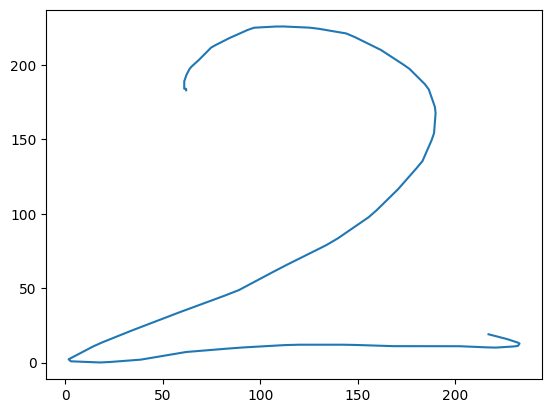

[1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 8.04878049e-01 5.42682927e-01 2.80487805e-01 1.82926829e-02
 0.00000000e+00 0.00000000e+00 0.00000000e+00 3.04878049e-02
 2.92682927e-01 5.54878049e-01 8.17073171e-01 1.07926829e+00
 1.34146341e+00 1.60365854e+00 1.86585366e+00 2.64024390e+00
 3.95121951e+00 5.26219512e+00 6.57317073e+00 8.06097561e+00
 9.63414634e+00 1.12073171e+01 1.27804878e+01 1.50304878e+01
 1.73902439e+01 1.97500000e+01 2.21463415e+01 2.52926829e+01
 2.84390244e+01 3.15853659e+01 3.48536585e+01 3.85243902e+01
 4.21951220e+01 4.58658537e+01 5.18414634e+01 6.10182927e+01
 7.01951220e+01 7.93719512e+01 8.58536585e+01 9.05731707e+01
 9.52926829e+01 1.00012195e+02 1.04524390e+02 1.08981707e+02
 1.13439024e+02 1.17896341e+02 1.22609756e+02 1.27329268e+02
 1.32048780e+02 1.366829

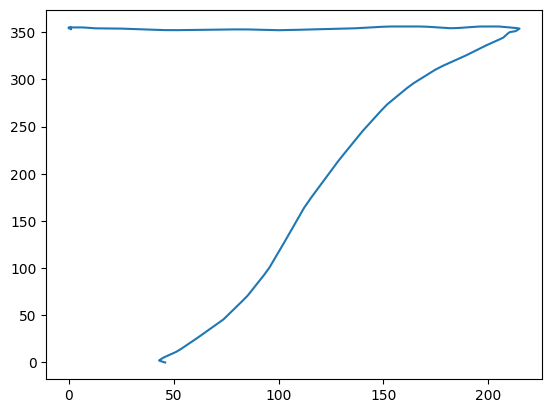

[  8.           8.           8.           8.           8.
   8.           8.           8.           8.           8.
   8.           8.           7.85365854   7.59146341   7.32926829
   7.06707317   7.           7.           7.           7.
   6.75609756   6.49390244   6.23170732   6.           6.
   6.           6.           6.           6.           6.
   6.           6.           6.           6.           6.
   5.4695122    4.68292683   3.89634146   3.1097561    2.77439024
   2.51219512   2.25         2.           2.           2.
   2.           1.87804878   1.35365854   0.82926829   0.30487805
   0.32926829   1.11585366   1.90243902   2.68902439   3.15853659
   3.42073171   3.68292683   3.94512195   5.24390244   6.81707317
   8.3902439    9.96341463  12.56097561  15.18292683  17.80487805
  20.51219512  23.65853659  26.80487805  29.95121951  33.37195122
  37.30487805  41.23780488  45.17073171  49.24390244  53.43902439
  57.63414634  61.82926829  73.01829268  86.91463415 100.81097561


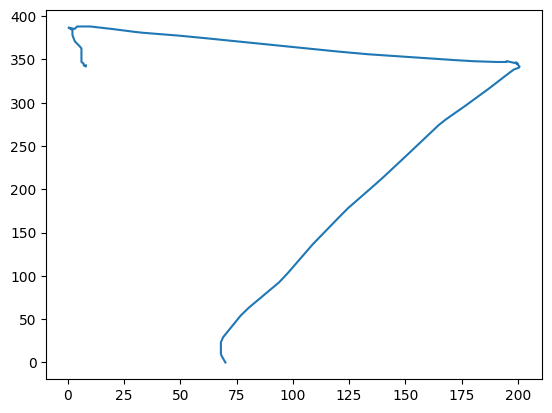

[ 0.          0.26219512  0.52439024  0.78658537  0.95121951  0.68902439
  0.42682927  0.16463415  0.          0.          0.          0.
  0.14634146  0.40853659  0.67073171  0.93292683  2.17073171  3.74390244
  5.31707317  6.8902439   8.46341463 10.03658537 11.6097561  13.18292683
 14.75609756 16.32926829 17.90243902 19.63414634 21.73170732 23.82926829
 25.92682927 28.02439024 30.12195122 32.2195122  34.31707317 36.41463415
 38.51219512 40.6097561  42.70731707 44.80487805 46.90243902 49.
 51.08536585 52.92073171 54.75609756 56.59146341 58.73170732 61.87804878
 65.02439024 68.17073171 70.54878049 71.8597561  73.17073171 74.48170732
 75.63414634 76.68292683 77.73170732 78.7804878  79.62195122 80.40853659
 81.19512195 81.98170732 82.51219512 83.03658537 83.56097561 84.08536585
 84.6097561  85.13414634 85.65853659 86.         86.         86.
 86.         86.1402439  86.40243902 86.66463415 86.92682927 87.
 87.         87.         87.         87.         87.         87.
 87.         87.  

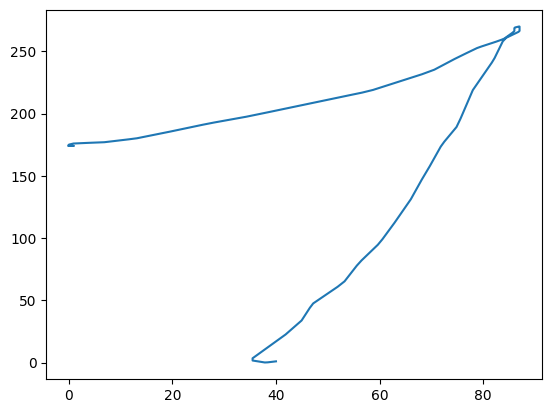

[2.10000000e+01 2.07317073e+01 2.04634146e+01 2.01951220e+01
 1.99268293e+01 1.96585366e+01 1.93902439e+01 1.91219512e+01
 1.90000000e+01 1.90000000e+01 1.90000000e+01 1.90000000e+01
 1.87804878e+01 1.85121951e+01 1.82439024e+01 1.80000000e+01
 1.80000000e+01 1.80000000e+01 1.80000000e+01 1.79024390e+01
 1.76341463e+01 1.73658537e+01 1.70975610e+01 1.70000000e+01
 1.70000000e+01 1.70000000e+01 1.70000000e+01 1.70000000e+01
 1.70000000e+01 1.70000000e+01 1.71463415e+01 1.79512195e+01
 1.87560976e+01 1.95609756e+01 2.03658537e+01 2.11707317e+01
 2.19756098e+01 2.27804878e+01 2.43658537e+01 2.62439024e+01
 2.81219512e+01 3.00000000e+01 3.24146341e+01 3.48292683e+01
 3.72439024e+01 3.98780488e+01 4.30975610e+01 4.63170732e+01
 4.95365854e+01 5.27560976e+01 5.59756098e+01 5.91951220e+01
 6.24146341e+01 6.62926829e+01 7.03170732e+01 7.43414634e+01
 7.83170732e+01 8.18048780e+01 8.52926829e+01 8.87804878e+01
 9.20731707e+01 9.50243902e+01 9.79756098e+01 1.00926829e+02
 1.03878049e+02 1.068292

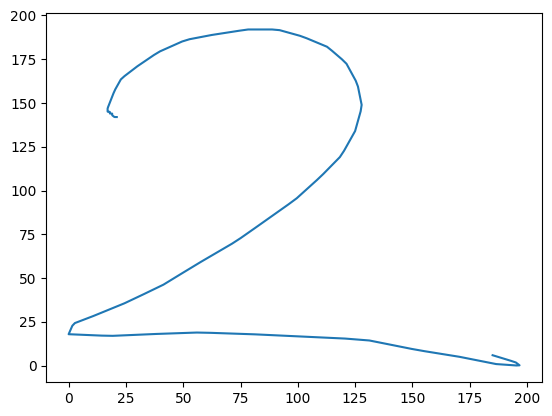

[3.00000000e+01 2.97317073e+01 2.94634146e+01 2.91951220e+01
 2.90000000e+01 2.90000000e+01 2.90000000e+01 2.90000000e+01
 2.88536585e+01 2.85853659e+01 2.83170732e+01 2.80487805e+01
 2.77804878e+01 2.75121951e+01 2.72439024e+01 2.70000000e+01
 2.70000000e+01 2.70000000e+01 2.70000000e+01 2.69024390e+01
 2.66341463e+01 2.63658537e+01 2.60975610e+01 2.60000000e+01
 2.60000000e+01 2.60000000e+01 2.60000000e+01 2.62439024e+01
 2.65121951e+01 2.67804878e+01 2.71463415e+01 2.79512195e+01
 2.87560976e+01 2.95609756e+01 3.07317073e+01 3.23414634e+01
 3.39512195e+01 3.55609756e+01 3.77560976e+01 4.01707317e+01
 4.25853659e+01 4.50000000e+01 4.79512195e+01 5.09024390e+01
 5.38536585e+01 5.70243902e+01 6.07804878e+01 6.45365854e+01
 6.82926829e+01 7.23414634e+01 7.66341463e+01 8.09268293e+01
 8.52195122e+01 8.97317073e+01 9.42926829e+01 9.88536585e+01
 1.03390244e+02 1.07682927e+02 1.11975610e+02 1.16268293e+02
 1.22317073e+02 1.31439024e+02 1.40560976e+02 1.49682927e+02
 1.52487805e+02 1.516829

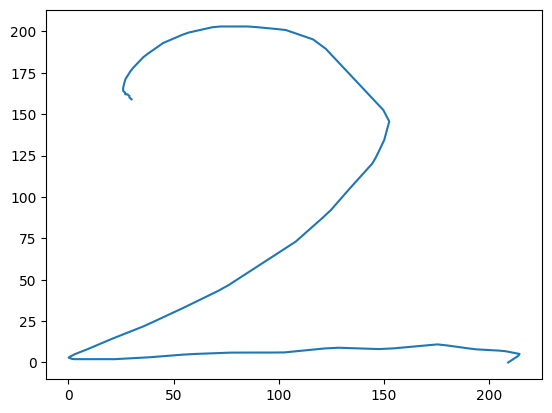

[ 39.          38.73170732  38.46341463  38.19512195  37.92682927
  37.65853659  37.3902439   37.12195122  37.          37.
  37.          37.          36.7804878   36.51219512  36.24390244
  36.          36.          36.          36.          36.
  36.          36.          36.          36.          36.
  36.          36.          36.24390244  36.51219512  36.7804878
  37.19512195  38.26829268  39.34146341  40.41463415  41.73170732
  43.34146341  44.95121951  46.56097561  48.95121951  51.63414634
  54.31707317  57.          60.48780488  63.97560976  67.46341463
  71.31707317  76.14634146  80.97560976  85.80487805  94.29268293
 105.82926829 117.36585366 128.90243902 136.26829268 142.70731707
 149.14634146 155.56097561 161.73170732 167.90243902 174.07317073
 179.65853659 184.2195122  188.7804878  193.34146341 197.2195122
 200.70731707 204.19512195 207.68292683 206.53658537 204.92682927
 203.31707317 201.31707317 197.56097561 193.80487805 190.04878049
 185.56097561 180.19512195 174.82926

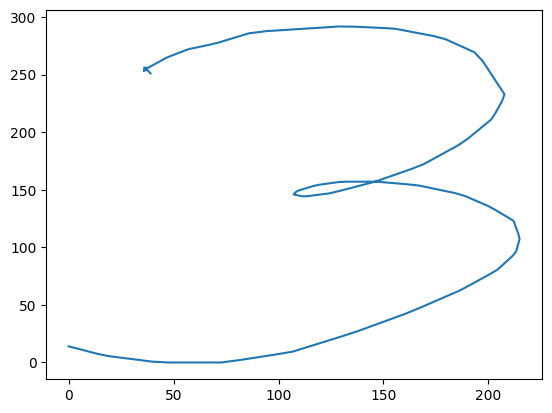

[3.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
 2.92682927e+00 2.65853659e+00 2.39024390e+00 2.12195122e+00
 2.14634146e+00 2.41463415e+00 2.68292683e+00 2.95121951e+00
 2.78048780e+00 2.51219512e+00 2.24390244e+00 1.97560976e+00
 1.70731707e+00 1.43902439e+00 1.17073171e+00 9.02439024e-01
 6.34146341e-01 3.65853659e-01 9.75609756e-02 3.41463415e-01
 8.78048780e-01 1.41463415e+00 1.95121951e+00 2.97560976e+00
 4.04878049e+00 5.12195122e+00 6.48780488e+00 9.17073171e+00
 1.18536585e+01 1.45365854e+01 1.75853659e+01 2.10731707e+01
 2.45609756e+01 2.80487805e+01 3.64146341e+01 4.66097561e+01
 5.68048780e+01 6.70000000e+01 7.29024390e+01 7.88048780e+01
 8.47073171e+01 9.04634146e+01 9.58292683e+01 1.01195122e+02
 1.06560976e+02 1.11634146e+02 1.16463415e+02 1.21292683e+02
 1.26121951e+02 1.29853659e+02 1.33341463e+02 1.36829268e+02
 1.40195122e+02 1.42341463e+02 1.44487805e+02 1.46634146e+02
 1.48195122e+02 1.48731707e+02 1.49268293e+02 1.49804878e+02
 1.49146341e+02 1.478048

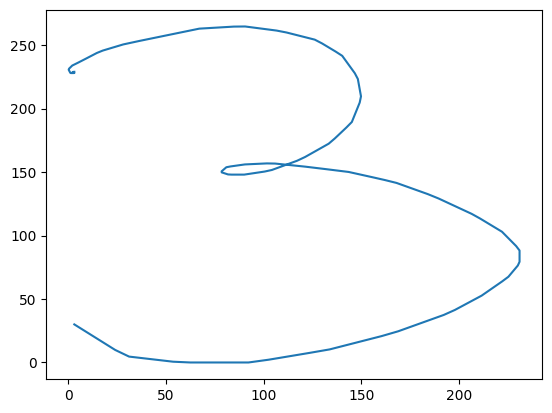

[ 17.          17.          17.          17.          17.
  17.          17.          17.          16.85365854  16.58536585
  16.31707317  16.04878049  16.          16.          16.
  16.          16.          16.          16.          16.
  16.          16.          16.          15.82926829  15.56097561
  15.29268293  15.02439024  15.24390244  15.51219512  15.7804878
  15.95121951  15.68292683  15.41463415  15.14634146  15.12195122
  15.3902439   15.65853659  15.92682927  15.80487805  15.53658537
  15.26829268  15.          15.26829268  15.53658537  15.80487805
  16.14634146  16.68292683  17.2195122   17.75609756  18.58536585
  19.65853659  20.73170732  21.80487805  23.97560976  26.3902439
  28.80487805  31.29268293  34.51219512  37.73170732  40.95121951
  44.65853659  49.2195122   53.7804878   58.34146341  63.07317073
  67.90243902  72.73170732  77.56097561  82.3902439   87.2195122
  92.04878049  96.7804878  101.07317073 105.36585366 109.65853659
 113.46341463 116.68292683 119.902439

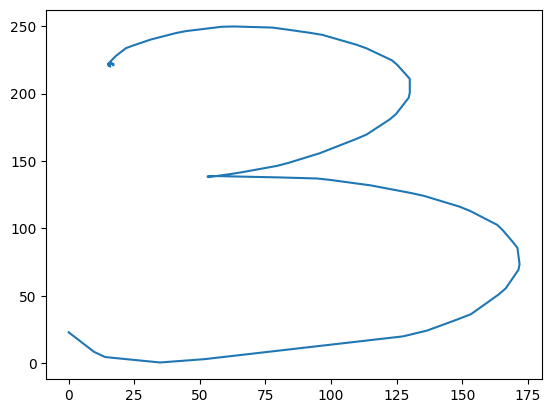

[ 79.          78.73170732  78.46341463  78.19512195  78.07317073
  78.34146341  78.6097561   78.87804878  78.85365854  78.58536585
  78.31707317  78.04878049  77.56097561  77.02439024  76.48780488
  75.82926829  73.95121951  72.07317073  70.19512195  66.17073171
  58.3902439   50.6097561   42.82926829  36.58536585  31.2195122
  25.85365854  20.48780488  18.04878049  15.90243902  13.75609756
  11.70731707  10.09756098   8.48780488   6.87804878   5.51219512
   4.43902439   3.36585366   2.29268293   1.6097561    1.07317073
   0.53658537   0.           0.80487805   1.6097561    2.41463415
   3.2195122    4.02439024   4.82926829   5.63414634   8.63414634
  13.46341463  18.29268293  23.12195122  27.51219512  31.80487805
  36.09756098  40.46341463  45.56097561  50.65853659  55.75609756
  60.85365854  65.95121951  71.04878049  76.14634146  81.24390244
  86.34146341  91.43902439  96.53658537 100.17073171 103.65853659
 107.14634146 110.53658537 113.48780488 116.43902439 119.3902439
 121.7317073

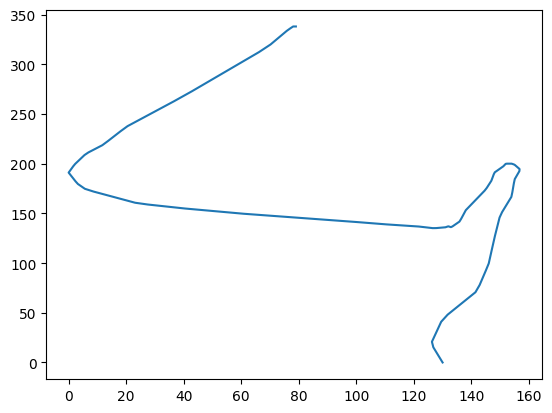

[3.27000000e+02 2.39536585e+02 1.52073171e+02 6.46097561e+01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 9.75609756e-01
 7.07317073e-01 4.39024390e-01 1.70731707e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.70731707e-01
 4.39024390e-01 7.07317073e-01 9.75609756e-01 7.56097561e-01
 4.87804878e-01 2.19512195e-01 9.75609756e-02 6.34146341e-01
 1.17073171e+00 1.70731707e+00 2.24390244e+00 2.78048780e+00
 3.31707317e+00 3.85365854e+00 7.90243902e+00 1.32682927e+01
 1.86341463e+01 2.40000000e+01 2.80243902e+01 3.20487805e+01
 3.60731707e+01 4.01707317e+01 4.44634146e+01 4.87560976e+01
 5.30487805e+01 5.73414634e+01 6.16341463e+01 6.59268293e+01
 7.02195122e+01 7.42926829e+01 7.83170732e+01 8.23414634e+01
 8.63414634e+01 9.00975610e+01 9.38536585e+01 9.76097561e+01
 1.01268293e+02 1.04756098e+02 1.08243902e+02 1.11731707e+02
 1.15048780e+02 1.182682

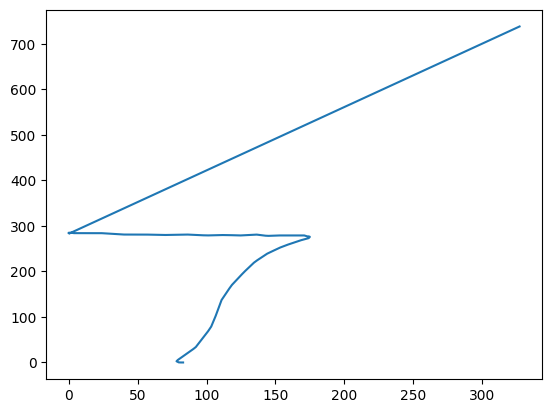

[107.         107.         107.         107.         107.
 107.         107.         107.         107.         107.
 107.         107.         107.2195122  107.48780488 107.75609756
 107.97560976 107.70731707 107.43902439 107.17073171 106.80487805
 106.26829268 105.73170732 105.19512195 104.48780488 103.68292683
 102.87804878 102.07317073 101.26829268 100.46341463  99.65853659
  98.70731707  97.09756098  95.48780488  93.87804878  92.26829268
  90.65853659  89.04878049  87.43902439  85.63414634  83.75609756
  81.87804878  80.          78.12195122  76.24390244  74.36585366
  72.26829268  69.58536585  66.90243902  64.2195122   59.7804878
  53.87804878  47.97560976  42.07317073  38.58536585  35.63414634
  32.68292683  29.75609756  27.07317073  24.3902439   21.70731707
  18.53658537  14.51219512  10.48780488   6.46341463   4.14634146
   2.80487805   1.46341463   0.12195122   0.48780488   1.02439024
   1.56097561   2.04878049   2.31707317   2.58536585   2.85365854
   3.48780488   4.56097561 

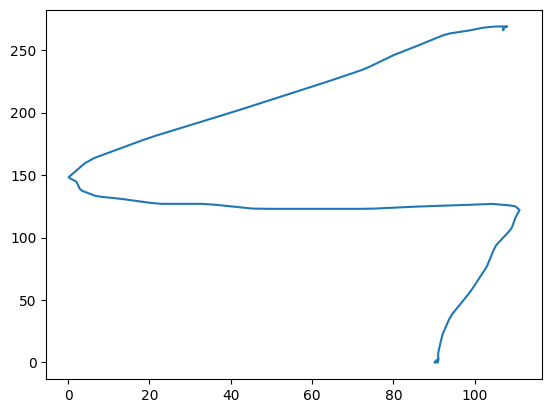

[104.         104.26829268 104.53658537 104.80487805 105.07317073
 105.34146341 105.6097561  105.87804878 105.85365854 105.58536585
 105.31707317 105.04878049 104.34146341 103.53658537 102.73170732
 101.87804878 100.53658537  99.19512195  97.85365854  96.51219512
  95.17073171  93.82926829  92.48780488  90.97560976  89.36585366
  87.75609756  86.14634146  82.58536585  78.82926829  75.07317073
  71.51219512  68.82926829  66.14634146  63.46341463  60.90243902
  58.48780488  56.07317073  53.65853659  50.65853659  47.43902439
  44.2195122   41.          36.97560976  32.95121951  28.92682927
  25.41463415  23.26829268  21.12195122  18.97560976  17.12195122
  15.51219512  13.90243902  12.29268293  10.90243902   9.56097561
   8.2195122    6.87804878   5.53658537   4.19512195   2.85365854
   1.80487805   1.26829268   0.73170732   0.19512195   0.17073171
   0.43902439   0.70731707   0.97560976   1.73170732   2.53658537
   3.34146341   4.14634146   4.95121951   5.75609756   6.56097561
   7.85365

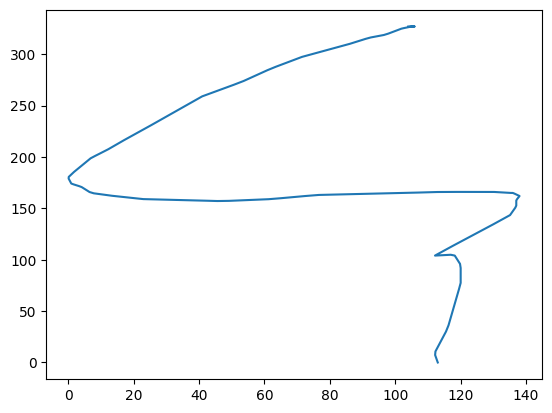

[120.         119.46341463 118.92682927 118.3902439  118.
 118.         118.         118.         117.70731707 117.17073171
 116.63414634 116.09756098 115.7804878  115.51219512 115.24390244
 114.97560976 114.70731707 114.43902439 114.17073171 113.80487805
 113.26829268 112.73170732 112.19512195 111.65853659 111.12195122
 110.58536585 110.04878049 109.02439024 107.95121951 106.87804878
 105.70731707 104.09756098 102.48780488 100.87804878  99.14634146
  97.26829268  95.3902439   93.51219512  91.43902439  89.29268293
  87.14634146  85.          82.31707317  79.63414634  76.95121951
  73.6097561   68.51219512  63.41463415  58.31707317  54.82926829
  52.68292683  50.53658537  48.3902439   46.46341463  44.58536585
  42.70731707  40.70731707  37.48780488  34.26829268  31.04878049
  28.70731707  27.90243902  27.09756098  26.29268293  26.
  26.          26.          26.          25.51219512  24.97560976
  24.43902439  24.14634146  24.95121951  25.75609756  26.56097561
  27.97560976  30.12195122

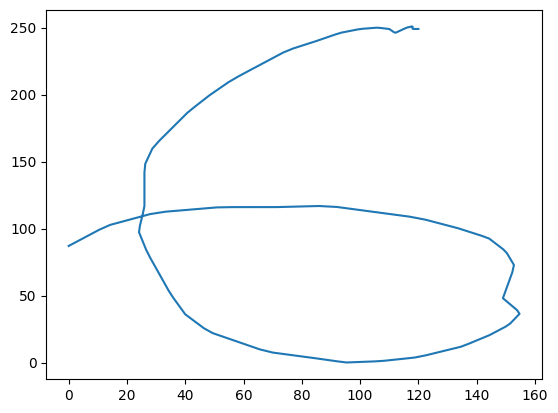

[8.40000000e+01 8.40000000e+01 8.40000000e+01 8.40000000e+01
 8.40731707e+01 8.43414634e+01 8.46097561e+01 8.48780488e+01
 8.51463415e+01 8.54146341e+01 8.56829268e+01 8.59512195e+01
 8.60000000e+01 8.60000000e+01 8.60000000e+01 8.59512195e+01
 8.54146341e+01 8.48780488e+01 8.43414634e+01 8.39024390e+01
 8.36341463e+01 8.33658537e+01 8.30975610e+01 8.24878049e+01
 8.16829268e+01 8.08780488e+01 8.00731707e+01 7.92682927e+01
 7.84634146e+01 7.76585366e+01 7.67560976e+01 7.54146341e+01
 7.40731707e+01 7.27317073e+01 7.12682927e+01 6.96585366e+01
 6.80487805e+01 6.64390244e+01 6.44390244e+01 6.22926829e+01
 6.01463415e+01 5.80000000e+01 5.58536585e+01 5.37073171e+01
 5.15609756e+01 4.94146341e+01 4.72682927e+01 4.51219512e+01
 4.29756098e+01 4.05365854e+01 3.78536585e+01 3.51707317e+01
 3.24878049e+01 3.04634146e+01 2.85853659e+01 2.67073171e+01
 2.47073171e+01 2.14878049e+01 1.82682927e+01 1.50487805e+01
 1.25121951e+01 1.11707317e+01 9.82926829e+00 8.48780488e+00
 7.31707317e+00 6.243902

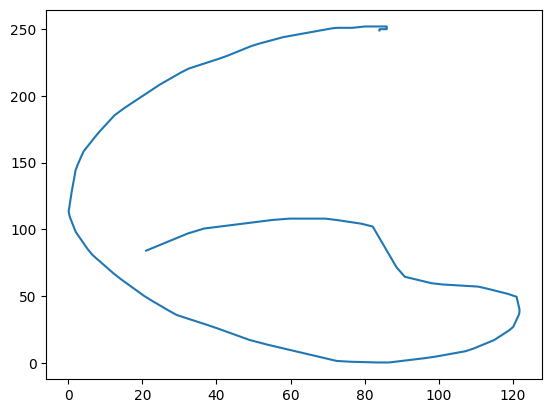

[66.         66.         66.         66.         66.         66.
 66.         66.         66.19512195 66.4695122  66.74390244 66.98170732
 66.70731707 66.43292683 66.15853659 66.11585366 66.3902439  66.66463415
 66.93902439 66.78658537 66.51219512 66.23780488 66.         66.
 66.         66.         66.         66.         66.         66.
 65.76829268 65.49390244 65.2195122  65.05487805 65.32926829 65.60365854
 65.87804878 65.69512195 65.14634146 64.59756098 64.04878049 64.25
 64.52439024 64.79878049 65.         65.         65.         65.
 65.17073171 65.44512195 65.7195122  65.99390244 66.         66.
 66.         66.18292683 66.73170732 67.2804878  67.82926829 68.
 68.         68.         68.         68.         68.         68.
 68.2195122  68.76829268 69.31707317 69.86585366 70.20731707 70.48170732
 70.75609756 71.0304878  71.30487805 71.57926829 71.85365854 72.12804878
 72.40243902 72.67682927 72.95121951 73.22560976 73.5        73.77439024
 74.24390244 75.61585366 76.98780488 78.

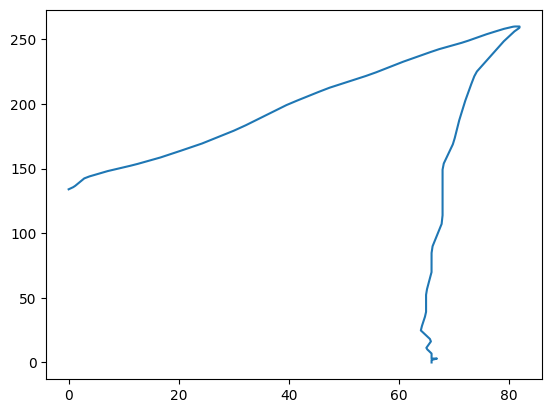

[5.60000000e+01 5.57256098e+01 5.54512195e+01 5.51768293e+01
 5.50000000e+01 5.50000000e+01 5.50000000e+01 5.50000000e+01
 5.50000000e+01 5.50000000e+01 5.50000000e+01 5.49634146e+01
 5.44146341e+01 5.38658537e+01 5.33170732e+01 5.30000000e+01
 5.30000000e+01 5.30000000e+01 5.30000000e+01 5.30000000e+01
 5.30000000e+01 5.30000000e+01 5.30000000e+01 5.30000000e+01
 5.30000000e+01 5.30000000e+01 5.34024390e+01 5.42256098e+01
 5.50487805e+01 5.58719512e+01 5.66951220e+01 5.75182927e+01
 5.83414634e+01 5.94939024e+01 6.19634146e+01 6.44329268e+01
 6.69024390e+01 6.98292683e+01 7.31219512e+01 7.64146341e+01
 7.97073171e+01 8.37500000e+01 8.78658537e+01 9.19817073e+01
 9.63170732e+01 1.01256098e+02 1.06195122e+02 1.11134146e+02
 1.16585366e+02 1.22347561e+02 1.28109756e+02 1.33871951e+02
 1.38829268e+02 1.43768293e+02 1.48707317e+02 1.53554878e+02
 1.58219512e+02 1.62884146e+02 1.67548780e+02 1.71268293e+02
 1.74560976e+02 1.77853659e+02 1.81109756e+02 1.83579268e+02
 1.86048780e+02 1.885182

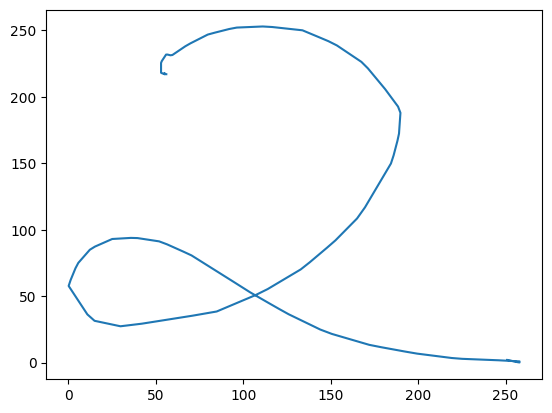

[8.10000000e+01 8.12743902e+01 8.15487805e+01 8.18231707e+01
 8.19024390e+01 8.16280488e+01 8.13536585e+01 8.10792683e+01
 8.10000000e+01 8.10000000e+01 8.10000000e+01 8.10000000e+01
 8.10000000e+01 8.10000000e+01 8.10000000e+01 8.08841463e+01
 8.06097561e+01 8.03353659e+01 8.00609756e+01 8.02134146e+01
 8.04878049e+01 8.07621951e+01 8.10000000e+01 8.10000000e+01
 8.10000000e+01 8.10000000e+01 8.12682927e+01 8.18170732e+01
 8.23658537e+01 8.29146341e+01 8.43902439e+01 8.60365854e+01
 8.76829268e+01 8.94939024e+01 9.19634146e+01 9.44329268e+01
 9.69024390e+01 9.99817073e+01 1.03548780e+02 1.07115854e+02
 1.10682927e+02 1.14750000e+02 1.18865854e+02 1.22981707e+02
 1.27024390e+02 1.30865854e+02 1.34707317e+02 1.38548780e+02
 1.42902439e+02 1.47567073e+02 1.52231707e+02 1.56896341e+02
 1.61292683e+02 1.65682927e+02 1.70073171e+02 1.74189024e+02
 1.77756098e+02 1.81323171e+02 1.84890244e+02 1.87890244e+02
 1.90634146e+02 1.93378049e+02 1.96097561e+02 1.98292683e+02
 2.00487805e+02 2.026829

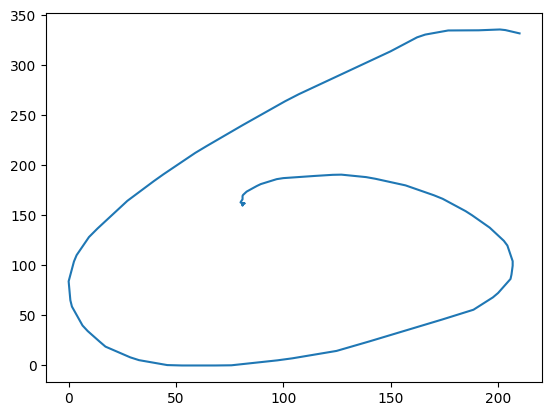

[2.00000000e+00 1.72560976e+00 1.45121951e+00 1.17682927e+00
 1.09756098e+00 1.37195122e+00 1.64634146e+00 1.92073171e+00
 1.80487805e+00 1.53048780e+00 1.25609756e+00 9.81707317e-01
 7.07317073e-01 4.32926829e-01 1.58536585e-01 1.15853659e-01
 3.90243902e-01 6.64634146e-01 9.39024390e-01 1.21341463e+00
 1.48780488e+00 1.76219512e+00 2.03658537e+00 2.31097561e+00
 2.58536585e+00 2.85975610e+00 3.40243902e+00 4.22560976e+00
 5.04878049e+00 5.87195122e+00 6.69512195e+00 7.51829268e+00
 8.34146341e+00 9.38414634e+00 1.13048780e+01 1.32256098e+01
 1.51463415e+01 1.73719512e+01 1.98414634e+01 2.23109756e+01
 2.47804878e+01 2.80000000e+01 3.12926829e+01 3.45853659e+01
 3.79512195e+01 4.15182927e+01 4.50853659e+01 4.86524390e+01
 5.22195122e+01 5.57865854e+01 5.93536585e+01 6.29207317e+01
 6.70243902e+01 7.11402439e+01 7.52560976e+01 7.92804878e+01
 8.31219512e+01 8.69634146e+01 9.08048780e+01 9.44573171e+01
 9.80243902e+01 1.01591463e+02 1.05170732e+02 1.09012195e+02
 1.12853659e+02 1.166951

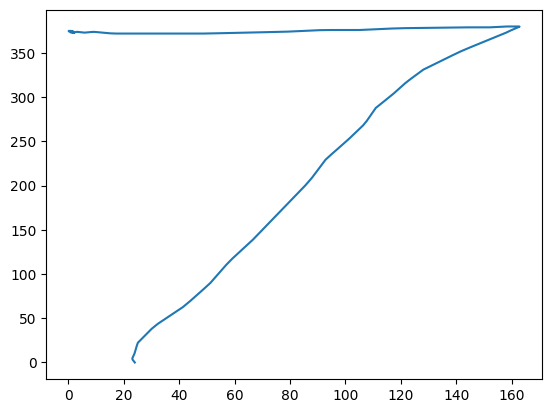

[3.70000000e+01 3.70000000e+01 3.70000000e+01 3.70000000e+01
 3.70000000e+01 3.70000000e+01 3.70000000e+01 3.70000000e+01
 3.68048780e+01 3.65304878e+01 3.62560976e+01 3.60000000e+01
 3.60000000e+01 3.60000000e+01 3.60000000e+01 3.60000000e+01
 3.60000000e+01 3.60000000e+01 3.60000000e+01 3.60000000e+01
 3.60000000e+01 3.60000000e+01 3.60000000e+01 3.60000000e+01
 3.60000000e+01 3.60000000e+01 3.58658537e+01 3.55914634e+01
 3.53170732e+01 3.50426829e+01 3.45365854e+01 3.39878049e+01
 3.34390244e+01 3.28353659e+01 3.20121951e+01 3.11890244e+01
 3.03658537e+01 2.95426829e+01 2.87195122e+01 2.78963415e+01
 2.70731707e+01 2.57500000e+01 2.43780488e+01 2.30060976e+01
 2.16341463e+01 2.02621951e+01 1.88902439e+01 1.75182927e+01
 1.61463415e+01 1.47743902e+01 1.34024390e+01 1.20304878e+01
 1.09268293e+01 9.82926829e+00 8.73170732e+00 7.63414634e+00
 6.53658537e+00 5.43902439e+00 4.34146341e+00 3.43292683e+00
 2.60975610e+00 1.78658537e+00 9.87804878e-01 7.13414634e-01
 4.39024390e-01 1.646341

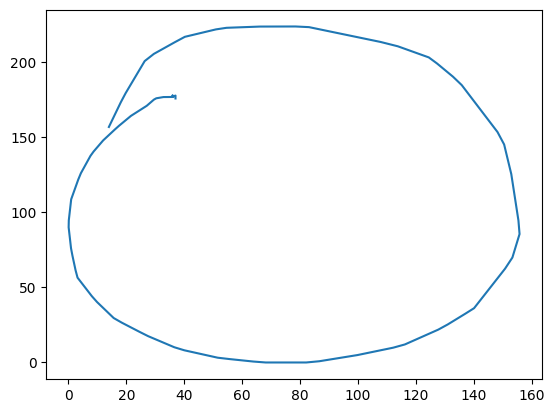

[  9.           9.           9.           9.           8.90243902
   8.62804878   8.35365854   8.07926829   8.           8.
   8.           8.           8.           8.           8.
   7.88414634   7.6097561    7.33536585   7.06097561   6.78658537
   6.51219512   6.23780488   6.           6.           6.
   6.           5.59756098   4.77439024   3.95121951   3.12804878
   3.23170732   3.50609756   3.7804878    4.1097561    4.65853659
   5.20731707   5.75609756   6.30487805   6.85365854   7.40243902
   7.95121951   8.75         9.57317073  10.39634146  11.43902439
  13.08536585  14.73170732  16.37804878  18.19512195  20.11585366
  22.03658537  23.95731707  26.68292683  29.42682927  32.17073171
  34.91463415  37.65853659  40.40243902  43.14634146  46.26829268
  49.56097561  52.85365854  56.14634146  59.43902439  62.73170732
  66.02439024  69.09756098  71.84146341  74.58536585  77.32926829
  79.86585366  82.33536585  84.80487805  87.24390244  89.43902439
  91.63414634  93.82926829  95.896

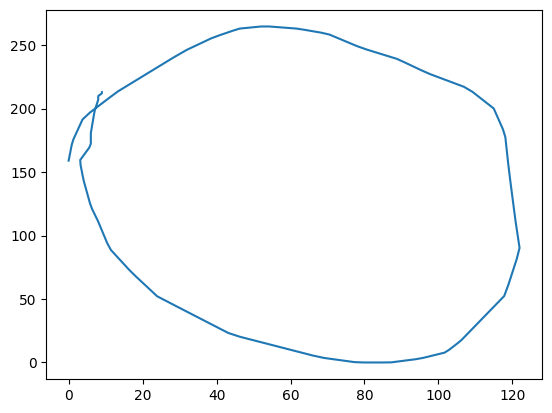

[0.00000000e+00 2.74390244e-01 5.48780488e-01 8.23170732e-01
 9.02439024e-01 6.28048780e-01 3.53658537e-01 7.92682927e-02
 1.95121951e-01 4.69512195e-01 7.43902439e-01 9.81707317e-01
 7.07317073e-01 4.32926829e-01 1.58536585e-01 1.15853659e-01
 3.90243902e-01 6.64634146e-01 9.39024390e-01 1.64024390e+00
 2.46341463e+00 3.28658537e+00 4.32926829e+00 6.79878049e+00
 9.26829268e+00 1.17378049e+01 1.42073171e+01 1.66768293e+01
 1.91463415e+01 2.16158537e+01 2.40853659e+01 2.65548780e+01
 2.90243902e+01 3.16585366e+01 3.49512195e+01 3.82439024e+01
 4.15365854e+01 4.48292683e+01 4.81219512e+01 5.14146341e+01
 5.47073171e+01 5.77500000e+01 6.07682927e+01 6.37865854e+01
 6.67317073e+01 6.94756098e+01 7.22195122e+01 7.49634146e+01
 7.73658537e+01 7.95609756e+01 8.17560976e+01 8.39512195e+01
 8.61463415e+01 8.83414634e+01 9.05365854e+01 9.24573171e+01
 9.38292683e+01 9.52012195e+01 9.65731707e+01 9.79451220e+01
 9.93170732e+01 1.00689024e+02 1.02060976e+02 1.03432927e+02
 1.04804878e+02 1.061768

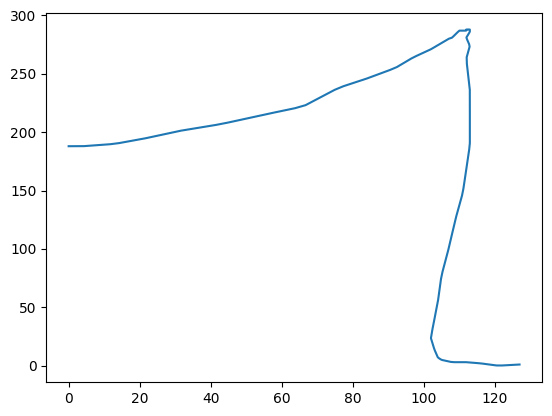

[ 32.          32.27439024  32.54878049  32.82317073  33.
  33.          33.          33.          32.80487805  32.5304878
  32.25609756  32.          32.          32.          32.
  31.76829268  31.2195122   30.67073171  30.12195122  30.
  30.          30.          30.03658537  30.31097561  30.58536585
  30.8597561   31.40243902  32.22560976  33.04878049  33.87195122
  37.01219512  40.57926829  44.14634146  47.38414634  49.30487805
  51.22560976  53.14634146  55.82926829  59.12195122  62.41463415
  65.70731707  69.25        72.81707317  76.38414634  79.95121951
  83.51829268  87.08536585  90.65243902  94.56097561  98.67682927
 102.79268293 106.90853659 110.75609756 114.59756098 118.43902439
 122.2804878  126.12195122 129.96341463 133.80487805 139.91463415
 147.04878049 154.18292683 161.09756098 163.29268293 165.48780488
 167.68292683 169.76829268 171.68902439 173.6097561  175.5304878
 177.03658537 178.40853659 179.7804878  180.9695122  180.69512195
 180.42073171 180.14634146 179.48780

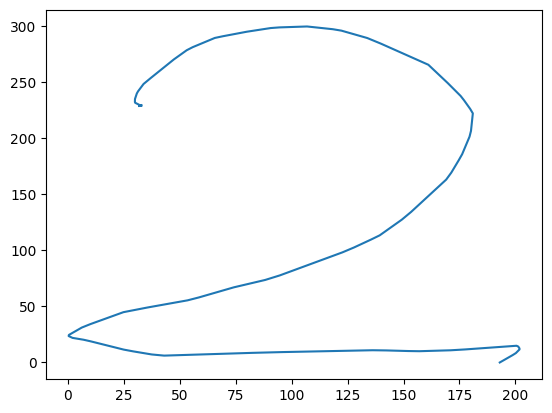

[ 10.          10.          10.          10.          10.29268293
  11.11585366  11.93902439  12.76219512  13.3902439   13.93902439
  14.48780488  15.05487805  15.87804878  16.70121951  17.52439024
  18.57926829  19.95121951  21.32317073  22.69512195  25.56097561
  28.85365854  32.14634146  35.36585366  38.1097561   40.85365854
  43.59756098  46.47560976  49.49390244  52.51219512  55.5304878
  58.7804878   62.07317073  65.36585366  68.60365854  71.62195122
  74.6402439   77.65853659  82.81097561  89.67073171  96.5304878
 103.3902439  107.         110.29268293 113.58536585 116.95121951
 120.51829268 124.08536585 127.65243902 129.51219512 130.33536585
 131.15853659 131.98170732 132.         132.         132.
 131.72560976 130.90243902 130.07926829 129.25609756 128.05487805
 126.68292683 125.31097561 123.8902439  121.42073171 118.95121951
 116.48170732 114.01219512 111.54268293 109.07317073 106.60365854
 104.75609756 103.1097561  101.46341463  99.84756098  98.47560976
  97.10365854  95.73

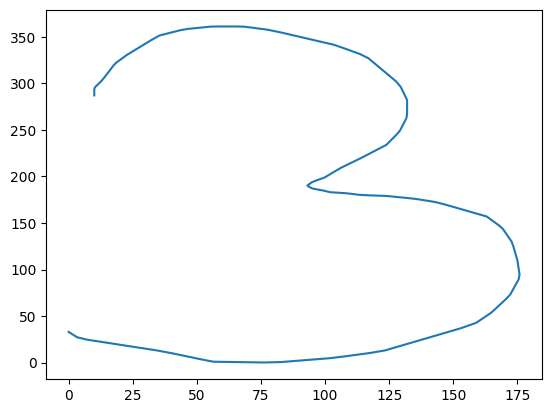

[1.18000000e+02 1.18000000e+02 1.18000000e+02 1.18000000e+02
 1.17902439e+02 1.17628049e+02 1.17353659e+02 1.17079268e+02
 1.16804878e+02 1.16530488e+02 1.16256098e+02 1.15981707e+02
 1.15707317e+02 1.15432927e+02 1.15158537e+02 1.15000000e+02
 1.15000000e+02 1.15000000e+02 1.15000000e+02 1.14359756e+02
 1.13536585e+02 1.12713415e+02 1.11890244e+02 1.11067073e+02
 1.10243902e+02 1.09420732e+02 1.08195122e+02 1.06548780e+02
 1.04902439e+02 1.03256098e+02 9.97560976e+01 9.59146341e+01
 9.20731707e+01 8.85060976e+01 8.60365854e+01 8.35670732e+01
 8.10975610e+01 7.86280488e+01 7.61585366e+01 7.36890244e+01
 7.12195122e+01 6.87500000e+01 6.62804878e+01 6.38109756e+01
 6.14878049e+01 5.95670732e+01 5.76463415e+01 5.57256098e+01
 5.24390244e+01 4.83231707e+01 4.42073171e+01 4.00914634e+01
 3.78536585e+01 3.56585366e+01 3.34634146e+01 3.08109756e+01
 2.72439024e+01 2.36768293e+01 2.01097561e+01 1.76768293e+01
 1.57560976e+01 1.38353659e+01 1.19268293e+01 1.02804878e+01
 8.63414634e+00 6.987804

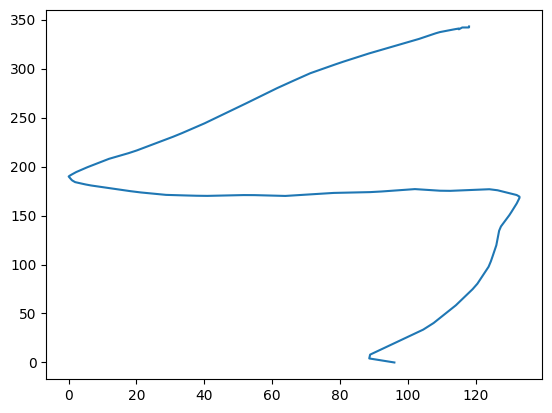

[163.         162.7195122  162.43902439 162.15853659 162.12195122
 162.40243902 162.68292683 162.96341463 162.75609756 162.47560976
 162.19512195 162.         162.         162.         162.
 161.79268293 161.51219512 161.23170732 161.04878049 161.32926829
 161.6097561  161.8902439  162.17073171 162.45121951 162.73170732
 163.06097561 164.46341463 165.86585366 167.26829268 170.81707317
 176.70731707 182.59756098 188.48780488 192.07317073 195.43902439
 198.80487805 202.46341463 206.67073171 210.87804878 215.08536585
 219.29268293 223.5        227.70731707 231.97560976 236.46341463
 240.95121951 245.43902439 250.1097561  254.87804878 259.64634146
 264.26829268 267.35365854 270.43902439 273.52439024 276.46341463
 279.26829268 282.07317073 284.87804878 286.34146341 287.74390244
 289.14634146 290.1097561  290.3902439  290.67073171 290.95121951
 290.07317073 288.95121951 287.82926829 286.41463415 284.17073171
 281.92682927 279.68292683 275.29268293 269.96341463 264.63414634
 259.34146341 254.

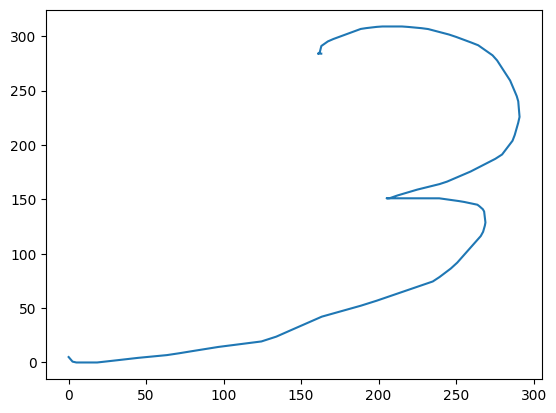

[4.30000000e+01 4.27195122e+01 4.24390244e+01 4.21585366e+01
 4.18780488e+01 4.15975610e+01 4.13170732e+01 4.10365854e+01
 4.07560976e+01 4.04756098e+01 4.01951220e+01 3.99146341e+01
 3.96341463e+01 3.93536585e+01 3.90731707e+01 3.90000000e+01
 3.90000000e+01 3.90000000e+01 3.90487805e+01 3.93292683e+01
 3.96097561e+01 3.98902439e+01 4.03414634e+01 4.09024390e+01
 4.14634146e+01 4.20609756e+01 4.34634146e+01 4.48658537e+01
 4.62682927e+01 4.95487805e+01 5.48780488e+01 6.02073171e+01
 6.55365854e+01 6.98414634e+01 7.40487805e+01 7.82560976e+01
 8.24634146e+01 8.66707317e+01 9.08780488e+01 9.50853659e+01
 9.97317073e+01 1.04500000e+02 1.09268293e+02 1.13975610e+02
 1.18463415e+02 1.22951220e+02 1.27439024e+02 1.34304878e+02
 1.42439024e+02 1.50573171e+02 1.58317073e+02 1.61963415e+02
 1.65609756e+02 1.69256098e+02 1.72317073e+02 1.74841463e+02
 1.77365854e+02 1.79890244e+02 1.82146341e+02 1.84390244e+02
 1.86634146e+02 1.88439024e+02 1.89560976e+02 1.90682927e+02
 1.91804878e+02 1.920000

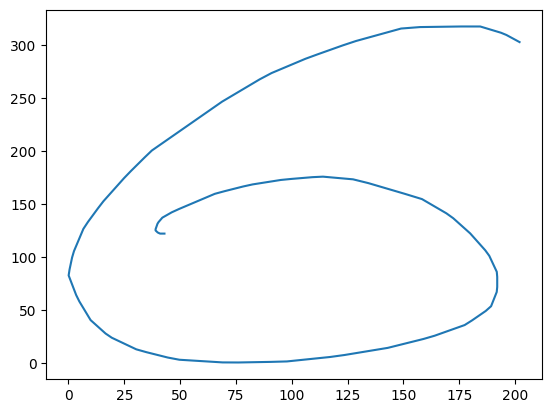

[3.00000000e+00 3.28048780e+00 3.56097561e+00 3.84146341e+00
 3.87804878e+00 3.59756098e+00 3.31707317e+00 3.03658537e+00
 2.75609756e+00 2.47560976e+00 2.19512195e+00 2.08536585e+00
 2.36585366e+00 2.64634146e+00 2.92682927e+00 2.79268293e+00
 2.51219512e+00 2.23170732e+00 1.90243902e+00 1.34146341e+00
 7.80487805e-01 2.19512195e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.21951220e-02 2.92682927e-01 5.73170732e-01
 8.53658537e-01 1.26829268e+00 1.82926829e+00 2.39024390e+00
 2.95121951e+00 4.28048780e+00 5.68292683e+00 7.08536585e+00
 8.78048780e+00 1.10243902e+01 1.32682927e+01 1.55121951e+01
 1.84146341e+01 2.15000000e+01 2.45853659e+01 2.77317073e+01
 3.10975610e+01 3.44634146e+01 3.78292683e+01 4.17439024e+01
 4.59512195e+01 5.01585366e+01 5.43414634e+01 5.82682927e+01
 6.21951220e+01 6.61219512e+01 7.03414634e+01 7.48292683e+01
 7.93170732e+01 8.38048780e+01 8.82926829e+01 9.27804878e+01
 9.72682927e+01 1.01756098e+02 1.06243902e+02 1.10731707e+02
 1.15219512e+02 1.192439

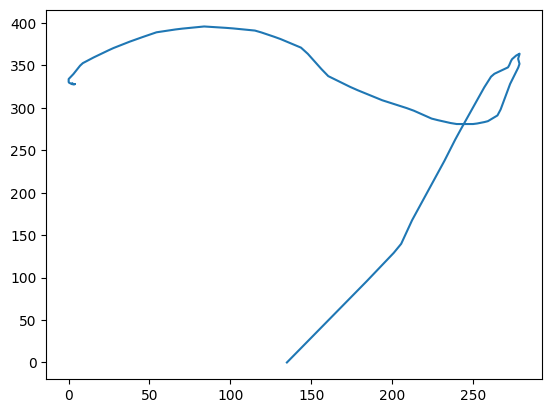

[ 32.          31.7195122   31.43902439  31.15853659  31.
  31.          31.          31.          31.          31.
  31.          30.91463415  30.63414634  30.35365854  30.07317073
  30.20731707  30.48780488  30.76829268  30.95121951  30.67073171
  30.3902439   30.1097561   30.          30.          30.
  30.          30.          30.          30.          29.86585366
  29.58536585  29.30487805  29.02439024  29.25609756  29.53658537
  29.81707317  30.29268293  31.13414634  31.97560976  32.81707317
  34.09756098  35.5         36.90243902  38.48780488  40.73170732
  42.97560976  45.2195122   47.82926829  50.63414634  53.43902439
  56.24390244  59.04878049  61.85365854  64.65853659  67.75609756
  71.12195122  74.48780488  77.85365854  84.70731707  91.7195122
  98.73170732 104.31707317 107.68292683 111.04878049 114.41463415
 117.08536585 119.6097561  122.13414634 124.43902439 126.12195122
 127.80487805 129.48780488 130.7804878  131.90243902 133.02439024
 134.         134.         134.    

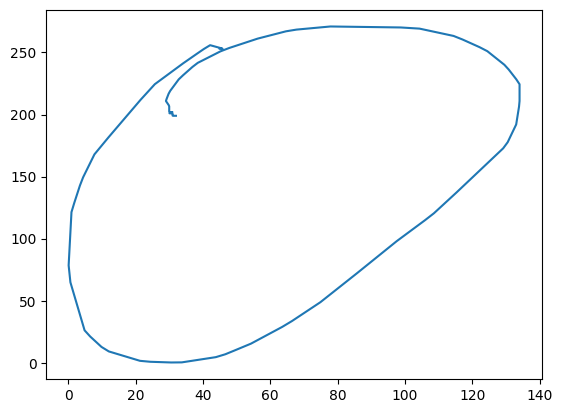

[ 29.          28.7195122   28.43902439  28.15853659  27.87804878
  27.59756098  27.31707317  27.03658537  26.75609756  26.47560976
  26.19512195  25.91463415  25.63414634  25.35365854  25.07317073
  24.79268293  24.51219512  24.23170732  23.90243902  23.34146341
  22.7804878   22.2195122   21.14634146  19.74390244  18.34146341
  16.96341463  16.12195122  15.2804878   14.43902439  13.73170732
  13.17073171  12.6097561   12.04878049  11.23170732  10.3902439
   9.54878049   9.           9.           9.           9.
   9.65853659  10.5         11.34146341  12.06097561  12.34146341
  12.62195122  12.90243902  13.54878049  14.3902439   15.23170732
  16.17073171  18.13414634  20.09756098  22.06097561  23.87804878
  25.56097561  27.24390244  28.92682927  31.14634146  33.3902439
  35.63414634  38.09756098  40.90243902  43.70731707  46.51219512
  49.08536585  51.6097561   54.13414634  56.73170732  59.53658537
  62.34146341  65.14634146  67.95121951  70.75609756  73.56097561
  76.36585366  79.17

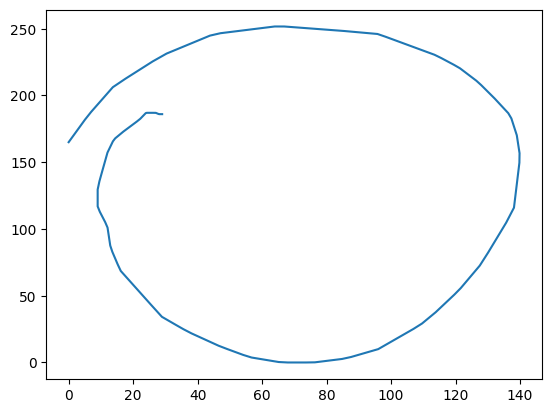

[147.         147.2804878  147.56097561 147.84146341 148.
 148.         148.         148.         148.         148.
 148.         147.74390244 146.90243902 146.06097561 145.2195122
 144.58536585 144.02439024 143.46341463 142.80487805 141.68292683
 140.56097561 139.43902439 138.14634146 136.74390244 135.34146341
 133.90243902 131.65853659 129.41463415 127.17073171 124.92682927
 122.68292683 120.43902439 118.19512195 115.69512195 113.17073171
 110.64634146 108.02439024 105.2195122  102.41463415  99.6097561
  96.36585366  93.          89.63414634  86.3902439   83.58536585
  80.7804878   77.97560976  75.17073171  72.36585366  69.56097561
  66.7804878   64.25609756  61.73170732  59.20731707  56.24390244
  52.87804878  49.51219512  46.14634146  39.29268293  32.2804878
  25.26829268  19.68292683  16.31707317  12.95121951   9.58536585
   7.6097561    5.92682927   4.24390244   2.7804878    1.93902439
   1.09756098   0.25609756   1.36585366   3.32926829   5.29268293
   7.25609756   9.2195122   1

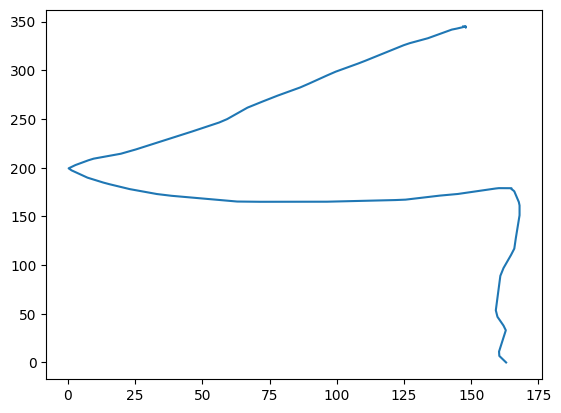

[ 54.          53.71341463  53.42682927  53.1402439   52.85365854
  52.56707317  52.2804878   51.99390244  51.70731707  51.42073171
  51.13414634  50.84756098  50.56097561  50.27439024  50.
  50.          50.          50.          50.31707317  50.8902439
  51.46341463  52.09146341  53.52439024  54.95731707  56.3902439
  58.48170732  61.06097561  63.6402439   66.31707317  70.04268293
  73.76829268  77.49390244  81.73170732  86.31707317  90.90243902
  95.51829268 100.3902439  105.26219512 110.13414634 115.3597561
 120.80487805 126.25       131.62195122 136.49390244 141.36585366
 146.23780488 150.92682927 155.51219512 160.09756098 164.55487805
 168.2804878  172.00609756 175.73170732 178.70121951 181.2804878
 183.8597561  186.29268293 188.01219512 189.73170732 191.45121951
 192.58536585 193.44512195 194.30487805 194.8902439  194.31707317
 193.74390244 193.17073171 191.99390244 190.56097561 189.12804878
 187.51219512 185.2195122  182.92682927 180.63414634 177.7195122
 174.56707317 171.41463

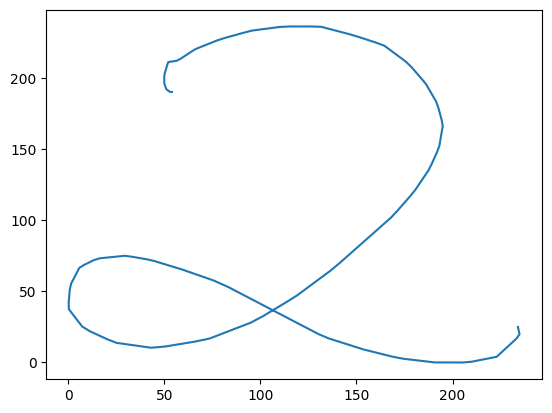

[4.90000000e+01 4.87134146e+01 4.84268293e+01 4.81402439e+01
 4.78536585e+01 4.75670732e+01 4.72804878e+01 4.70000000e+01
 4.70000000e+01 4.70000000e+01 4.70000000e+01 4.70000000e+01
 4.70000000e+01 4.70000000e+01 4.70243902e+01 4.75975610e+01
 4.81707317e+01 4.87439024e+01 4.93170732e+01 4.98902439e+01
 5.04634146e+01 5.10914634e+01 5.25243902e+01 5.39573171e+01
 5.53902439e+01 5.74817073e+01 6.00609756e+01 6.26402439e+01
 6.52439024e+01 6.81097561e+01 7.09756098e+01 7.38414634e+01
 7.67073171e+01 7.95731707e+01 8.24390244e+01 8.54268293e+01
 8.94390244e+01 9.34512195e+01 9.74634146e+01 1.01475610e+02
 1.05487805e+02 1.09500000e+02 1.13585366e+02 1.18170732e+02
 1.22756098e+02 1.27341463e+02 1.31743902e+02 1.36042683e+02
 1.40341463e+02 1.44640244e+02 1.48939024e+02 1.53237805e+02
 1.57536585e+02 1.60890244e+02 1.63756098e+02 1.66621951e+02
 1.69390244e+02 1.71682927e+02 1.73975610e+02 1.76268293e+02
 1.77000000e+02 1.77000000e+02 1.77000000e+02 1.76945122e+02
 1.76658537e+02 1.763719

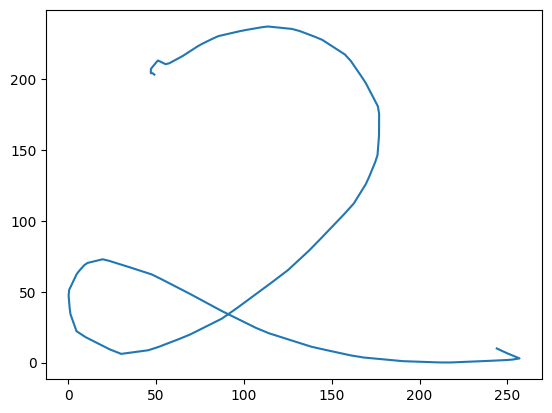

[151.         151.28658537 151.57317073 151.8597561  151.12195122
 149.40243902 147.68292683 145.87804878 140.14634146 134.41463415
 128.68292683 121.57926829 113.26829268 104.95731707  96.82926829
  92.81707317  88.80487805  84.79268293  81.09756098  77.65853659
  74.2195122   70.79878049  67.64634146  64.49390244  61.34146341
  58.51829268  55.93902439  53.3597561   50.80487805  48.51219512
  46.2195122   43.92682927  41.80487805  39.79878049  37.79268293
  35.84756098  34.41463415  32.98170732  31.54878049  30.11585366
  28.68292683  27.25        25.8902439   25.0304878   24.17073171
  23.31097561  22.45121951  21.59146341  20.73170732  19.95731707
  19.67073171  19.38414634  19.09756098  18.62195122  18.04878049
  17.47560976  16.95121951  16.66463415  16.37804878  16.09146341
  15.41463415  14.55487805  13.69512195  13.          13.
  13.          13.          13.          13.          13.
  12.87804878  12.30487805  11.73170732  11.15853659  10.58536585
  10.01219512   9.43902439

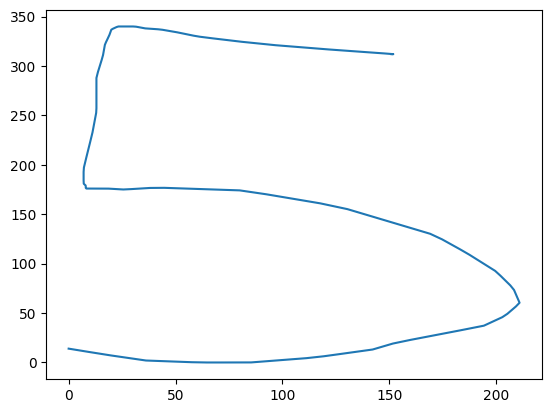

[114.         114.28658537 114.57317073 114.8597561  115.14634146
 115.43292683 115.7195122  115.99390244 115.70731707 115.42073171
 115.13414634 113.47560976 110.6097561  107.74390244 104.69512195
  97.5304878   90.36585366  83.20121951  76.35365854  69.76219512
  63.17073171  56.79878049  53.64634146  50.49390244  47.34146341
  43.5304878   39.23170732  34.93292683  30.92682927  30.06707317
  29.20731707  28.34756098  28.          28.          28.
  28.15243902  29.58536585  31.01829268  32.45121951  34.76829268
  37.63414634  40.5         43.47560976  47.20121951  50.92682927
  54.65243902  58.92682927  63.51219512  68.09756098  72.72560976
  77.59756098  82.4695122   87.34146341  92.59146341  98.03658537
 103.48170732 108.97560976 114.70731707 120.43902439 126.17073171
 131.12195122 135.70731707 140.29268293 144.71341463 148.43902439
 152.16463415 155.8902439  159.61585366 163.34146341 167.06707317
 170.36585366 172.08536585 173.80487805 175.52439024 176.82926829
 177.97560976 179.

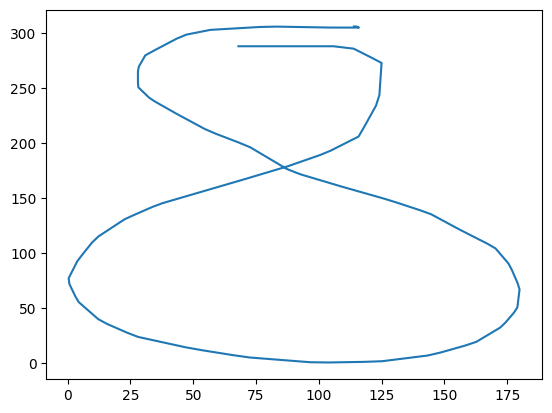

[125.         124.42682927 123.85365854 123.2804878  122.85365854
 122.56707317 122.2804878  121.99390244 121.70731707 121.42073171
 121.13414634 120.84756098 120.56097561 120.27439024 119.97560976
 119.40243902 118.82926829 118.25609756 117.68292683 117.1097561
 116.53658537 115.92682927 114.7804878  113.63414634 112.48780488
 109.20121951 104.32926829  99.45731707  94.29268293  85.98170732
  77.67073171  69.3597561   63.09756098  58.22560976  53.35365854
  48.11585366  39.80487805  31.49390244  23.18292683  17.34756098
  13.04878049   8.75         4.81707317   3.38414634   1.95121951
   0.51829268   0.           0.           0.           0.38414634
   2.96341463   5.54268293   8.12195122  10.70121951  13.2804878
  15.8597561   19.41463415  27.72560976  36.03658537  44.34756098
  50.90243902  56.63414634  62.36585366  67.87804878  72.46341463
  77.04878049  81.63414634  86.42073171  91.29268293  96.16463415
 100.97560976 105.56097561 110.14634146 114.73170732 118.69512195
 122.4207317

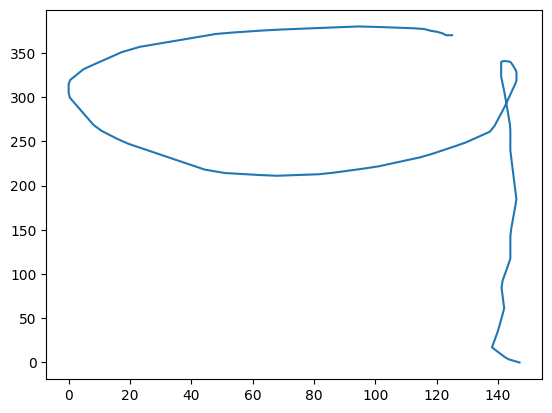

[ 18.          17.71341463  17.42682927  17.1402439   16.85365854
  16.56707317  16.2804878   16.00609756  16.29268293  16.57926829
  16.86585366  16.84756098  16.56097561  16.27439024  15.98780488
  15.70121951  15.41463415  15.12804878  15.15853659  15.44512195
  15.73170732  15.98170732  15.69512195  15.40853659  15.12195122
  15.          15.          15.          15.          15.
  15.          15.          15.34146341  15.91463415  16.48780488
  17.09146341  17.95121951  18.81097561  19.67073171  21.06097561
  22.7804878   24.5         26.2195122   27.93902439  29.65853659
  31.37804878  33.46341463  35.75609756  38.04878049  40.34146341
  42.63414634  44.92682927  47.2195122   49.70121951  52.2804878
  54.8597561   57.48780488  60.35365854  63.2195122   66.08536585
  68.75609756  71.33536585  73.91463415  76.49390244  79.07317073
  81.65243902  84.23170732  86.6097561   88.90243902  91.19512195
  93.42682927  95.43292683  97.43902439  99.44512195 101.24390244
 102.96341463 104.6

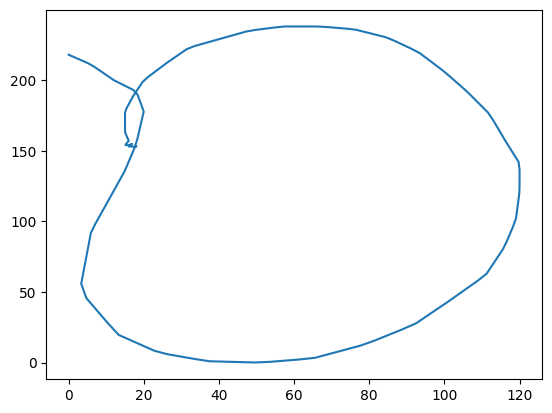

[1.18000000e+02 1.18000000e+02 1.18000000e+02 1.18000000e+02
 1.17853659e+02 1.17567073e+02 1.17280488e+02 1.16993902e+02
 1.16707317e+02 1.16420732e+02 1.16134146e+02 1.15847561e+02
 1.15560976e+02 1.15274390e+02 1.15000000e+02 1.15000000e+02
 1.15000000e+02 1.15000000e+02 1.14048780e+02 1.12329268e+02
 1.10609756e+02 1.08890244e+02 1.07170732e+02 1.05451220e+02
 1.03731707e+02 1.01847561e+02 9.98414634e+01 9.78353659e+01
 9.57804878e+01 9.32012195e+01 9.06219512e+01 8.80426829e+01
 8.49512195e+01 8.15121951e+01 7.80731707e+01 7.46951220e+01
 7.18292683e+01 6.89634146e+01 6.60975610e+01 6.30548780e+01
 5.99024390e+01 5.67500000e+01 5.35975610e+01 5.04451220e+01
 4.72926829e+01 4.41402439e+01 4.15365854e+01 3.92439024e+01
 3.69512195e+01 3.46585366e+01 3.23658537e+01 3.00731707e+01
 2.77804878e+01 2.54878049e+01 2.31951220e+01 2.09024390e+01
 1.87560976e+01 1.73231707e+01 1.58902439e+01 1.44573171e+01
 1.26341463e+01 1.06280488e+01 8.62195122e+00 6.61585366e+00
 4.60975610e+00 2.603658

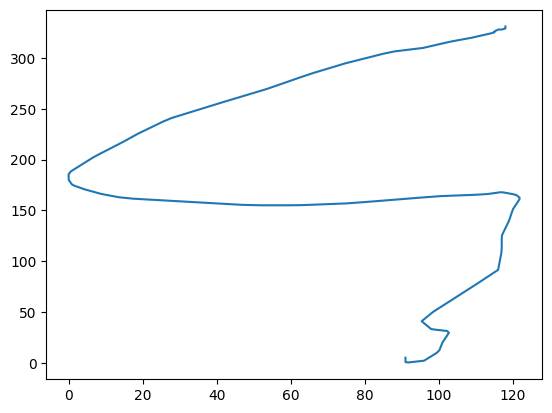

[52.         52.         52.         52.         52.17073171 52.46341463
 52.75609756 52.95121951 52.65853659 52.36585366 52.07317073 52.
 52.         52.         52.         52.         52.         52.
 52.         52.         52.         52.         52.         52.
 52.         52.         52.         52.         52.3902439  52.97560976
 53.56097561 54.         54.         54.         54.         54.48780488
 55.07317073 55.65853659 56.         56.         56.         56.
 56.29268293 56.58536585 56.87804878 57.34146341 57.92682927 58.51219512
 59.         59.         59.         59.         59.         59.
 59.         59.         59.         59.         59.         59.
 59.         59.         59.         59.         59.         58.97560976
 58.68292683 58.3902439  58.09756098 58.         58.         58.
 58.         58.         58.         58.         58.48780488 59.07317073
 59.65853659 60.12195122 60.41463415 60.70731707 61.         61.58536585
 62.17073171 62.75609756 63.      

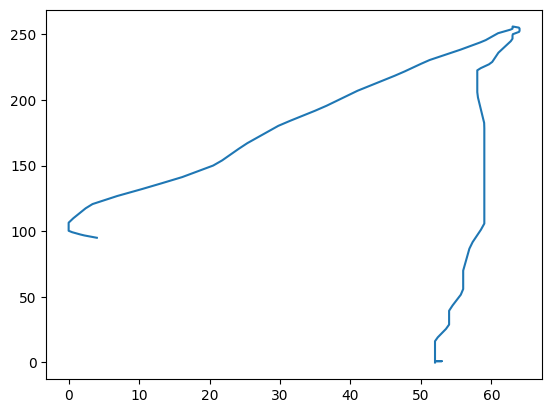

[2.00000000e+00 2.29268293e+00 2.58536585e+00 2.87804878e+00
 2.65853659e+00 2.07317073e+00 1.48780488e+00 9.51219512e-01
 6.58536585e-01 3.65853659e-01 7.31707317e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 9.75609756e-02 3.90243902e-01
 6.82926829e-01 9.75609756e-01 1.53658537e+00 2.12195122e+00
 2.70731707e+00 3.43902439e+00 4.31707317e+00 5.19512195e+00
 6.14634146e+00 7.90243902e+00 9.65853659e+00 1.14146341e+01
 1.43414634e+01 1.78536585e+01 2.13658537e+01 2.50243902e+01
 2.91219512e+01 3.32195122e+01 3.73170732e+01 4.23902439e+01
 4.76585366e+01 5.29268293e+01 5.83170732e+01 6.38780488e+01
 6.94390244e+01 7.50000000e+01 8.08536585e+01 8.67073171e+01
 9.25609756e+01 9.82439024e+01 1.03804878e+02 1.09365854e+02
 1.14878049e+02 1.20146341e+02 1.25414634e+02 1.30682927e+02
 1.35292683e+02 1.39682927e+02 1.44073171e+02 1.47878049e+02
 1.50512195e+02 1.53146341e+02 1.55780488e+02 1.57609756e+02
 1.59365854e+02 1.61121951e+02 1.61853659e+02 1.61560976e+02
 1.61268293e+02 1.608536

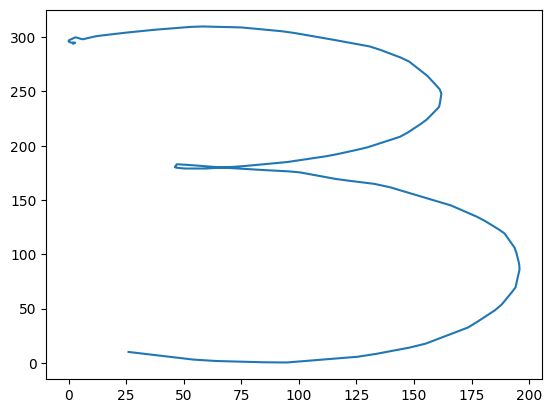

[102.         102.         102.         102.         102.
 102.         102.         101.90243902 101.31707317 100.73170732
 100.14634146  99.34146341  98.46341463  97.58536585  96.51219512
  95.04878049  93.58536585  92.12195122  89.85365854  87.51219512
  85.17073171  82.68292683  80.04878049  77.41463415  74.70731707
  71.19512195  67.68292683  64.17073171  60.85365854  57.63414634
  54.41463415  51.26829268  48.34146341  45.41463415  42.48780488
  39.80487805  37.17073171  34.53658537  31.90243902  29.26829268
  26.63414634  24.          21.65853659  19.31707317  16.97560976
  14.46341463  11.82926829   9.19512195   6.80487805   5.63414634
   4.46341463   3.29268293   2.34146341   1.46341463   0.58536585
   0.           0.           0.           0.           0.26829268
   0.56097561   0.85365854   1.29268293   1.87804878   2.46341463
   3.17073171   5.2195122    7.26829268   9.31707317  14.68292683
  21.70731707  28.73170732  36.41463415  46.07317073  55.73170732
  65.3902439   70.

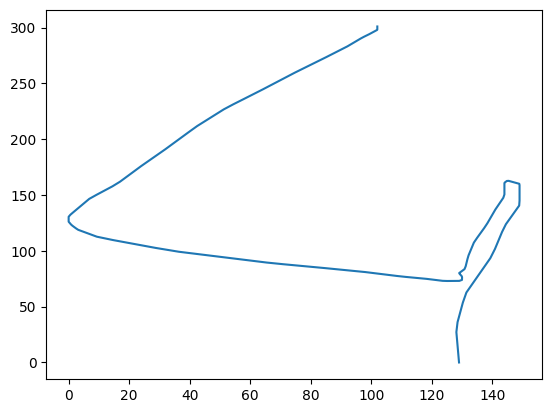

[2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 1.82926829e+00 1.53658537e+00 1.24390244e+00 9.51219512e-01
 6.58536585e-01 3.65853659e-01 7.31707317e-02 2.19512195e-01
 5.12195122e-01 8.04878049e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.14634146e+00 1.43902439e+00 1.73170732e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.48780488e+00
 3.07317073e+00 3.65853659e+00 4.24390244e+00 4.82926829e+00
 5.41463415e+00 6.00000000e+00 6.87804878e+00 7.75609756e+00
 8.63414634e+00 9.85365854e+00 1.13170732e+01 1.27804878e+01
 1.43902439e+01 1.67317073e+01 1.90731707e+01 2.14146341e+01
 2.48536585e+01 2.86585366e+01 3.24634146e+01 3.64634146e+01
 4.08536585e+01 4.52439024e+01 4.96341463e+01 5.48292683e+01
 6.00975610e+01 6.53658537e+01 7.07804878e+01 7.63414634e+01
 8.19024390e+01 8.746341

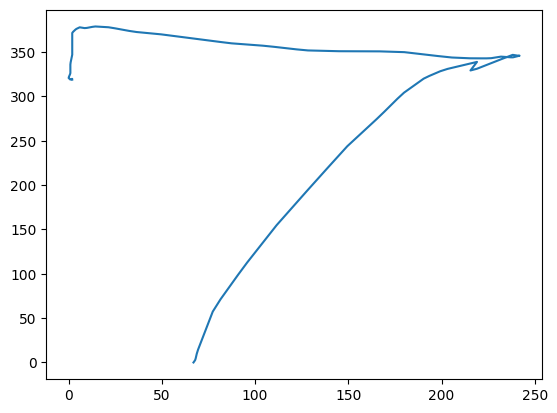

[9.10000000e+01 9.12926829e+01 9.15853659e+01 9.18780488e+01
 9.20000000e+01 9.20000000e+01 9.20000000e+01 9.20000000e+01
 9.20000000e+01 9.20000000e+01 9.20000000e+01 9.20000000e+01
 9.20000000e+01 9.20000000e+01 9.19024390e+01 9.16097561e+01
 9.13170732e+01 9.10243902e+01 9.04634146e+01 8.98780488e+01
 8.92926829e+01 8.82682927e+01 8.68048780e+01 8.53414634e+01
 8.37804878e+01 8.11463415e+01 7.85121951e+01 7.58780488e+01
 7.24634146e+01 6.86585366e+01 6.48536585e+01 6.11219512e+01
 5.76097561e+01 5.40975610e+01 5.05853659e+01 4.65853659e+01
 4.24878049e+01 3.83902439e+01 3.47804878e+01 3.18536585e+01
 2.89268293e+01 2.60000000e+01 2.27804878e+01 1.95609756e+01
 1.63414634e+01 1.36341463e+01 1.12926829e+01 8.95121951e+00
 6.75609756e+00 5.29268293e+00 3.82926829e+00 2.36585366e+00
 2.21951220e+00 2.51219512e+00 2.80487805e+00 3.29268293e+00
 4.17073171e+00 5.04878049e+00 5.92682927e+00 8.14634146e+00
 1.04878049e+01 1.28292683e+01 1.56097561e+01 1.88292683e+01
 2.20487805e+01 2.539024

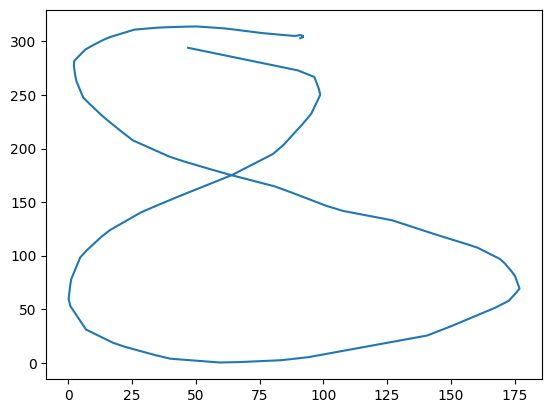

[135.         135.         135.         135.         135.
 135.         135.         135.         135.         135.
 135.         135.         135.         135.         135.
 135.         135.         135.         134.19512195 133.31707317
 132.43902439 132.         132.         132.         132.
 132.         132.         132.         132.         132.
 132.         132.07317073 132.36585366 132.65853659 132.95121951
 133.48780488 134.07317073 134.65853659 135.12195122 135.41463415
 135.70731707 136.         136.29268293 136.58536585 136.87804878
 137.17073171 137.46341463 137.75609756 138.         138.
 138.         138.         138.         138.         138.
 138.         138.         138.         138.         137.46341463
 136.87804878 136.29268293 134.82926829 132.48780488 130.14634146
 127.85365854 126.09756098 124.34146341 122.58536585 120.24390244
 117.6097561  114.97560976 112.26829268 109.34146341 106.41463415
 103.48780488 100.07317073  96.56097561  93.04878049  89.7804878
 

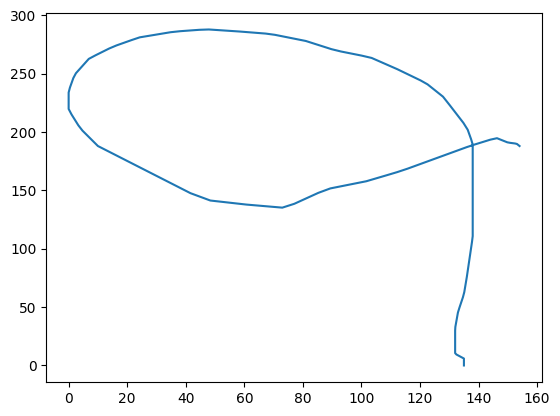

[2.20000000e+01 2.17073171e+01 2.14146341e+01 2.11219512e+01
 2.10000000e+01 2.10000000e+01 2.10000000e+01 2.09512195e+01
 2.06585366e+01 2.03658537e+01 2.00731707e+01 1.97804878e+01
 1.94878049e+01 1.91951220e+01 1.90000000e+01 1.90000000e+01
 1.90000000e+01 1.90000000e+01 1.87317073e+01 1.84390244e+01
 1.81463415e+01 1.80000000e+01 1.80000000e+01 1.80000000e+01
 1.79756098e+01 1.76829268e+01 1.73902439e+01 1.70975610e+01
 1.71951220e+01 1.74878049e+01 1.77804878e+01 1.81463415e+01
 1.87317073e+01 1.93170732e+01 1.99024390e+01 2.09756098e+01
 2.21463415e+01 2.33170732e+01 2.48536585e+01 2.69024390e+01
 2.89512195e+01 3.10000000e+01 3.33414634e+01 3.56829268e+01
 3.80243902e+01 4.08780488e+01 4.40975610e+01 4.73170732e+01
 5.05365854e+01 5.37560976e+01 5.69756098e+01 6.01951220e+01
 6.40731707e+01 6.81707317e+01 7.22682927e+01 7.63658537e+01
 8.04634146e+01 8.45609756e+01 8.86585366e+01 9.27560976e+01
 9.68536585e+01 1.00951220e+02 1.05195122e+02 1.09585366e+02
 1.13975610e+02 1.183170

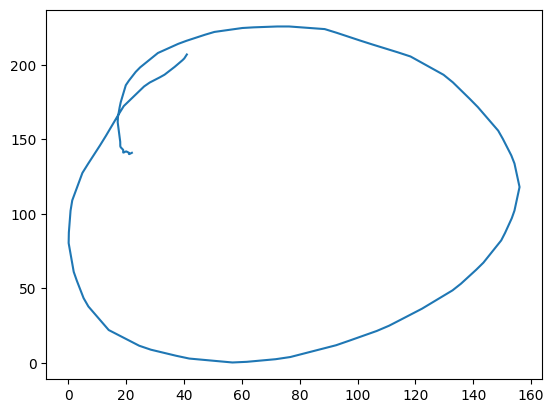

[7.00000000e+00 6.70731707e+00 6.41463415e+00 6.12195122e+00
 6.00000000e+00 6.00000000e+00 6.00000000e+00 5.95121951e+00
 5.65853659e+00 5.36585366e+00 5.07317073e+00 5.21951220e+00
 5.51219512e+00 5.80487805e+00 5.90243902e+00 5.60975610e+00
 5.31707317e+00 5.02439024e+00 5.26829268e+00 5.56097561e+00
 5.85365854e+00 6.14634146e+00 6.43902439e+00 6.73170732e+00
 7.04878049e+00 7.63414634e+00 8.21951220e+00 8.80487805e+00
 9.78048780e+00 1.09512195e+01 1.21219512e+01 1.35121951e+01
 1.55609756e+01 1.76097561e+01 1.96585366e+01 2.19512195e+01
 2.42926829e+01 2.66341463e+01 2.93414634e+01 3.25609756e+01
 3.57804878e+01 3.90000000e+01 4.30975610e+01 4.71951220e+01
 5.12926829e+01 5.82926829e+01 6.73658537e+01 7.64390244e+01
 8.46341463e+01 8.84390244e+01 9.22439024e+01 9.60487805e+01
 9.96341463e+01 1.03146341e+02 1.06658537e+02 1.09975610e+02
 1.12902439e+02 1.15829268e+02 1.18756098e+02 1.21414634e+02
 1.24048780e+02 1.26682927e+02 1.28292683e+02 1.28878049e+02
 1.29463415e+02 1.298292

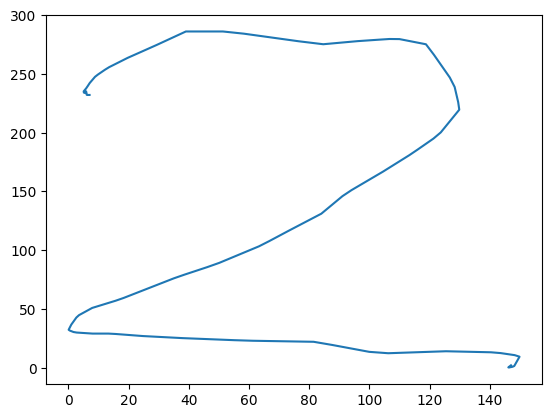

[114.         114.         114.         114.         114.
 114.         114.         114.         114.         114.
 114.         114.         114.         114.         113.90243902
 113.6097561  113.31707317 113.02439024 112.19512195 111.31707317
 110.43902439 109.70731707 109.12195122 108.53658537 107.90243902
 106.73170732 105.56097561 104.3902439  102.63414634 100.58536585
  98.53658537  96.56097561  94.80487805  93.04878049  91.29268293
  89.04878049  86.70731707  84.36585366  81.90243902  79.26829268
  76.63414634  74.          70.48780488  66.97560976  63.46341463
  60.29268293  57.36585366  54.43902439  51.46341463  48.24390244
  45.02439024  41.80487805  39.24390244  36.90243902  34.56097561
  32.2195122   29.87804878  27.53658537  25.19512195  23.92682927
  22.75609756  21.58536585  20.26829268  18.80487805  17.34146341
  15.92682927  15.04878049  14.17073171  13.29268293  12.2195122
  11.04878049   9.87804878   8.85365854   8.26829268   7.68292683
   7.09756098   6.75609756 

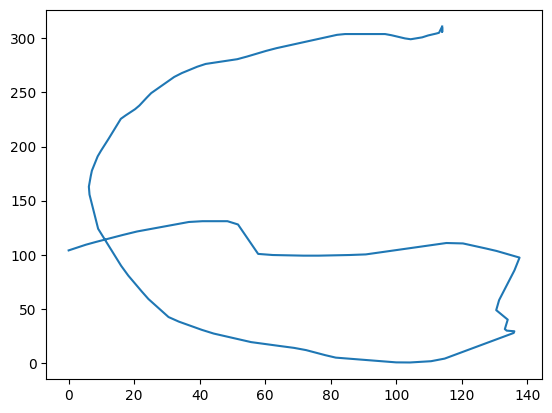

[  0.           0.29268293   0.58536585   0.87804878   1.17073171
   1.46341463   1.75609756   2.04878049   2.34146341   2.63414634
   2.92682927   3.43902439   4.02439024   4.6097561    5.19512195
   5.7804878    6.36585366   6.95121951   8.07317073   9.24390244
  10.41463415  12.17073171  14.51219512  16.85365854  19.29268293
  22.80487805  26.31707317  29.82926829  33.53658537  37.34146341
  41.14634146  46.26829268  55.34146341  64.41463415  73.48780488
  78.41463415  82.51219512  86.6097561   90.95121951  95.63414634
 100.31707317 105.         109.3902439  113.7804878  118.17073171
 122.2195122  126.02439024 129.82926829 133.53658537 136.75609756
 139.97560976 143.19512195 145.97560976 148.6097561  151.24390244
 153.97560976 156.90243902 159.82926829 162.75609756 164.6097561
 166.36585366 168.12195122 169.73170732 171.19512195 172.65853659
 174.07317073 174.95121951 175.82926829 176.70731707 177.58536585
 178.46341463 179.34146341 180.         180.         180.
 180.         179.7

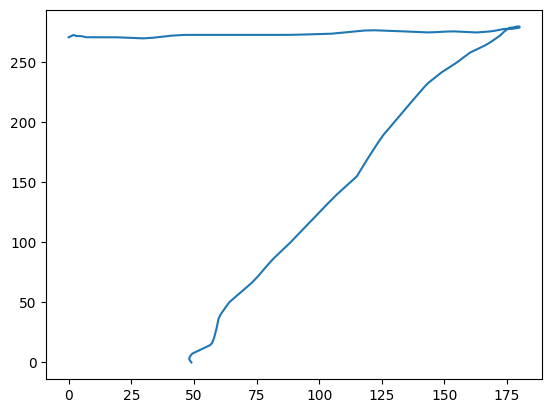

[ 26.          26.          26.          26.          25.80487805
  25.50609756  25.20731707  25.          25.          25.
  25.          24.71341463  24.41463415  24.11585366  23.63414634
  23.03658537  22.43902439  21.92073171  21.62195122  21.32317073
  21.02439024  21.          21.          21.          21.68292683
  22.87804878  24.07317073  25.53658537  27.92682927  30.31707317
  32.70731707  36.14634146  39.73170732  43.31707317  47.2195122
  51.40243902  55.58536585  59.98780488  65.36585366  70.74390244
  76.12195122  81.5         86.87804878  92.25609756  97.7804878
 103.45731707 109.13414634 114.72560976 119.80487805 124.88414634
 129.96341463 134.09146341 137.97560976 141.8597561  145.47560976
 148.76219512 152.04878049 155.21341463 157.30487805 159.39634146
 161.48780488 162.45121951 163.04878049 163.64634146 163.14634146
 161.05487805 158.96341463 156.83536585 154.14634146 151.45731707
 148.76829268 145.01219512 140.82926829 136.64634146 132.24390244
 127.46341463 122.68

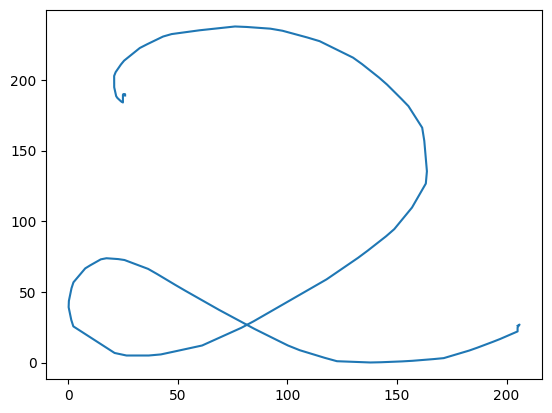

[2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.00000000e+00 1.92073171e+00 1.62195122e+00 1.32317073e+00
 1.02439024e+00 1.27439024e+00 1.57317073e+00 1.87195122e+00
 2.00000000e+00 2.00000000e+00 2.00000000e+00 1.93292683e+00
 1.63414634e+00 1.33536585e+00 1.03658537e+00 7.37804878e-01
 4.39024390e-01 1.40243902e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.50000000e-01 1.64634146e+00 2.54268293e+00
 3.87804878e+00 5.67073171e+00 7.46341463e+00 9.46951220e+00
 1.27560976e+01 1.60426829e+01 1.93292683e+01 2.35670732e+01
 2.80487805e+01 3.25304878e+01 3.78170732e+01 4.40914634e+01
 5.03658537e+01 5.67012195e+01 6.35731707e+01 7.04451220e+01
 7.73170732e+01 8.41890244e+01 9.10609756e+01 9.79329268e+01
 1.04682927e+02 1.112560

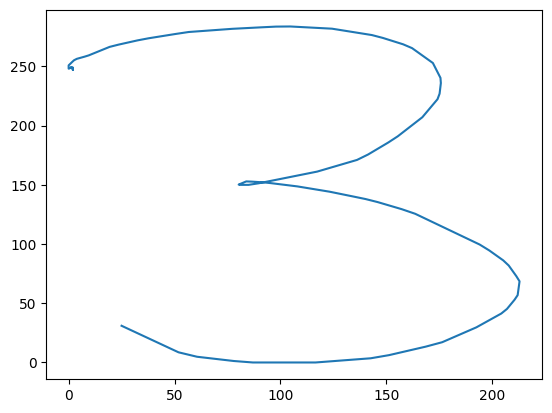

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.14634146e-02
 3.90243902e-01 6.89024390e-01 9.87804878e-01 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.18292683e+00 1.48170732e+00
 1.78048780e+00 2.07926829e+00 2.37804878e+00 2.67682927e+00
 2.97560976e+00 3.54878049e+00 4.14634146e+00 4.74390244e+00
 5.34146341e+00 5.93902439e+00 6.53658537e+00 7.33536585e+00
 8.82926829e+00 1.03231707e+01 1.18170732e+01 1.43597561e+01
 1.70487805e+01 1.97378049e+01 2.25853659e+01 2.55731707e+01
 2.85609756e+01 3.17682927e+01 3.59512195e+01 4.01341463e+01
 4.43170732e+01 4.90000000e+01 5.37804878e+01 5.85609756e+01
 6.34878049e+01 6.85670732e+01 7.36463415e+01 7.88109756e+01
 8.44878049e+01 9.01646341e+01 9.58414634e+01 1.01518293e+02
 1.07195122e+02 1.12871951e+02 1.20560976e+02 1.30719512e+02
 1.40878049e+02 1.50975610e+02 1.60536585e+02 1.70097561e+02
 1.79658537e+02 1.84932927e+02 1.88817073e+02 1.92701220e+02
 1.96829268e+02 2.013109

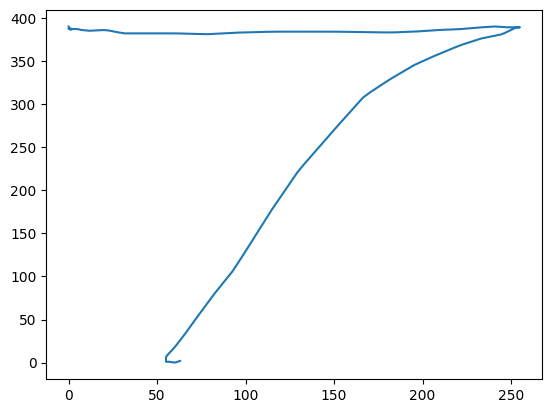

[ 25.          25.          25.          25.          24.80487805
  24.50609756  24.20731707  23.90853659  23.6097561   23.31097561
  23.01219512  23.          23.          23.          22.81707317
  22.51829268  22.2195122   21.84146341  21.24390244  20.64634146
  20.04878049  19.45121951  18.85365854  18.25609756  17.65853659
  17.06097561  16.46341463  15.79878049  14.90243902  14.00609756
  13.1097561   12.73780488  12.43902439  12.1402439   11.84146341
  11.54268293  11.24390244  11.1097561   11.70731707  12.30487805
  12.90243902  13.25        13.54878049  13.84756098  14.58536585
  15.7804878   16.97560976  18.51219512  22.09756098  25.68292683
  29.26829268  31.66463415  33.75609756  35.84756098  38.07317073
  40.46341463  42.85365854  45.30487805  48.29268293  51.2804878
  54.26829268  57.70731707  61.29268293  64.87804878  68.34146341
  71.62804878  74.91463415  78.2195122   81.80487805  85.3902439
  88.97560976  92.34756098  95.63414634  98.92073171 102.31707317
 105.9024390

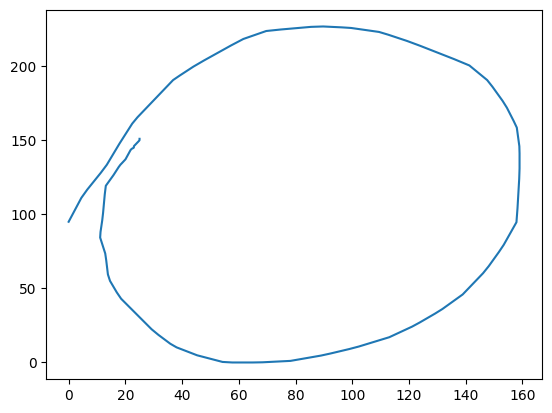

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 9.14634146e-02
 3.90243902e-01 6.89024390e-01 9.87804878e-01 1.28658537e+00
 1.58536585e+00 1.88414634e+00 1.81707317e+00 1.51829268e+00
 1.21951220e+00 1.07926829e+00 1.37804878e+00 1.67682927e+00
 1.97560976e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 2.34146341e+00 2.93902439e+00 3.53658537e+00 4.33536585e+00
 5.82926829e+00 7.32317073e+00 8.81707317e+00 1.13597561e+01
 1.40487805e+01 1.67378049e+01 1.97439024e+01 2.30304878e+01
 2.63170732e+01 2.97682927e+01 3.39512195e+01 3.81341463e+01
 4.23170732e+01 4.70000000e+01 5.17804878e+01 5.65609756e+01
 6.09024390e+01 6.47865854e+01 6.86707317e+01 7.25975610e+01
 7.67804878e+01 8.09634146e+01 8.51463415e+01 8.93292683e+01
 9.35121951e+01 9.76951220e+01 1.01743902e+02 1.05628049e+02
 1.09512195e+02 1.13335366e+02 1.16621951e+02 1.19908537e+02
 1.23195122e+02 1.26030488e+02 1.28719512e+02 1.31408537e+02
 1.33853659e+02 1.359451

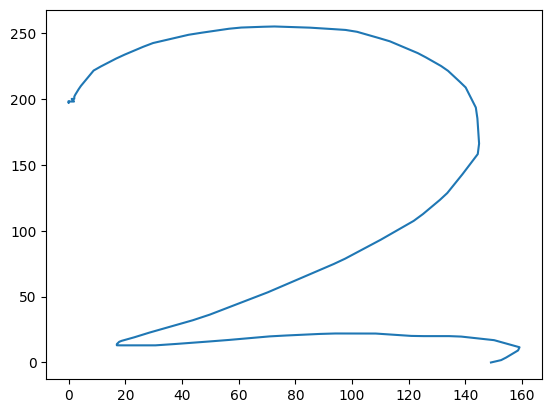

[126.         125.70121951 125.40243902 125.10365854 125.
 125.         125.         124.81707317 124.2195122  123.62195122
 123.02439024 122.71341463 122.41463415 122.11585366 121.45121951
 120.55487805 119.65853659 118.68292683 117.48780488 116.29268293
 115.09756098 112.5304878  109.84146341 107.15243902 104.46341463
 101.77439024  99.08536585  96.39634146  93.70731707  91.01829268
  88.32926829  85.37804878  82.3902439   79.40243902  75.30487805
  70.22560976  65.14634146  60.50609756  57.81707317  55.12804878
  52.43902439  50.          47.6097561   45.2195122   42.97560976
  40.88414634  38.79268293  36.82926829  35.63414634  34.43902439
  33.24390244  31.57317073  29.7804878   27.98780488  26.06097561
  23.9695122   21.87804878  20.          20.          20.
  20.          20.22560976  20.52439024  20.82317073  21.36585366
  22.26219512  23.15853659  24.07317073  25.26829268  26.46341463
  27.65853659  29.49390244  31.58536585  33.67682927  35.98780488
  38.67682927  41.36585366

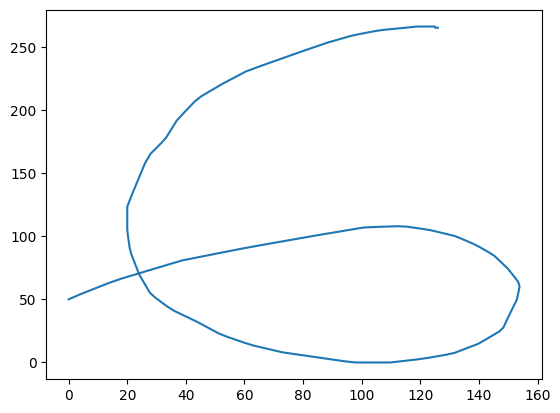

[1.42000000e+02 1.42000000e+02 1.42000000e+02 1.42000000e+02
 1.41804878e+02 1.41506098e+02 1.41207317e+02 1.41091463e+02
 1.41390244e+02 1.41689024e+02 1.41987805e+02 1.41426829e+02
 1.40829268e+02 1.40231707e+02 1.39634146e+02 1.39036585e+02
 1.38439024e+02 1.37920732e+02 1.37621951e+02 1.37323171e+02
 1.37024390e+02 1.36451220e+02 1.35853659e+02 1.35256098e+02
 1.34146341e+02 1.32652439e+02 1.31158537e+02 1.29597561e+02
 1.27804878e+02 1.26012195e+02 1.24219512e+02 1.19542683e+02
 1.14463415e+02 1.09384146e+02 1.02402439e+02 9.37378049e+01
 8.50731707e+01 7.71768293e+01 7.26951220e+01 6.82134146e+01
 6.37317073e+01 5.92500000e+01 5.47682927e+01 5.02865854e+01
 4.60975610e+01 4.22134146e+01 3.83292683e+01 3.45731707e+01
 3.15853659e+01 2.85975610e+01 2.56097561e+01 2.23841463e+01
 1.90975610e+01 1.58109756e+01 1.35975610e+01 1.27012195e+01
 1.18048780e+01 1.10000000e+01 1.10000000e+01 1.10000000e+01
 1.10000000e+01 1.21280488e+01 1.36219512e+01 1.51158537e+01
 1.69756098e+01 1.936585

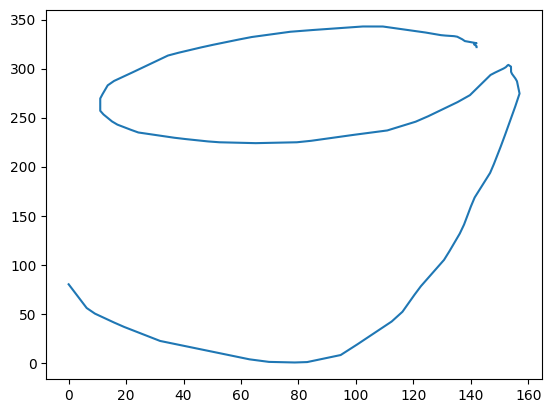

[115.         115.30487805 115.6097561  115.91463415 115.7804878
 115.47560976 115.17073171 115.13414634 115.43902439 115.74390244
 115.95121951 115.64634146 115.34146341 115.03658537 115.53658537
 116.14634146 116.75609756 116.63414634 116.02439024 115.41463415
 114.90243902 114.59756098 114.29268293 113.93902439 112.41463415
 110.8902439  109.36585366 106.68292683 103.63414634 100.58536585
  96.80487805  92.23170732  87.65853659  83.14634146  78.87804878
  74.6097561   70.34146341  66.63414634  62.97560976  59.31707317
  55.85365854  52.5         49.14634146  46.01219512  43.26829268
  40.52439024  37.82926829  35.69512195  33.56097561  31.42682927
  29.53658537  27.70731707  25.87804878  24.36585366  23.14634146
  21.92682927  20.85365854  20.24390244  19.63414634  19.02439024
  18.12195122  17.20731707  16.29268293  15.58536585  14.97560976
  14.36585366  13.87804878  13.57317073  13.26829268  12.92682927
  12.31707317  11.70731707  11.09756098  10.48780488   9.87804878
   9.268292

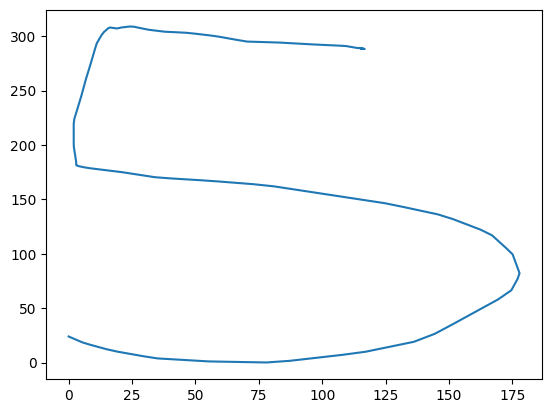

[152.         152.         152.         152.         151.7804878
 151.47560976 151.17073171 151.         151.         151.
 150.95121951 150.64634146 150.34146341 150.03658537 149.19512195
 148.2804878  147.36585366 146.26829268 145.04878049 143.82926829
 142.31707317 140.18292683 138.04878049 135.8902439  133.14634146
 130.40243902 127.65853659 123.98780488 120.02439024 116.06097561
 111.80487805 107.23170732 102.65853659  98.14634146  93.87804878
  89.6097561   85.34146341  81.07317073  76.80487805  72.53658537
  68.46341463  64.5         60.53658537  56.68292683  53.02439024
  49.36585366  45.7804878   43.03658537  40.29268293  37.54878049
  35.04878049  32.6097561   30.17073171  28.04878049  26.2195122
  24.3902439   22.70731707  21.48780488  20.26829268  19.04878049
  18.12195122  17.20731707  16.29268293  15.79268293  15.48780488
  15.18292683  14.87804878  14.57317073  14.26829268  13.96341463
  13.65853659  13.35365854  13.04878049  11.97560976  10.75609756
   9.53658537   8.82

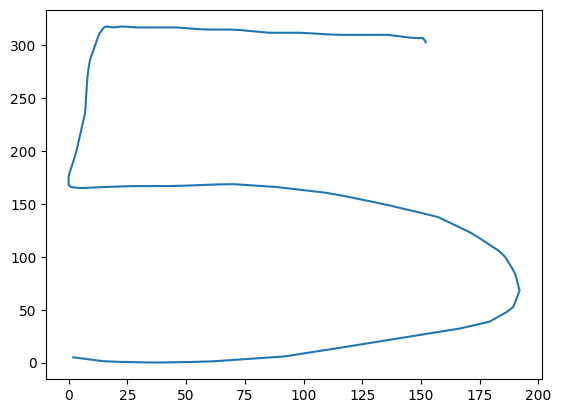

[170.         169.69512195 169.3902439  169.08536585 168.7804878
 168.47560976 168.17073171 168.         168.         168.
 167.95121951 167.64634146 167.34146341 167.03658537 166.46341463
 165.85365854 165.24390244 164.26829268 163.04878049 161.82926829
 160.2195122  157.7804878  155.34146341 152.85365854 149.19512195
 145.53658537 141.87804878 137.52439024 132.95121951 128.37804878
 123.80487805 119.23170732 114.65853659 110.08536585 105.51219512
 100.93902439  96.36585366  92.07317073  87.80487805  83.53658537
  79.85365854  76.5         73.14634146  69.68292683  66.02439024
  62.36585366  58.7804878   56.03658537  53.29268293  50.54878049
  48.29268293  46.15853659  44.02439024  42.04878049  40.2195122
  38.3902439   36.70731707  35.48780488  34.26829268  33.04878049
  32.41463415  31.80487805  31.19512195  30.79268293  30.48780488
  30.18292683  30.          30.          30.          30.03658537
  30.34146341  30.64634146  30.95121951  31.          31.
  31.          31.17073171  

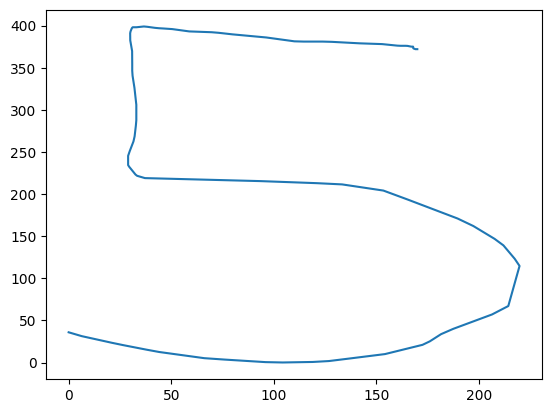

[1.23000000e+02 1.22695122e+02 1.22390244e+02 1.22085366e+02
 1.21560976e+02 1.20951220e+02 1.20341463e+02 1.19865854e+02
 1.19560976e+02 1.19256098e+02 1.18951220e+02 1.18646341e+02
 1.18341463e+02 1.18036585e+02 1.17195122e+02 1.16280488e+02
 1.15365854e+02 1.14634146e+02 1.14024390e+02 1.13414634e+02
 1.12707317e+02 1.11792683e+02 1.10878049e+02 1.09963415e+02
 1.09048780e+02 1.08134146e+02 1.07219512e+02 1.05609756e+02
 1.03780488e+02 1.01951220e+02 9.99756098e+01 9.78414634e+01
 9.57073171e+01 9.28414634e+01 8.70487805e+01 8.12560976e+01
 7.54634146e+01 7.16341463e+01 6.79756098e+01 6.43170732e+01
 6.10487805e+01 5.80000000e+01 5.49512195e+01 5.17926829e+01
 4.84390244e+01 4.50853659e+01 4.17317073e+01 3.83780488e+01
 3.50243902e+01 3.16707317e+01 2.85609756e+01 2.55121951e+01
 2.24634146e+01 1.97317073e+01 1.72926829e+01 1.48536585e+01
 1.24878049e+01 1.03536585e+01 8.21951220e+00 6.08536585e+00
 4.82926829e+00 3.60975610e+00 2.39024390e+00 1.79268293e+00
 1.48780488e+00 1.182926

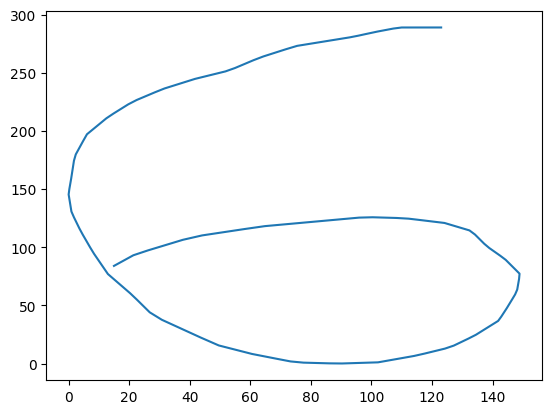

[ 73.          73.31097561  73.62195122  73.93292683  74.24390244
  74.55487805  74.86585366  74.82317073  74.51219512  74.20121951
  74.          74.          74.          73.91463415  73.29268293
  72.67073171  72.04878049  71.1402439   70.20731707  69.27439024
  68.12195122  66.87804878  65.63414634  64.08536585  62.2195122
  60.35365854  58.31707317  55.82926829  53.34146341  50.85365854
  48.36585366  45.87804878  43.3902439   40.90243902  38.41463415
  35.92682927  33.24390244  30.44512195  27.64634146  24.33536585
  20.29268293  16.25        12.63414634  10.76829268   8.90243902
   7.03658537   5.47560976   3.92073171   2.36585366   1.52439024
   0.90243902   0.2804878    0.17073171   0.48170732   0.79268293
   1.41463415   2.65853659   3.90243902   5.18292683   6.73780488
   8.29268293   9.84756098  12.24390244  14.73170732  17.2195122
  20.56097561  24.29268293  28.02439024  32.04878049  36.40243902
  40.75609756  45.1097561   49.46341463  53.81707317  58.14634146
  61.8780487

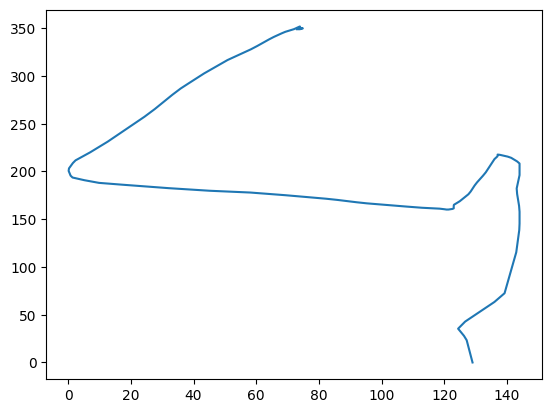

[2.00000000e+00 2.00000000e+00 2.00000000e+00 2.00000000e+00
 1.75609756e+00 1.44512195e+00 1.13414634e+00 8.23170732e-01
 5.12195122e-01 2.01219512e-01 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.86585366e-01 5.97560976e-01 9.08536585e-01
 1.21951220e+00 1.53048780e+00 1.84146341e+00 2.60975610e+00
 3.85365854e+00 5.09756098e+00 6.34146341e+00 7.58536585e+00
 8.82926829e+00 1.01280488e+01 1.23048780e+01 1.44817073e+01
 1.66585366e+01 1.88353659e+01 2.10121951e+01 2.31890244e+01
 2.61463415e+01 2.95670732e+01 3.29878049e+01 3.64085366e+01
 3.98292683e+01 4.32500000e+01 4.69146341e+01 5.15792683e+01
 5.62439024e+01 6.09085366e+01 6.52682927e+01 6.96219512e+01
 7.39756098e+01 7.85670732e+01 8.32317073e+01 8.78963415e+01
 9.25609756e+01 9.72256098e+01 1.01890244e+02 1.06554878e+02
 1.11219512e+02 1.15884146e+02 1.20548780e+02 1.25213415e+02
 1.29878049e+02 1.34542683e+02 1.39207317e+02 1.43871951e+02
 1.48536585e+02 1.538414

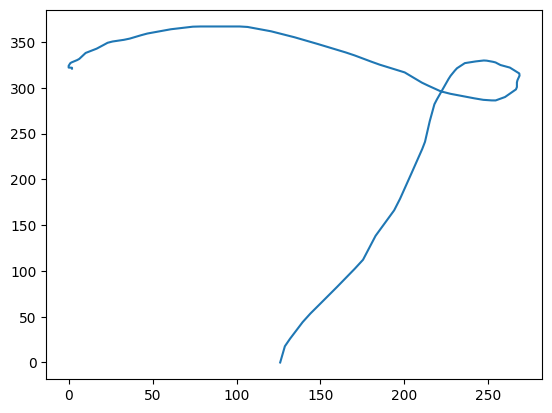

[119.         119.         119.         119.         119.
 119.         119.         119.         119.         119.
 118.8902439  118.57926829 118.26829268 117.91463415 117.29268293
 116.67073171 116.04878049 113.99390244 111.81707317 109.6402439
 106.80487805 103.69512195 100.58536585  96.86585366  92.51219512
  88.15853659  83.80487805  79.45121951  75.09756098  70.70731707
  65.73170732  60.75609756  55.7804878   52.11585366  48.69512195
  45.27439024  41.85365854  38.43292683  35.01219512  32.23170732
  30.36585366  28.5         26.81707317  25.88414634  24.95121951
  24.01829268  24.30487805  24.61585366  24.92682927  26.42682927
  28.29268293  30.15853659  32.53658537  35.33536585  38.13414634
  41.1402439   44.56097561  47.98170732  51.47560976  55.51829268
  59.56097561  63.60365854  72.69512195  82.33536585  91.97560976
  98.20121951 102.86585366 107.5304878  114.24390244 123.26219512
 132.2804878  139.95121951 143.68292683 147.41463415 151.12195122
 154.23170732 157.34146341 

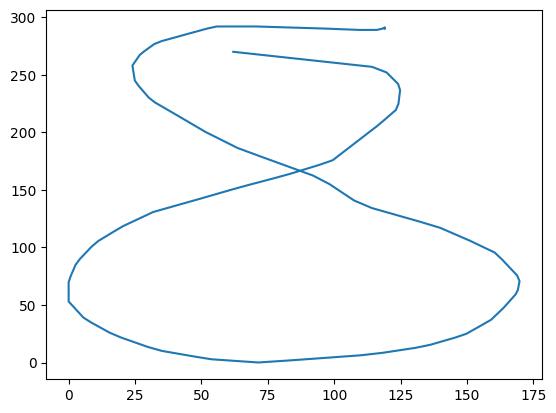

[1.25000000e+02 1.25000000e+02 1.25000000e+02 1.25000000e+02
 1.24512195e+02 1.23890244e+02 1.23268293e+02 1.23000000e+02
 1.23000000e+02 1.23000000e+02 1.22890244e+02 1.22579268e+02
 1.22268293e+02 1.21914634e+02 1.21292683e+02 1.20670732e+02
 1.20048780e+02 1.18567073e+02 1.17012195e+02 1.15457317e+02
 1.10170732e+02 1.03329268e+02 9.64878049e+01 8.82743902e+01
 7.86341463e+01 6.89939024e+01 6.08902439e+01 5.68475610e+01
 5.28048780e+01 4.87987805e+01 4.53780488e+01 4.19573171e+01
 3.85365854e+01 3.59024390e+01 3.34146341e+01 3.09268293e+01
 2.90243902e+01 2.74695122e+01 2.59146341e+01 2.52560976e+01
 2.58780488e+01 2.65000000e+01 2.74878049e+01 2.99756098e+01
 3.24634146e+01 3.49512195e+01 3.83536585e+01 4.17743902e+01
 4.51951220e+01 4.98048780e+01 5.47804878e+01 5.97560976e+01
 6.50731707e+01 7.06707317e+01 7.62682927e+01 8.18658537e+01
 8.74634146e+01 9.30609756e+01 9.86951220e+01 1.04603659e+02
 1.10512195e+02 1.16420732e+02 1.22048780e+02 1.27646341e+02
 1.33243902e+02 1.384146

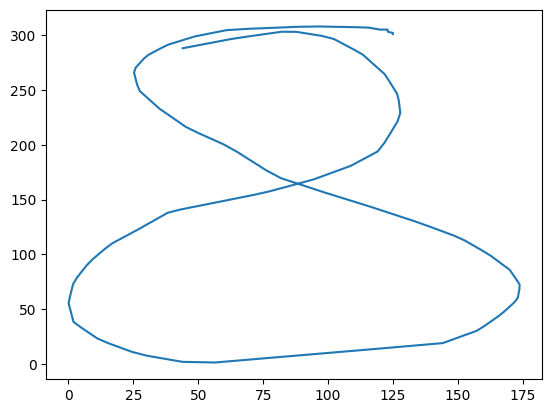

[ 59.          58.68902439  58.37804878  58.06707317  58.
  58.          58.          57.82317073  57.51219512  57.20121951
  56.8902439   56.57926829  56.26829268  55.95731707  55.64634146
  55.33536585  55.02439024  55.          55.          55.
  55.43902439  56.06097561  56.68292683  57.15243902  57.46341463
  57.77439024  58.34146341  59.58536585  60.82926829  62.09146341
  63.64634146  65.20121951  66.75609756  68.57317073  70.43902439
  72.30487805  76.31707317  81.60365854  86.8902439   91.15243902
  93.95121951  96.75        99.6097561  102.7195122  105.82926829
 108.93902439 118.14634146 127.47560976 136.80487805 141.37804878
 144.48780488 147.59756098 150.36585366 152.85365854 155.34146341
 158.03658537 161.14634146 164.25609756 167.1097561  168.04268293
 168.97560976 169.90853659 170.84146341 171.77439024 172.70731707
 172.57317073 171.95121951 171.32926829 170.56097561 169.62804878
 168.69512195 167.52439024 165.65853659 163.79268293 161.91463415
 159.73780488 157.56097561

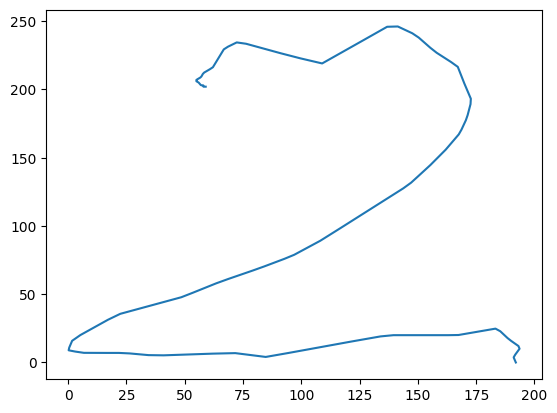

[145.         144.68902439 144.37804878 144.06707317 144.
 144.         144.         143.4695122  142.53658537 141.60365854
 140.45121951 138.89634146 137.34146341 135.74390244 133.87804878
 132.01219512 130.14634146 126.84756098 123.42682927 120.00609756
 115.92682927 111.57317073 107.2195122  102.71341463  98.04878049
  93.38414634  88.63414634  83.65853659  78.68292683  73.74390244
  69.3902439   65.03658537  60.68292683  56.85365854  53.12195122
  49.3902439   46.04878049  42.93902439  39.82926829  36.97560976
  34.48780488  32.          29.45121951  26.65243902  23.85365854
  21.05487805  19.47560976  17.92073171  16.36585366  16.23780488
  16.54878049  16.8597561   17.          17.          17.
  17.10365854  17.41463415  17.72560976  18.          18.
  18.          18.          18.2804878   18.59146341  18.90243902
  18.78658537  18.47560976  18.16463415  17.56097561  16.62804878
  15.69512195  14.92073171  14.6097561   14.29878049  13.98780488
  13.67682927  13.36585366  13.054

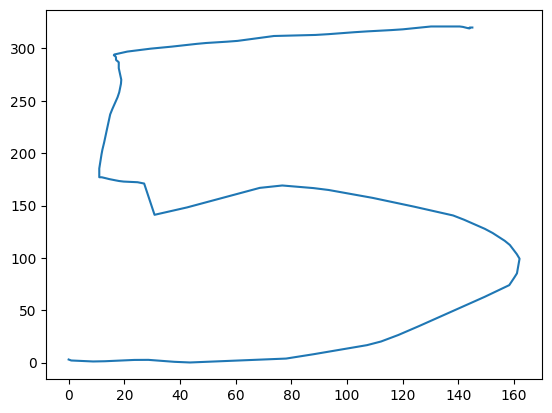

[109.         109.         109.         109.         108.73170732
 108.41463415 108.09756098 108.2195122  108.53658537 108.85365854
 109.         109.         109.         108.75609756 108.12195122
 107.48780488 106.7804878  105.82926829 104.87804878 103.56097561
  97.85365854  92.14634146  86.43902439  82.48780488  78.68292683
  74.87804878  71.07317073  67.26829268  63.46341463  59.85365854
  56.36585366  52.87804878  49.53658537  46.36585366  43.19512195
  40.31707317  38.09756098  35.87804878  33.80487805  32.53658537
  31.26829268  30.          29.36585366  28.73170732  28.09756098
  27.73170732  27.41463415  27.09756098  27.43902439  28.07317073
  28.70731707  30.02439024  31.92682927  33.82926829  36.34146341
  39.82926829  43.31707317  47.31707317  53.02439024  58.73170732
  64.46341463  70.48780488  76.51219512  82.53658537  88.85365854
  95.19512195 101.53658537 108.12195122 114.7804878  121.43902439
 127.12195122 132.19512195 137.26829268 141.75609756 145.56097561
 149.36585

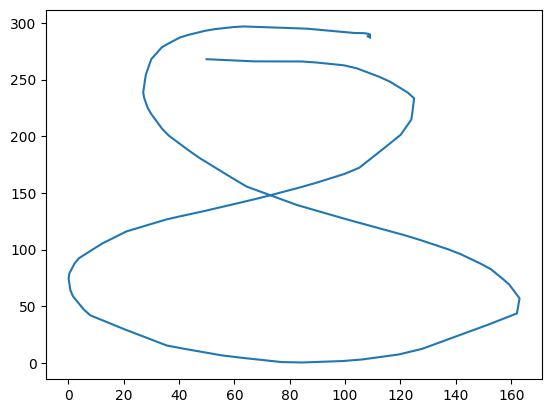

[1.29000000e+02 1.29317073e+02 1.29634146e+02 1.29951220e+02
 1.29731707e+02 1.29414634e+02 1.29097561e+02 1.29219512e+02
 1.29536585e+02 1.29853659e+02 1.29829268e+02 1.29512195e+02
 1.29195122e+02 1.28878049e+02 1.28560976e+02 1.28243902e+02
 1.28073171e+02 1.28390244e+02 1.28707317e+02 1.28951220e+02
 1.28317073e+02 1.27682927e+02 1.27048780e+02 1.27000000e+02
 1.27000000e+02 1.27000000e+02 1.26024390e+02 1.24756098e+02
 1.23487805e+02 1.22219512e+02 1.20951220e+02 1.19682927e+02
 1.17536585e+02 1.14365854e+02 1.11195122e+02 1.08024390e+02
 1.04853659e+02 1.01682927e+02 9.83170732e+01 9.38780488e+01
 8.94390244e+01 8.50000000e+01 8.08780488e+01 7.67560976e+01
 7.26341463e+01 6.79756098e+01 6.32195122e+01 5.84634146e+01
 5.37073171e+01 4.89512195e+01 4.41951220e+01 3.73902439e+01
 2.88292683e+01 2.02682927e+01 1.39024390e+01 1.10487805e+01
 8.19512195e+00 5.56097561e+00 3.65853659e+00 1.75609756e+00
 4.87804878e-02 6.82926829e-01 1.31707317e+00 1.95121951e+00
 3.75609756e+00 5.658536

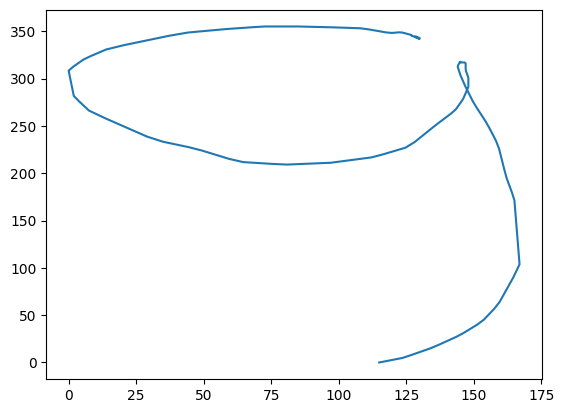

[124.         124.32317073 124.64634146 124.9695122  125.
 125.         125.         125.         125.         125.
 125.         125.         125.         125.         125.
 125.         125.34146341 125.98780488 126.63414634 126.8597561
 126.53658537 126.21341463 126.         126.         126.
 126.15853659 126.80487805 127.45121951 128.14634146 129.11585366
 130.08536585 131.05487805 132.02439024 132.99390244 133.96341463
 134.31097561 134.63414634 134.95731707 135.56097561 136.20731707
 136.85365854 137.25       137.57317073 137.89634146 138.65853659
 139.62804878 140.59756098 141.18902439 141.51219512 141.83536585
 142.31707317 142.96341463 143.6097561  144.         144.
 144.         144.         144.         144.         144.
 144.         144.         144.         144.         144.
 143.98780488 143.34146341 142.69512195 142.04878049 141.40243902
 140.75609756 140.1097561  138.3902439  136.45121951 134.51219512
 131.8597561  128.95121951 126.04268293 121.8902439  117.04268293
 

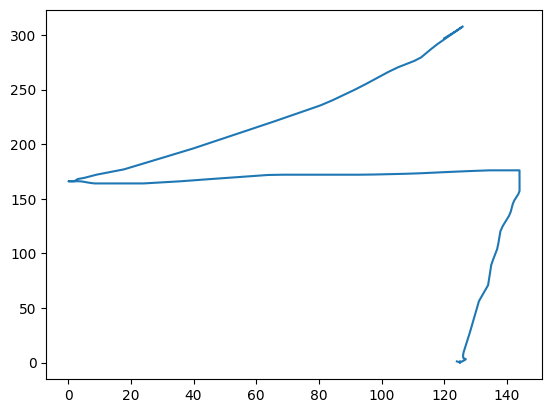

[9.40000000e+01 9.36768293e+01 9.33536585e+01 9.30304878e+01
 9.30000000e+01 9.30000000e+01 9.30000000e+01 9.24756098e+01
 9.18292683e+01 9.11829268e+01 9.05365854e+01 8.98902439e+01
 8.92439024e+01 8.79939024e+01 8.63780488e+01 8.47621951e+01
 8.17804878e+01 7.75792683e+01 7.33780488e+01 6.90365854e+01
 6.45121951e+01 5.99878049e+01 5.51341463e+01 4.96402439e+01
 4.41463415e+01 3.88902439e+01 3.43658537e+01 2.98414634e+01
 2.53658537e+01 2.11646341e+01 1.69634146e+01 1.28353659e+01
 9.92682927e+00 7.01829268e+00 4.10975610e+00 2.75609756e+00
 1.46341463e+00 1.70731707e-01 2.80487805e-01 6.03658537e-01
 9.26829268e-01 1.75000000e+00 2.71951220e+00 3.68902439e+00
 5.09756098e+00 6.71341463e+00 8.32926829e+00 1.05121951e+01
 1.30975610e+01 1.56829268e+01 1.89024390e+01 2.27804878e+01
 2.66585366e+01 3.09207317e+01 3.57682927e+01 4.06158537e+01
 4.56585366e+01 5.11524390e+01 5.66463415e+01 6.23414634e+01
 6.88048780e+01 7.52682927e+01 8.17317073e+01 8.81951220e+01
 9.46585366e+01 1.011280

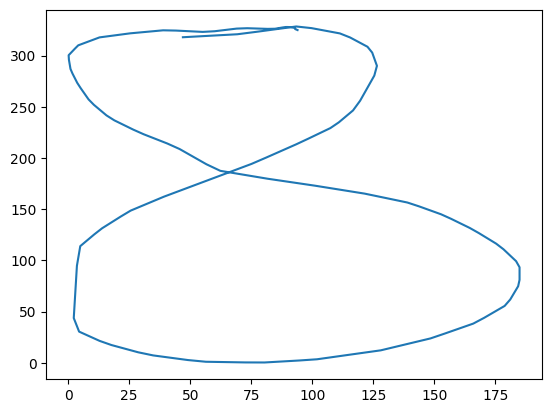

[105.         104.67682927 104.35365854 104.0304878  104.29268293
 104.61585366 104.93902439 104.73780488 104.41463415 104.09146341
 103.76829268 103.44512195 103.12195122 103.         103.
 103.         102.82926829 102.50609756 102.18292683 101.8597561
 101.53658537 101.21341463 100.67073171  99.70121951  98.73170732
  97.52439024  95.58536585  93.64634146  91.51219512  88.2804878
  85.04878049  81.72560976  76.87804878  72.0304878   67.18292683
  60.7804878   54.31707317  47.85365854  43.07317073  38.54878049
  34.02439024  30.25        26.69512195  23.1402439   20.24390244
  17.65853659  15.07317073  13.43292683  12.46341463  11.49390244
  11.63414634  12.92682927  14.2195122   16.02439024  18.6097561
  21.19512195  24.17073171  28.04878049  31.92682927  35.93902439
  40.46341463  44.98780488  49.62195122  55.11585366  60.6097561
  66.1097561   71.92682927  77.74390244  83.56097561  90.27439024
  97.06097561 103.84756098 111.43902439 119.19512195 126.95121951
 133.75609756 140.2195

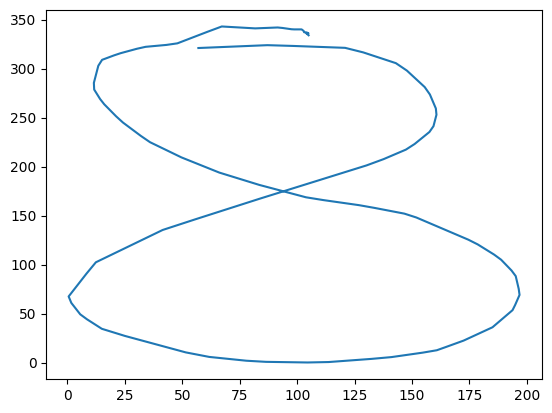

[159.         159.32317073 159.64634146 159.9695122  159.70731707
 159.38414634 159.06097561 158.73780488 158.41463415 158.09146341
 158.         158.         158.         157.79878049 157.47560976
 157.15243902 153.92682927 148.1097561  142.29268293 137.31707317
 133.43902439 129.56097561 125.57317073 121.37195122 117.17073171
 112.8902439  108.36585366 103.84146341  99.2195122   94.04878049
  88.87804878  83.70731707  78.53658537  73.36585366  68.19512195
  62.71341463  57.2195122   51.72560976  46.79268293  41.94512195
  37.09756098  32.5         27.97560976  23.45121951  19.80487805
  16.57317073  13.34146341  10.67682927   8.41463415   6.15243902
   4.36585366   3.07317073   1.7804878    0.87195122   0.54878049
   0.22560976   1.07317073   4.62804878   8.18292683  11.67073171
  14.90243902  18.13414634  22.06097561  31.43292683  40.80487805
  50.11585366  56.25609756  62.39634146  68.53658537  79.75609756
  91.3902439  103.02439024 109.56097561 115.05487805 120.54878049
 125.32926

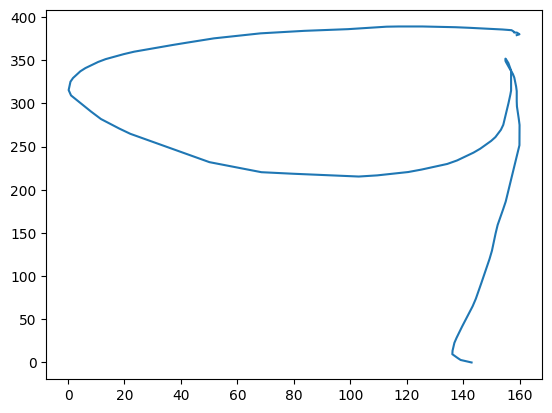

[ 15.          14.67682927  14.35365854  14.0304878   14.29268293
  14.61585366  14.93902439  14.73780488  14.41463415  14.09146341
  13.76829268  13.44512195  13.12195122  13.          13.
  13.          13.          13.          13.          13.
  13.          13.          12.7804878   12.13414634  11.48780488
  11.          11.          11.          10.85365854   9.88414634
   8.91463415   7.92682927   6.63414634   5.34146341   4.04878049
   3.68902439   3.36585366   3.04268293   3.           3.
   3.           2.25         1.2804878    0.31097561   0.
   0.           0.           0.           0.           0.
   0.79268293   2.40853659   4.02439024   5.6402439    7.25609756
   8.87195122  10.68292683  12.94512195  15.20731707  17.40243902
  19.34146341  21.2804878   23.36585366  26.59756098  29.82926829
  33.07317073  36.95121951  40.82926829  44.70731707  47.68902439
  50.59756098  53.50609756  56.95121951  60.50609756  64.06097561
  67.85365854  71.73170732  75.6097561   79.073170

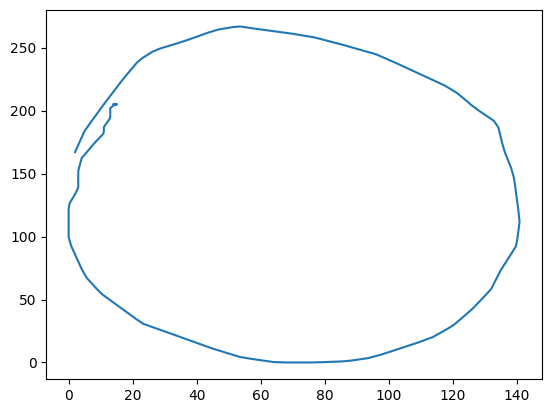

[4.30000000e+01 4.30000000e+01 4.30000000e+01 4.30000000e+01
 4.26829268e+01 4.23536585e+01 4.20243902e+01 4.20000000e+01
 4.20000000e+01 4.20000000e+01 4.20000000e+01 4.20000000e+01
 4.20000000e+01 4.20000000e+01 4.20000000e+01 4.20000000e+01
 4.20000000e+01 4.20000000e+01 4.20000000e+01 4.22560976e+01
 4.25853659e+01 4.29146341e+01 4.37317073e+01 4.47195122e+01
 4.57073171e+01 4.69268293e+01 4.82439024e+01 4.95609756e+01
 5.15365854e+01 5.38414634e+01 5.61463415e+01 5.88658537e+01
 6.18292683e+01 6.47926829e+01 6.79512195e+01 7.12439024e+01
 7.45365854e+01 7.80121951e+01 8.16341463e+01 8.52560976e+01
 8.93902439e+01 9.40000000e+01 9.86097561e+01 1.03060976e+02
 1.07341463e+02 1.11621951e+02 1.16048780e+02 1.20658537e+02
 1.25268293e+02 1.29609756e+02 1.33560976e+02 1.37512195e+02
 1.41951220e+02 1.47219512e+02 1.52487805e+02 1.56219512e+02
 1.56878049e+02 1.57536585e+02 1.58000000e+02 1.58000000e+02
 1.58000000e+02 1.57658537e+02 1.56341463e+02 1.55024390e+02
 1.53487805e+02 1.511829

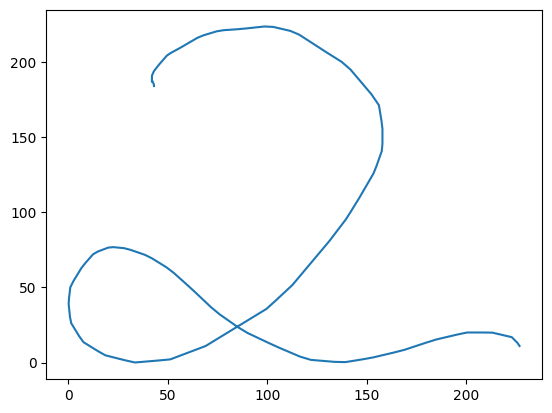

[9.70000000e+01 9.73292683e+01 9.76585366e+01 9.79878049e+01
 9.73658537e+01 9.67073171e+01 9.60487805e+01 9.53902439e+01
 9.47317073e+01 9.40731707e+01 9.25365854e+01 9.08902439e+01
 8.92439024e+01 8.70365854e+01 8.47317073e+01 8.24268293e+01
 7.93170732e+01 7.60243902e+01 7.27317073e+01 6.96951220e+01
 6.67317073e+01 6.37682927e+01 6.03170732e+01 5.66951220e+01
 5.30731707e+01 4.94512195e+01 4.58292683e+01 4.22073171e+01
 3.85853659e+01 3.49634146e+01 3.13414634e+01 2.81341463e+01
 2.51707317e+01 2.22073171e+01 1.94390244e+01 1.68048780e+01
 1.41707317e+01 1.20853659e+01 1.04390244e+01 8.79268293e+00
 7.14634146e+00 5.50000000e+00 3.85365854e+00 2.52439024e+00
 1.53658537e+00 5.48780488e-01 1.46341463e-01 4.75609756e-01
 8.04878049e-01 1.13414634e+00 1.46341463e+00 1.79268293e+00
 2.48780488e+00 3.80487805e+00 5.12195122e+00 7.75609756e+00
 1.30243902e+01 1.82926829e+01 2.32682927e+01 2.75487805e+01
 3.18292683e+01 3.63658537e+01 4.16341463e+01 4.69024390e+01
 5.33414634e+01 6.387804

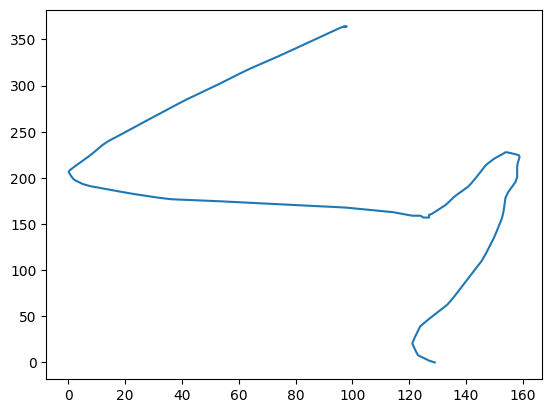

[1.49000000e+02 1.49000000e+02 1.49000000e+02 1.49000000e+02
 1.48682927e+02 1.48353659e+02 1.48024390e+02 1.47390244e+02
 1.46731707e+02 1.46073171e+02 1.45414634e+02 1.44756098e+02
 1.44097561e+02 1.42036585e+02 1.39731707e+02 1.37426829e+02
 1.34048780e+02 1.30426829e+02 1.26804878e+02 1.22670732e+02
 1.18390244e+02 1.14109756e+02 1.09585366e+02 1.04975610e+02
 1.00365854e+02 9.59878049e+01 9.17073171e+01 8.74268293e+01
 8.33658537e+01 7.94146341e+01 7.54634146e+01 7.15121951e+01
 6.75609756e+01 6.36097561e+01 6.00487805e+01 5.67560976e+01
 5.34634146e+01 5.03536585e+01 4.73902439e+01 4.44268293e+01
 4.18048780e+01 3.95000000e+01 3.71951220e+01 3.50487805e+01
 3.30731707e+01 3.10975610e+01 2.94146341e+01 2.80975610e+01
 2.67804878e+01 2.54634146e+01 2.41463415e+01 2.28292683e+01
 2.18780488e+01 2.15487805e+01 2.12195122e+01 2.07804878e+01
 2.01219512e+01 1.94634146e+01 1.88048780e+01 1.81463415e+01
 1.74878049e+01 1.68292683e+01 1.61707317e+01 1.55121951e+01
 1.49268293e+01 1.459756

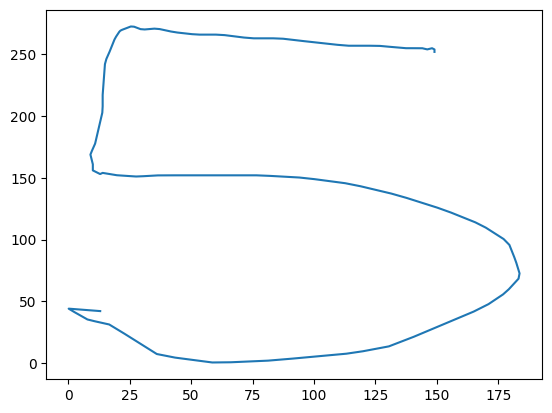

[ 3.70000000e+01  3.66707317e+01  3.63414634e+01  3.60121951e+01
  3.60000000e+01  3.60000000e+01  3.60000000e+01  3.56951220e+01
  3.53658537e+01  3.50365854e+01  3.50000000e+01  3.50000000e+01
  3.50000000e+01  3.47195122e+01  3.43902439e+01  3.40609756e+01
  3.37317073e+01  3.34024390e+01  3.30731707e+01  3.27439024e+01
  3.24146341e+01  3.20853659e+01  3.17560976e+01  3.14268293e+01
  3.10975610e+01  3.07682927e+01  3.04390244e+01  3.01097561e+01
  3.00000000e+01  3.00000000e+01  3.00000000e+01  3.02073171e+01
  3.05365854e+01  3.08658537e+01  3.13902439e+01  3.20487805e+01
  3.27073171e+01  3.33658537e+01  3.40243902e+01  3.46829268e+01
  3.55121951e+01  3.65000000e+01  3.74878049e+01  3.84756098e+01
  3.94634146e+01  4.04512195e+01  4.15853659e+01  4.29024390e+01
  4.42195122e+01  4.55365854e+01  4.68536585e+01  4.81707317e+01
  4.96097561e+01  5.12560976e+01  5.29024390e+01  5.46585366e+01
  5.66341463e+01  5.86097561e+01  6.06829268e+01  6.29878049e+01
  6.52926829e+01  6.75975

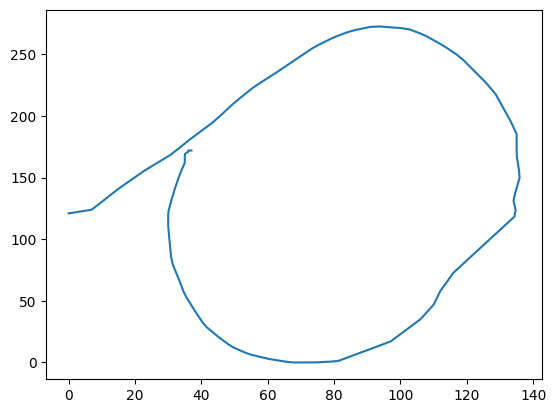

[ 4.90000000e+01  4.90000000e+01  4.90000000e+01  4.90000000e+01
  4.86829268e+01  4.83536585e+01  4.80243902e+01  4.76951220e+01
  4.73658537e+01  4.70365854e+01  4.67073171e+01  4.63780488e+01
  4.60487805e+01  4.60000000e+01  4.60000000e+01  4.60000000e+01
  4.62682927e+01  4.65975610e+01  4.69268293e+01  4.70000000e+01
  4.70000000e+01  4.70000000e+01  4.74878049e+01  4.81463415e+01
  4.88048780e+01  4.96951220e+01  5.06829268e+01  5.16707317e+01
  5.35365854e+01  5.58414634e+01  5.81463415e+01  6.06585366e+01
  6.32926829e+01  6.59268293e+01  6.87560976e+01  7.17195122e+01
  7.46829268e+01  7.85609756e+01  8.31707317e+01  8.77804878e+01
  9.23902439e+01  9.70000000e+01  1.01609756e+02  1.06219512e+02
  1.10829268e+02  1.15439024e+02  1.20048780e+02  1.24658537e+02
  1.29268293e+02  1.33743902e+02  1.38024390e+02  1.42304878e+02
  1.46463415e+02  1.50414634e+02  1.54365854e+02  1.58097561e+02
  1.61390244e+02  1.64682927e+02  1.67682927e+02  1.69987805e+02
  1.72292683e+02  1.74341

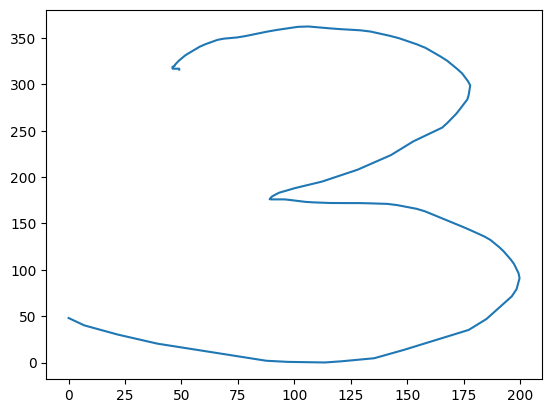

[ 64.          64.          64.          63.99390244  63.65853659
  63.32317073  63.          63.          63.          62.98170732
  62.64634146  62.31097561  62.04878049  62.7195122   63.3902439
  64.          64.          64.          64.1097561   65.11585366
  66.12195122  67.17073171  68.51219512  69.85365854  71.24390244
  72.92073171  74.59756098  76.60365854  80.29268293  83.98170732
  87.79268293  92.15243902  96.51219512 100.93902439 105.63414634
 110.32926829 115.17073171 120.53658537 125.90243902 131.1097561
 135.80487805 140.5        145.19512195 149.8902439  154.58536585
 159.00609756 162.69512195 166.38414634 169.97560976 173.32926829
 176.68292683 179.62195122 181.63414634 183.64634146 185.32926829
 186.33536585 187.34146341 187.88414634 187.54878049 187.21341463
 186.3902439  184.71341463 183.03658537 181.23170732 179.2195122
 177.20731707 174.79268293 171.77439024 168.75609756 165.17682927
 160.81707317 156.45731707 152.24390244 148.2195122  144.19512195
 139.71341463

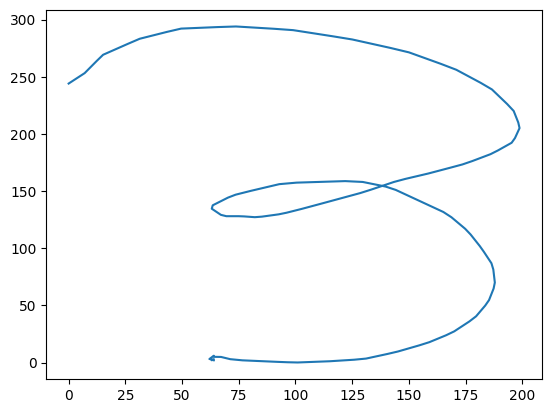

[1.19000000e+02 1.19000000e+02 1.19000000e+02 1.19000000e+02
 1.19000000e+02 1.19000000e+02 1.19024390e+02 1.19695122e+02
 1.20365854e+02 1.21000000e+02 1.21000000e+02 1.21000000e+02
 1.21000000e+02 1.21000000e+02 1.21000000e+02 1.21060976e+02
 1.21731707e+02 1.22402439e+02 1.23000000e+02 1.23000000e+02
 1.23000000e+02 1.23128049e+02 1.24134146e+02 1.25140244e+02
 1.26000000e+02 1.26000000e+02 1.26000000e+02 1.26054878e+02
 1.26390244e+02 1.26725610e+02 1.27000000e+02 1.27000000e+02
 1.27000000e+02 1.27000000e+02 1.27000000e+02 1.27000000e+02
 1.26926829e+02 1.26591463e+02 1.26256098e+02 1.26158537e+02
 1.26829268e+02 1.27500000e+02 1.28085366e+02 1.28420732e+02
 1.28756098e+02 1.29091463e+02 1.29426829e+02 1.29762195e+02
 1.30000000e+02 1.30000000e+02 1.30000000e+02 1.30000000e+02
 1.30000000e+02 1.30000000e+02 1.30109756e+02 1.30445122e+02
 1.30780488e+02 1.30884146e+02 1.30548780e+02 1.30213415e+02
 1.29634146e+02 1.28628049e+02 1.27621951e+02 1.26487805e+02
 1.25146341e+02 1.238048

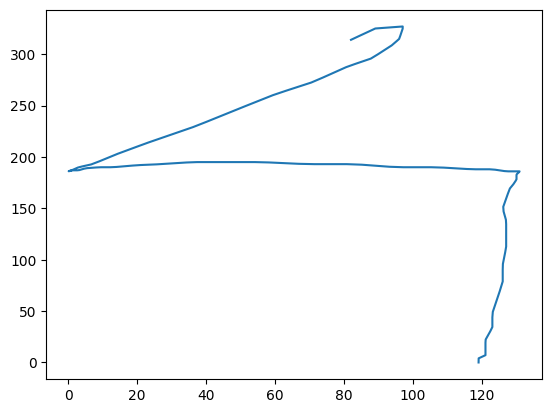

[ 77.          77.          77.          77.          77.
  77.          77.          77.          77.          77.
  77.          77.          76.97560976  76.6402439   76.30487805
  76.0304878   76.36585366  76.70121951  76.96341463  76.62804878
  76.29268293  76.04268293  76.37804878  76.71341463  77.
  77.          77.          77.          77.          77.
  77.          77.          77.          76.93292683  76.59756098
  76.26219512  75.92682927  75.59146341  75.25609756  74.76219512
  73.75609756  72.75        71.65853659  70.31707317  68.97560976
  67.54268293  65.86585366  64.18902439  62.2195122   59.53658537
  56.85365854  54.17073171  51.48780488  48.80487805  46.12195122
  43.43902439  40.75609756  38.07317073  35.3902439   32.70731707
  30.02439024  27.34146341  24.65853659  22.23170732  20.2195122
  18.20731707  15.92682927  13.24390244  10.56097561   8.01829268
   5.67073171   3.32317073   1.85365854   1.51829268   1.18292683
   0.84756098   0.51219512   0.17682927   0

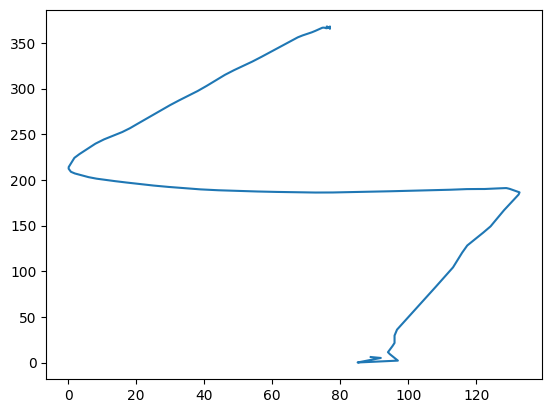

[134.         134.67073171 135.34146341 136.         136.
 136.         136.01219512 136.34756098 136.68292683 136.98170732
 136.64634146 136.31097561 135.90243902 134.56097561 133.2195122
 131.60365854 127.24390244 122.88414634 118.15853659 110.44512195
 102.73170732  95.31707317  89.95121951  84.58536585  79.26829268
  74.23780488  69.20731707  64.17682927  59.14634146  54.11585366
  49.08536585  44.05487805  39.02439024  34.26219512  30.57317073
  26.88414634  22.90243902  17.87195122  12.84146341   9.
   9.           9.           9.42682927  11.10365854  12.7804878
  14.91463415  18.26829268  21.62195122  25.46341463  30.49390244
  35.52439024  40.9695122   47.34146341  53.71341463  60.19512195
  66.90243902  73.6097561   80.54878049  87.92682927  95.30487805
 102.56097561 109.60365854 116.64634146 123.68902439 130.73170732
 137.77439024 144.68292683 151.3902439  158.09756098 164.80487805
 171.51219512 178.2195122  184.19512195 189.22560976 194.25609756
 197.91463415 199.92682927 2

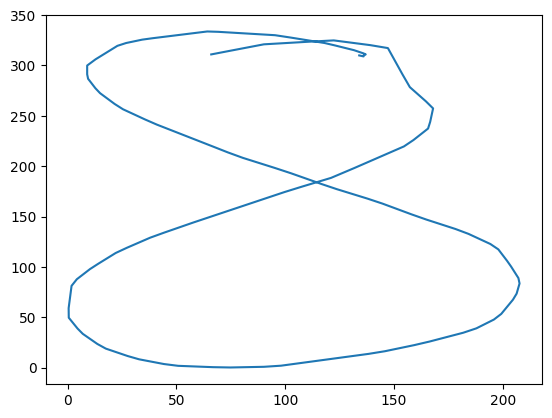

[124.         124.         124.         124.         124.
 124.         124.01219512 124.34756098 124.68292683 124.98170732
 124.64634146 124.31097561 124.         124.         124.
 123.93902439 123.26829268 122.59756098 121.8902439  120.88414634
 119.87804878 118.82926829 117.48780488 116.14634146 114.65853659
 112.31097561 109.96341463 107.34146341 103.31707317  99.29268293
  95.26829268  91.24390244  87.2195122   82.99390244  77.96341463
  72.93292683  67.97560976  63.2804878   58.58536585  53.81097561
  48.7804878   43.75        38.8902439   34.5304878   30.17073171
  25.99390244  22.30487805  18.61585366  15.31707317  12.9695122
  10.62195122   8.37804878   6.36585366   4.35365854   2.67073171
   1.66463415   0.65853659   0.           0.           0.
   0.36585366   1.37195122   2.37804878   3.76829268   5.7804878
   7.79268293  10.07317073  12.75609756  15.43902439  18.40243902
  21.75609756  25.1097561   29.04878049  33.74390244  38.43902439
  43.13414634  47.82926829  52.52439

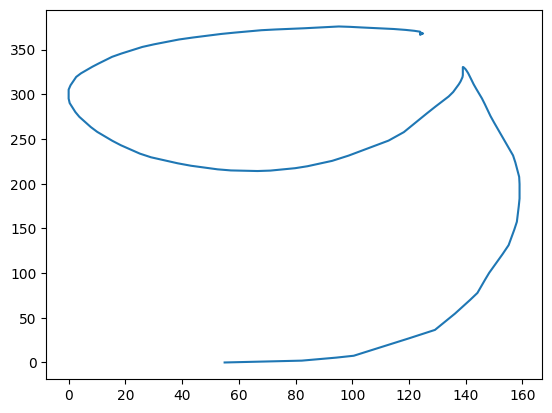

[2.00000000e+00 1.66463415e+00 1.32926829e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 9.87804878e-01 6.52439024e-01
 3.17073171e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.87804878e-02 7.19512195e-01 1.39024390e+00 2.06097561e+00
 2.73170732e+00 3.40243902e+00 4.14634146e+00 5.48780488e+00
 6.82926829e+00 8.21341463e+00 9.89024390e+00 1.15670732e+01
 1.33902439e+01 1.60731707e+01 1.87560976e+01 2.14390244e+01
 2.41219512e+01 2.68048780e+01 2.96097561e+01 3.29634146e+01
 3.63170732e+01 3.97378049e+01 4.34268293e+01 4.71158537e+01
 5.08780488e+01 5.49024390e+01 5.89268293e+01 6.29512195e+01
 6.69756098e+01 7.10000000e+01 7.51097561e+01 7.94695122e+01
 8.38292683e+01 8.80975610e+01 9.21219512e+01 9.61463415e+01
 1.00170732e+02 1.04195122e+02 1.08219512e+02 1.12036585e+02
 1.15390244e+02 1.18743902e+02 1.21878049e+02 1.24560976e+02
 1.27243902e+02 1.29463415e+02 1.30804878e+02 1.32146341e+02
 1.33365854e+02 1.34371951e+02 1.35378049e+02 1.35743902e+02
 1.35073171e+02 1.344024

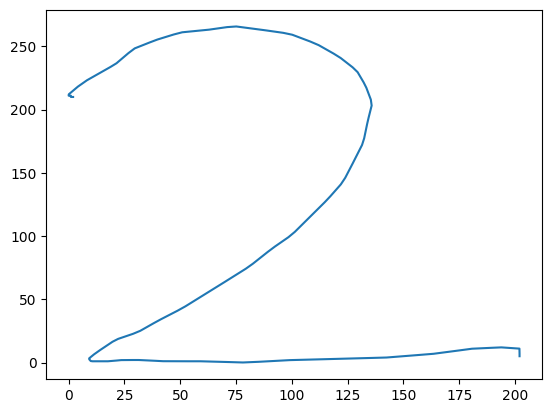

[151.         150.66463415 150.32926829 149.98780488 149.31707317
 148.64634146 147.97560976 147.30487805 146.63414634 145.96341463
 145.29268293 144.62195122 143.90243902 142.56097561 141.2195122
 139.84756098 138.17073171 136.49390244 134.70731707 132.02439024
 129.34146341 126.10365854 119.06097561 112.01829268 105.41463415
 101.3902439   97.36585366  93.34146341  89.31707317  85.29268293
  81.26829268  77.24390244  73.2195122   69.26219512  65.57317073
  61.88414634  57.97560976  53.2804878   48.58536585  43.9695122
  39.6097561   35.25        30.8902439   26.5304878   22.17073171
  17.99390244  14.30487805  10.61585366   7.31707317   4.9695122
   2.62195122   0.89634146   0.56097561   0.22560976   0.
   0.           0.           0.34756098   1.35365854   2.3597561
   4.82926829   9.8597561   14.8902439   19.2804878   22.63414634
  25.98780488  29.6097561   33.63414634  37.65853659  43.64634146
  52.36585366  61.08536585  69.07317073  76.11585366  83.15853659
  90.04878049  96.7560

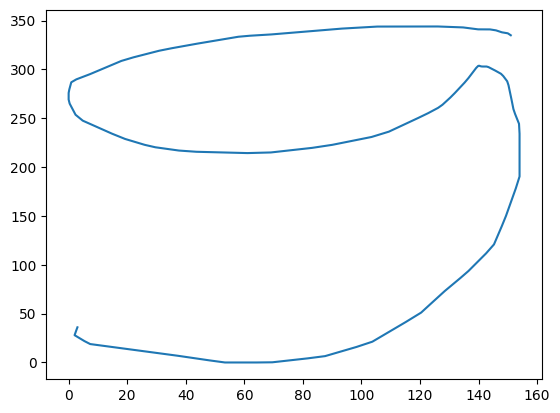

[2.70000000e+01 2.73414634e+01 2.76829268e+01 2.80487805e+01
 2.87317073e+01 2.94146341e+01 3.01951220e+01 3.15609756e+01
 3.29268293e+01 3.47317073e+01 3.81463415e+01 4.15609756e+01
 4.48780488e+01 4.79512195e+01 5.10243902e+01 5.44634146e+01
 5.85609756e+01 6.26585366e+01 6.64634146e+01 6.98780488e+01
 7.32926829e+01 7.67073171e+01 8.01219512e+01 8.35365854e+01
 8.81219512e+01 9.35853659e+01 9.90487805e+01 1.03195122e+02
 1.06609756e+02 1.10024390e+02 1.13926829e+02 1.18024390e+02
 1.22121951e+02 1.25146341e+02 1.27878049e+02 1.30609756e+02
 1.33341463e+02 1.36073171e+02 1.38804878e+02 1.39634146e+02
 1.40317073e+02 1.41000000e+02 1.41000000e+02 1.41000000e+02
 1.40804878e+02 1.38073171e+02 1.35341463e+02 1.31975610e+02
 1.24804878e+02 1.17634146e+02 1.10902439e+02 1.05780488e+02
 1.00658537e+02 9.38780488e+01 8.29512195e+01 7.20243902e+01
 6.32926829e+01 5.85121951e+01 5.37317073e+01 4.85121951e+01
 4.27073171e+01 3.69024390e+01 3.21219512e+01 2.83658537e+01
 2.46097561e+01 2.124390

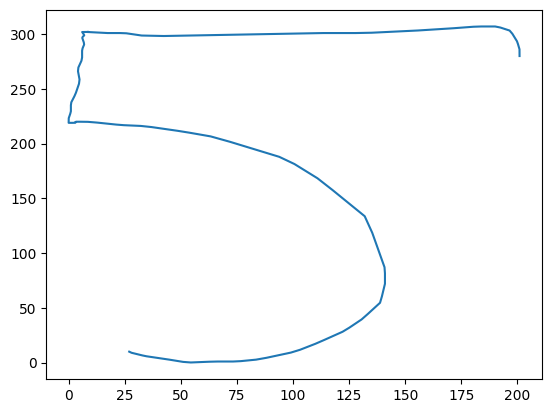

[9.00000000e+01 9.03414634e+01 9.06829268e+01 9.09756098e+01
 9.06341463e+01 9.02926829e+01 8.99512195e+01 8.96097561e+01
 8.92682927e+01 8.90731707e+01 8.94146341e+01 8.97560976e+01
 8.95121951e+01 8.78048780e+01 8.60975610e+01 8.42682927e+01
 8.22195122e+01 8.01707317e+01 7.75365854e+01 7.41219512e+01
 7.07073171e+01 6.69512195e+01 6.28536585e+01 5.87560976e+01
 5.44634146e+01 5.00243902e+01 4.55853659e+01 4.15853659e+01
 3.78292683e+01 3.40731707e+01 3.05609756e+01 2.71463415e+01
 2.37317073e+01 2.05853659e+01 1.75121951e+01 1.44390244e+01
 1.28292683e+01 1.14634146e+01 1.00975610e+01 1.00000000e+01
 1.00000000e+01 1.00000000e+01 1.17073171e+01 1.34146341e+01
 1.52439024e+01 1.86585366e+01 2.20731707e+01 2.55853659e+01
 2.96829268e+01 3.37804878e+01 3.81707317e+01 4.36341463e+01
 4.90975610e+01 5.46585366e+01 6.04634146e+01 6.62682927e+01
 7.21951220e+01 7.83414634e+01 8.44878049e+01 9.07804878e+01
 9.72682927e+01 1.03756098e+02 1.10243902e+02 1.16731707e+02
 1.23219512e+02 1.289268

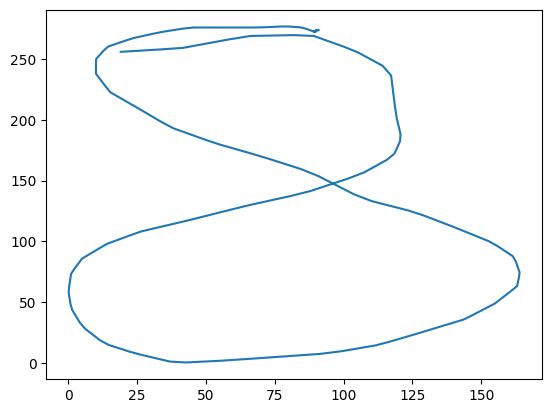

[130.         129.65853659 129.31707317 129.         129.
 129.         128.95121951 128.6097561  128.26829268 127.85365854
 127.17073171 126.48780488 125.80487805 125.12195122 124.43902439
 123.26829268 121.2195122  119.17073171 116.82926829 114.09756098
 111.36585366 108.29268293 104.87804878 101.46341463  97.85365854
  94.09756098  90.34146341  86.14634146  81.70731707  77.26829268
  73.07317073  68.97560976  64.87804878  60.7804878   56.68292683
  52.58536585  47.90243902  43.12195122  38.34146341  34.19512195
  30.09756098  26.          22.58536585  19.17073171  15.80487805
  13.07317073  10.34146341   7.70731707   5.65853659   3.6097561
   1.85365854   1.17073171   0.48780488   0.29268293   1.31707317
   2.34146341   3.97560976   6.70731707   9.43902439  12.46341463
  15.87804878  19.29268293  23.04878049  27.14634146  31.24390244
  35.53658537  39.97560976  44.41463415  49.51219512  54.97560976
  60.43902439  65.65853659  70.7804878   75.90243902  81.02439024
  86.14634146  91.2

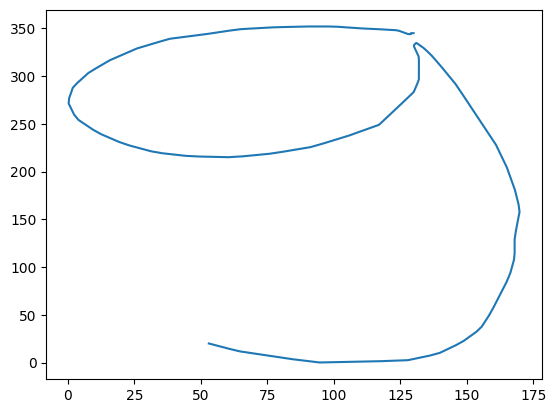

[124.         124.         124.         123.97560976 123.63414634
 123.29268293 122.95121951 122.6097561  122.26829268 122.
 122.         122.         121.90243902 121.56097561 121.2195122
 120.75609756 120.07317073 119.3902439  118.56097561 117.53658537
 116.51219512 115.31707317 113.95121951 112.58536585 111.02439024
 109.31707317 107.6097561  105.24390244 102.51219512  99.7804878
  96.31707317  92.56097561  88.80487805  85.31707317  81.90243902
  78.48780488  74.19512195  69.75609756  65.31707317  60.56097561
  55.7804878   51.          46.90243902  42.80487805  38.75609756
  35.34146341  31.92682927  28.51219512  25.09756098  21.68292683
  18.34146341  15.26829268  12.19512195   9.41463415   7.36585366
   5.31707317   3.51219512   2.14634146   0.7804878    0.73170732
   2.43902439   4.14634146   5.85365854   7.56097561   9.26829268
  11.95121951  15.36585366  18.7804878   22.63414634  26.73170732
  30.82926829  35.17073171  39.6097561   44.04878049  48.48780488
  52.92682927  57.36

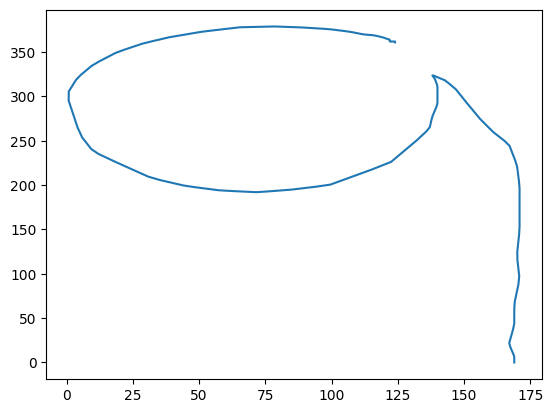

[113.         113.         113.         113.04268293 113.3902439
 113.73780488 113.91463415 113.56707317 113.2195122  113.
 113.         113.         113.         113.         113.
 113.         113.         113.         113.         113.
 113.         112.70121951 112.35365854 112.00609756 111.65853659
 111.31097561 110.8902439  109.84756098 108.80487805 107.76219512
 106.7195122  105.67682927 103.41463415  98.89634146  94.37804878
  89.8597561   85.34146341  80.82317073  75.8902439   70.67682927
  65.46341463  60.25        55.03658537  49.82317073  44.6097561
  39.39634146  34.18292683  30.98170732  27.85365854  24.81707317
  22.73170732  20.64634146  19.58536585  22.36585366  25.14634146
  28.62195122  33.48780488  38.35365854  43.37804878  48.59146341
  53.80487805  60.02439024  66.97560976  73.92682927  81.12195122
  88.42073171  95.7195122  103.59146341 111.58536585 119.57926829
 127.57317073 135.56707317 143.58536585 151.92682927 160.26829268
 168.34146341 175.29268293 182.24390

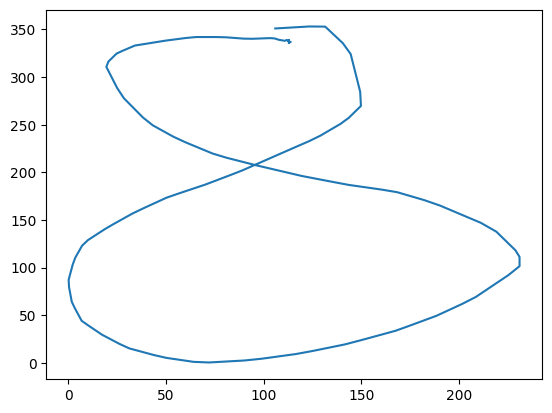

[1.27000000e+02 1.27347561e+02 1.27695122e+02 1.28000000e+02
 1.28000000e+02 1.28000000e+02 1.28085366e+02 1.28432927e+02
 1.28780488e+02 1.28871951e+02 1.28524390e+02 1.28176829e+02
 1.28000000e+02 1.28000000e+02 1.28000000e+02 1.27786585e+02
 1.27439024e+02 1.27091463e+02 1.27000000e+02 1.27000000e+02
 1.27000000e+02 1.26402439e+02 1.25707317e+02 1.25012195e+02
 1.23975610e+02 1.22932927e+02 1.21780488e+02 1.19695122e+02
 1.17609756e+02 1.15365854e+02 1.12585366e+02 1.09804878e+02
 1.06902439e+02 1.03774390e+02 1.00646341e+02 9.50487805e+01
 8.67073171e+01 7.83658537e+01 7.18902439e+01 6.66768293e+01
 6.14634146e+01 5.65000000e+01 5.16341463e+01 4.67682927e+01
 3.89756098e+01 3.06341463e+01 2.22926829e+01 1.69695122e+01
 1.17560976e+01 6.78658537e+00 4.35365854e+00 1.92073171e+00
 7.31707317e-02 4.20731707e-01 7.68292683e-01 1.46341463e+00
 2.85365854e+00 4.24390244e+00 6.10975610e+00 8.54268293e+00
 1.09756098e+01 1.38109756e+01 1.69390244e+01 2.00670732e+01
 2.39268293e+01 2.809756

KeyboardInterrupt: 

In [70]:
from scipy.interpolate import interp1d

for i in XtrainArr:
    data1=[0,1]
    data = i[0]
    arrayx = data[0]
    arrayy = data[1]
    subRealArr = np.linspace(0, 164, num=len(data[0]), endpoint=True)
    desiredArr = np.linspace(0, 164, 165, endpoint=True)
    arrayx = interp1d(subRealArr, arrayx, kind='linear', fill_value="extrapolate")(desiredArr)
    arrayy = interp1d(subRealArr, arrayy, kind='linear', fill_value="extrapolate")(desiredArr) 
    print(arrayx)
    print(arrayy)
    plt.plot(arrayx,arrayy)
    plt.show()


In [5]:
print(len(YtrainArr))

200


OutputCheck

85
85


TypeError: object of type 'numpy.uint16' has no len()

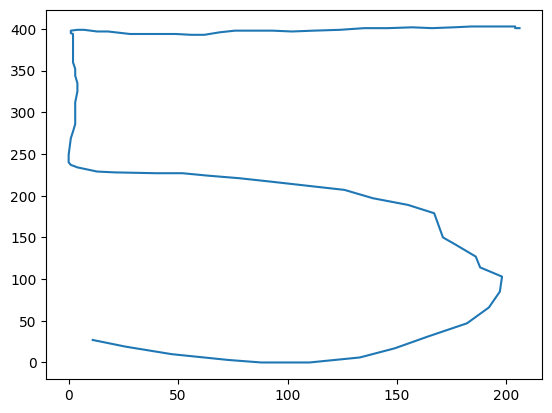

In [27]:
index = 188
i = XtrainArr[index]
data = i[0]
print(len(data[0]))
print(len(data[1]))
plt.plot(data[0],data[1])
i = resized_data[index]
data = i[0]
print(len(data[0]))
print(len(data[1]))
plt.plot(data[0],data[1],"r--")
plt.show()
print("--------")

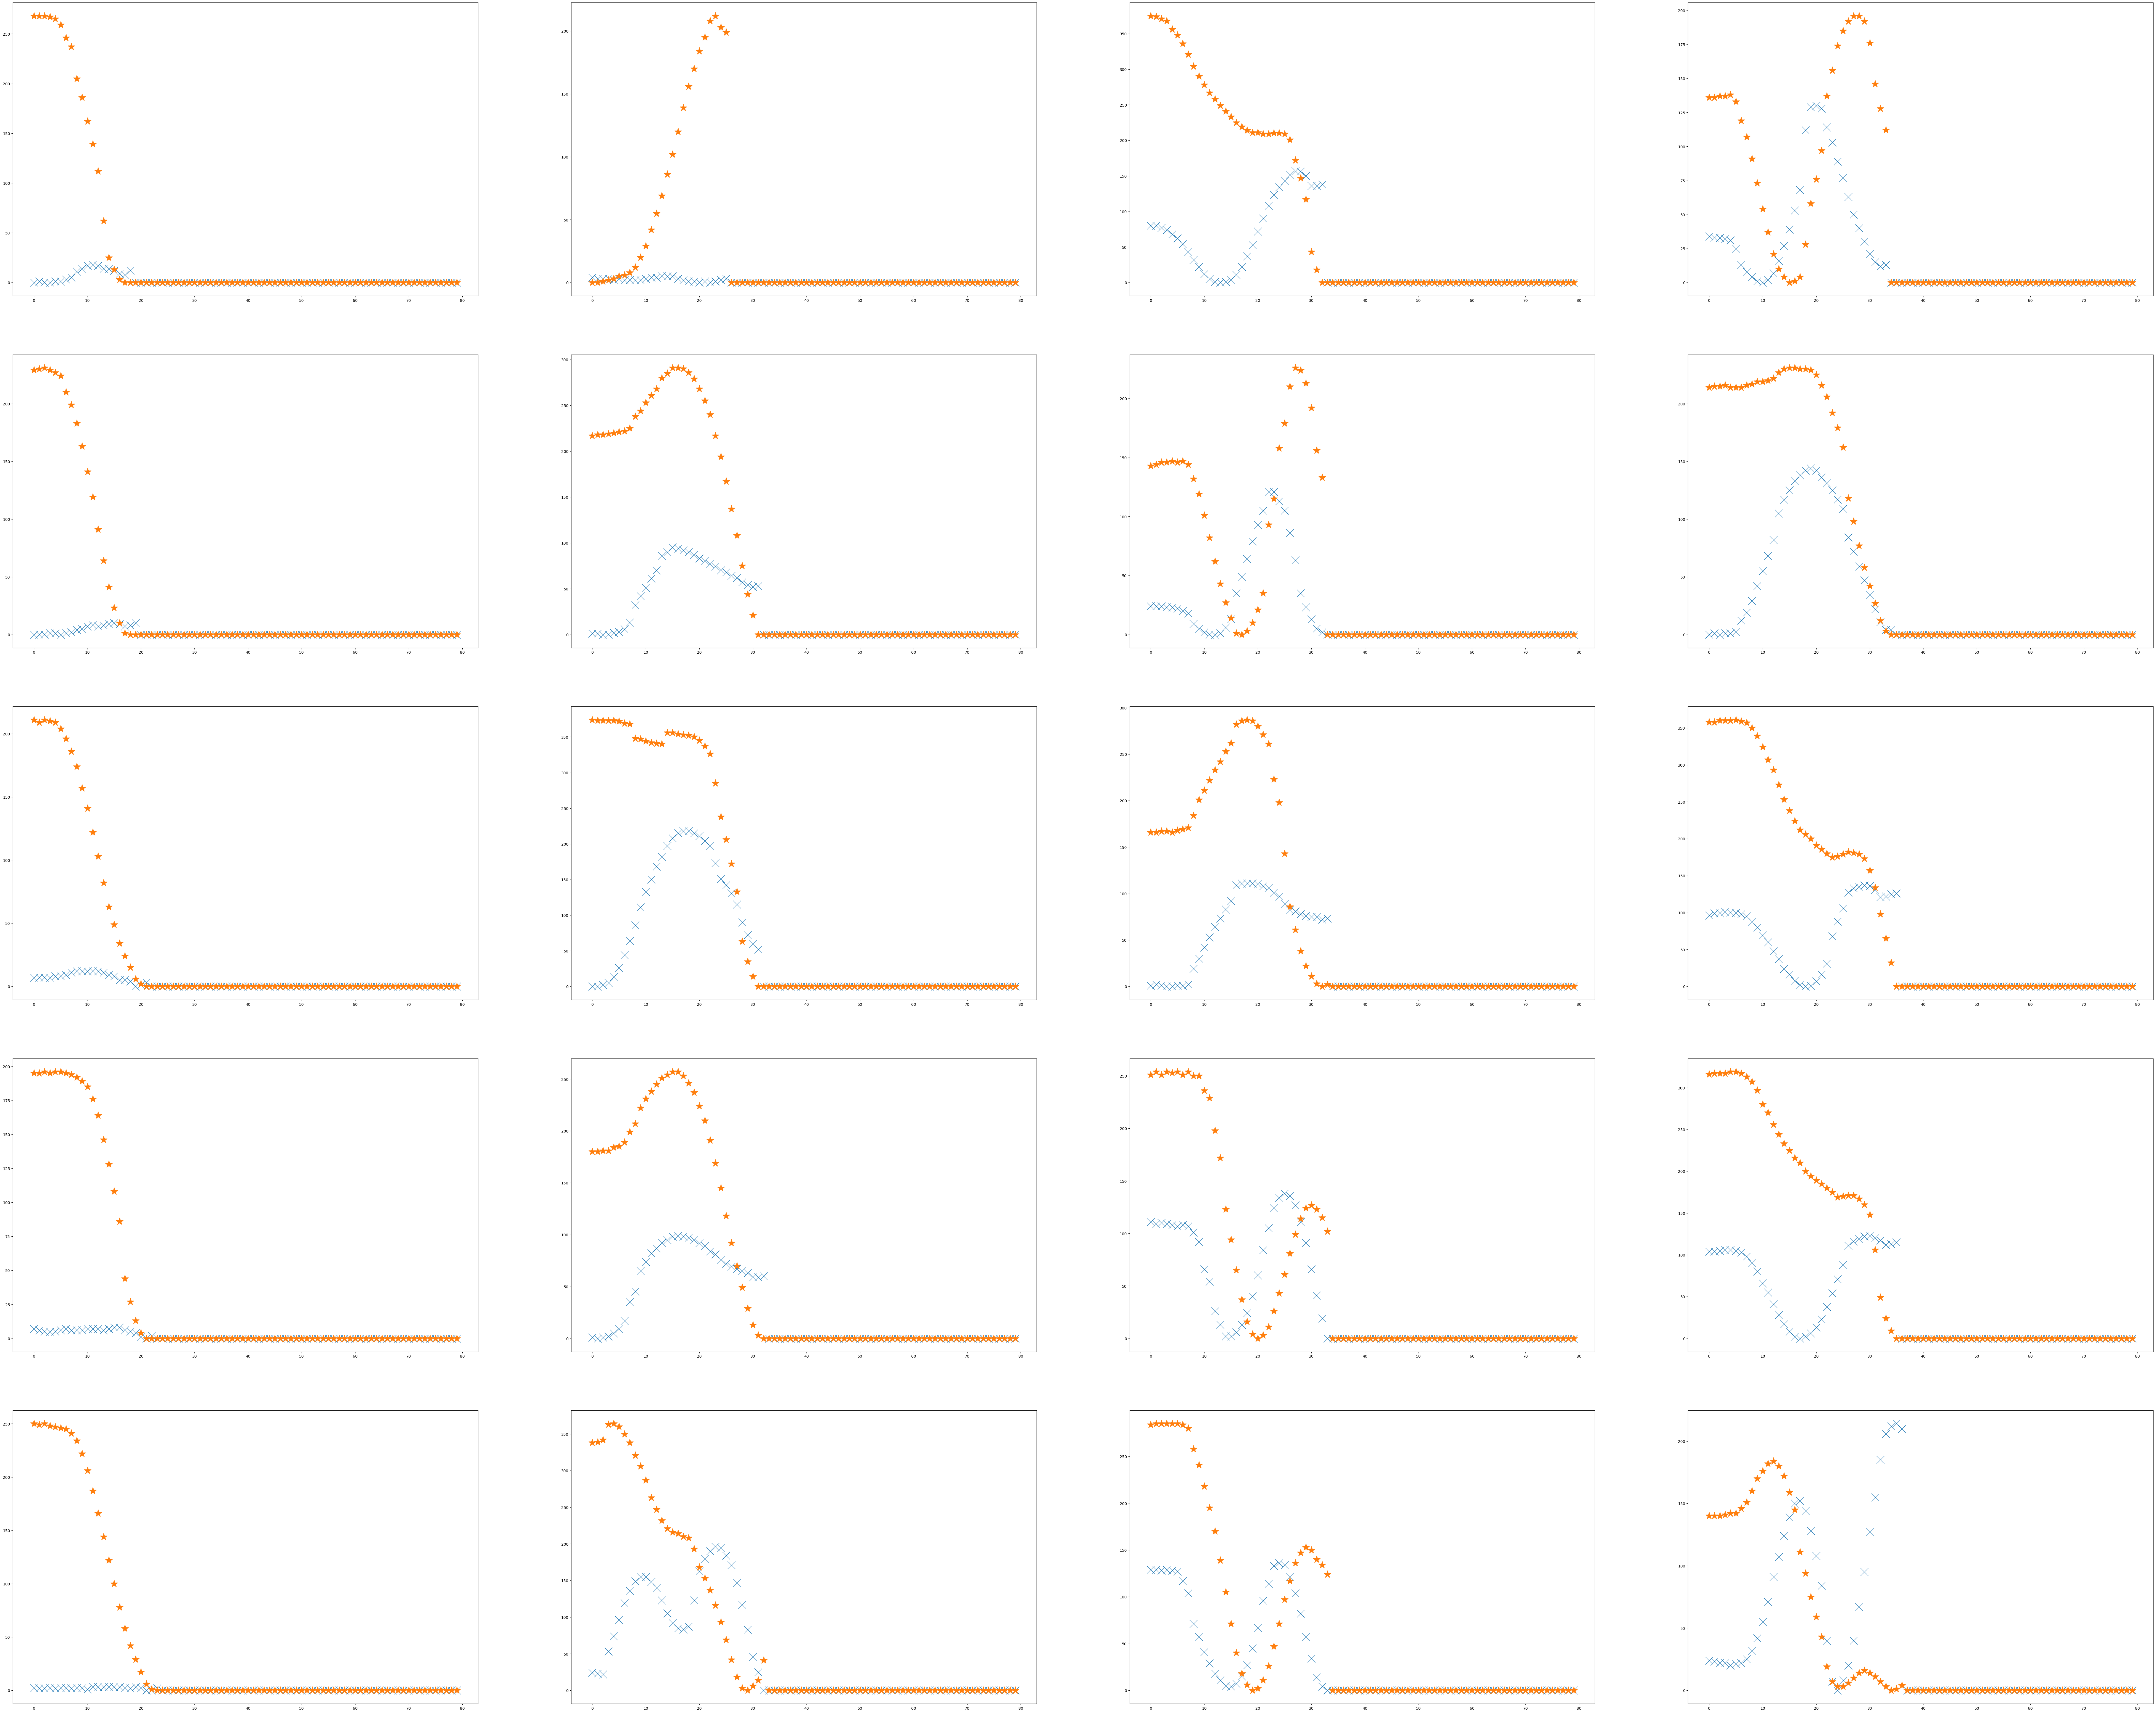

In [7]:
NumOfPrints = 0
NumOfPrintsRow = 0
fig, axes = plt.subplots(5, 4, figsize=(5 * 20, 4*20)) 
for i in resized_data:
    data = i[0]
    xpoints, ypoints = data[0], data[1]
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(xpoints)),xpoints,marker="x",linestyle=' ',markersize=20)
    axes[NumOfPrints%5,NumOfPrintsRow].plot(range(0,len(ypoints)),ypoints,marker="*",linestyle=' ',markersize=20)
    NumOfPrints+=1
    if NumOfPrints%5 == 0:
        NumOfPrintsRow+=1
    if NumOfPrints>19:
        break
plt.show() 

In [ ]:
print(resized_data)

In [ ]:
print(YtrainArr)

In [4]:
print(max([len(seq[0]) for seq in resized_data]))
print(max([len(seq[0]) for seq in XtrainArr]))

2
2


In [5]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.optim as optim

In [8]:
resized_data = np.array(resized_data)
resized_data = np.squeeze(resized_data)
print(resized_data.shape)

(200, 2, 80)


In [9]:
YtrainArrN = np.array(YtrainArr)
YtrainArrN=YtrainArrN.squeeze()  
print(YtrainArrN.shape)

(200,)


In [10]:
resized_test = np.array(resized_test)
resized_test = np.squeeze(resized_test)
print(resized_test.shape)

(98, 2, 80)


In [11]:
YtestArrN = np.array(YtestArr)
YtestArrN=YtestArrN.squeeze()  
print(YtestArrN.shape)

(98,)


In [13]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from torch.optim import Adam
max_len = max([len(seq[0]) for seq in resized_data])  
print(max_len)
Xdata = torch.tensor(resized_data, dtype=torch.float32)
Ydata = torch.tensor(YtrainArrN, dtype=torch.long)  
Xtest = torch.tensor(resized_test, dtype=torch.float32)
Ytest = torch.tensor(YtestArrN, dtype=torch.long)  

train_data = TensorDataset(Xdata, Ydata)
test_data = TensorDataset(Xtest, Ytest)

train_loader = DataLoader(train_data, batch_size=18, shuffle=True)
test_loader = DataLoader(test_data, batch_size=15, shuffle=True)

80


Choose difrent data len


In [28]:
classes = torch.unique(Ydata)

selected_indices = []

for c in classes:
    indices = (Ydata == c).nonzero(as_tuple=True)[0]
    indices = indices[torch.randperm(len(indices))]
    selected_c_indices = indices[:10]
    selected_indices.append(selected_c_indices)

selected_indices = torch.cat(selected_indices)

Xdata_selected = Xdata[selected_indices]
Ydata_selected = Ydata[selected_indices]

train_data10 = TensorDataset(Xdata_selected, Ydata_selected)
train_loader10 = DataLoader(train_data, batch_size=18, shuffle=True)

In [29]:
classes = torch.unique(Ydata)

selected_indices = []

for c in classes:
    indices = (Ydata == c).nonzero(as_tuple=True)[0]
    indices = indices[torch.randperm(len(indices))]
    selected_c_indices = indices[:15]
    selected_indices.append(selected_c_indices)

selected_indices = torch.cat(selected_indices)

Xdata_selected = Xdata[selected_indices]
Ydata_selected = Ydata[selected_indices]

train_data15 = TensorDataset(Xdata_selected, Ydata_selected)
train_loader15 = DataLoader(train_data, batch_size=18, shuffle=True)

Struktura

In [14]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_hidden_state = lstm_out[:, -1, :]
        x = self.fc1(final_hidden_state)
        return x
input_size = 80  
hidden_size = 64
output_size = 11

model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)


In [38]:
class LSTMModel128(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_hidden_state = lstm_out[:, -1, :]
        x = self.fc1(final_hidden_state)
        return x
input_size = 80  
hidden_size = 128
output_size = 11

model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)


In [23]:
class LSTMModel32(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, batch_first=True)
        self.fc1 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        final_hidden_state = lstm_out[:, -1, :]
        x = self.fc1(final_hidden_state)
        return x
input_size = 80  
hidden_size = 32
output_size = 11

model = LSTMModel(input_size=input_size, hidden_size=hidden_size, output_size=output_size)


In [40]:
from torch.optim.lr_scheduler import StepLR
criterion = nn.CrossEntropyLoss()  
optimizer = Adam(model.parameters(), lr=0.001)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.5) 
# scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

Trenovanie samples

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
epochs = 100
batch_size = 20

conf_train_matrix = []
loss_timeline = []
acc_timeline = []
val_loss_timeline = []
val_acc_timeline = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader10:
        optimizer.zero_grad()
        if len(inputs.shape) == 4:
            inputs = inputs.squeeze(1) 

        outputs = model(inputs)

        # labels = labels.squeeze()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    loss_timeline.append(running_loss / len(train_loader10))
    acc_timeline.append(accuracy * 100)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader10):.4f}, Accuracy: {accuracy*100:.2f}%")

    if epoch == epochs - 1:  
        conf_train_matrix = confusion_matrix(all_labels, all_preds)




Epoch 1/100, Loss: 2.2712, Accuracy: 25.50%
Epoch 2/100, Loss: 1.9800, Accuracy: 50.00%
Epoch 3/100, Loss: 1.8575, Accuracy: 53.50%
Epoch 4/100, Loss: 1.7529, Accuracy: 69.00%
Epoch 5/100, Loss: 1.6433, Accuracy: 74.00%
Epoch 6/100, Loss: 1.5464, Accuracy: 69.00%
Epoch 7/100, Loss: 1.4338, Accuracy: 73.00%
Epoch 8/100, Loss: 1.3532, Accuracy: 78.00%
Epoch 9/100, Loss: 1.2709, Accuracy: 76.00%
Epoch 10/100, Loss: 1.2097, Accuracy: 76.00%
Epoch 11/100, Loss: 1.1667, Accuracy: 83.50%
Epoch 12/100, Loss: 1.0774, Accuracy: 83.50%
Epoch 13/100, Loss: 1.0950, Accuracy: 83.50%
Epoch 14/100, Loss: 1.0258, Accuracy: 83.00%
Epoch 15/100, Loss: 0.9784, Accuracy: 86.00%
Epoch 16/100, Loss: 0.8632, Accuracy: 84.50%
Epoch 17/100, Loss: 0.9277, Accuracy: 82.50%
Epoch 18/100, Loss: 0.8370, Accuracy: 81.00%
Epoch 19/100, Loss: 0.8277, Accuracy: 82.50%
Epoch 20/100, Loss: 0.7926, Accuracy: 84.00%
Epoch 21/100, Loss: 0.7368, Accuracy: 84.00%
Epoch 22/100, Loss: 0.6901, Accuracy: 86.00%
Epoch 23/100, Loss:

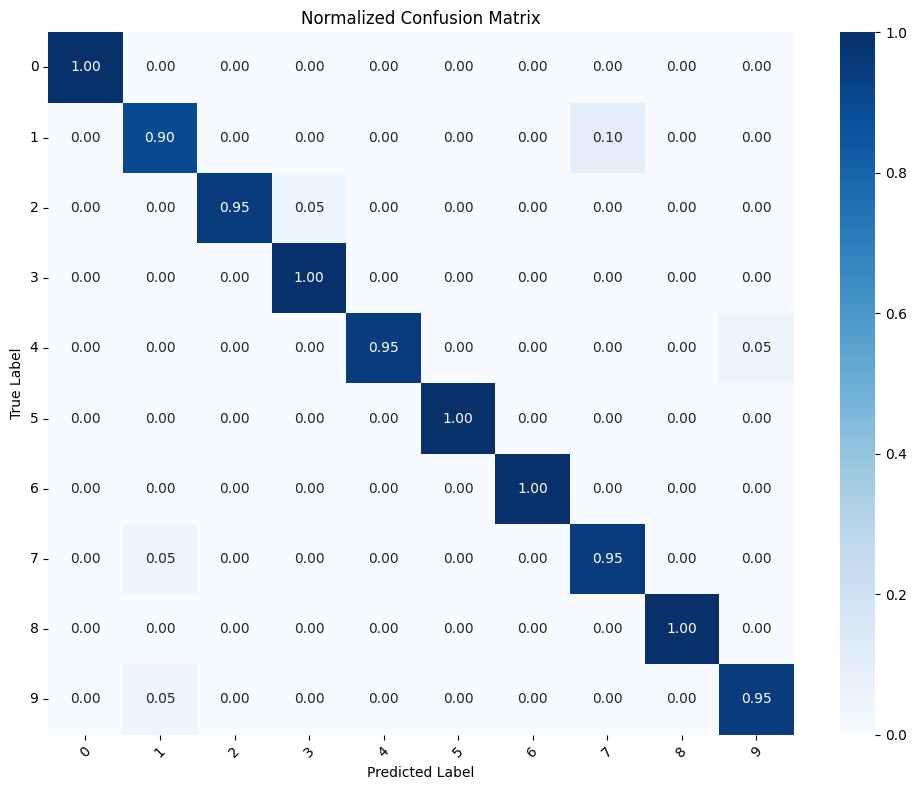

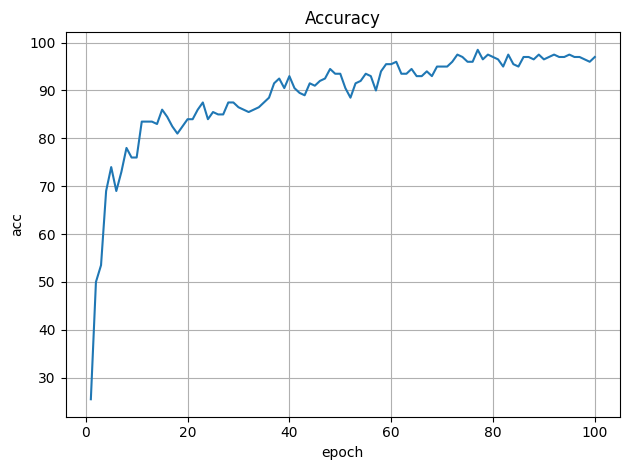

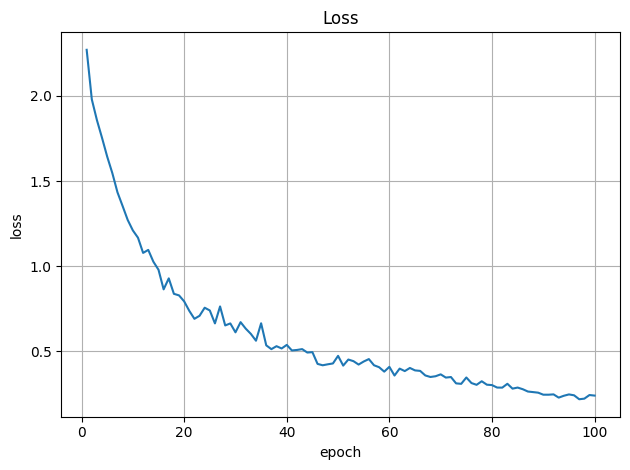

In [42]:
import seaborn as sns
cm_normalized = conf_train_matrix.astype('float') / conf_train_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),acc_timeline)
# plt.plot(np.linspace(1, epochs, epochs),val_acc_timeline)
plt.title("Accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),loss_timeline)
# plt.plot(np.linspace(1, epochs, epochs),val_loss_timeline)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

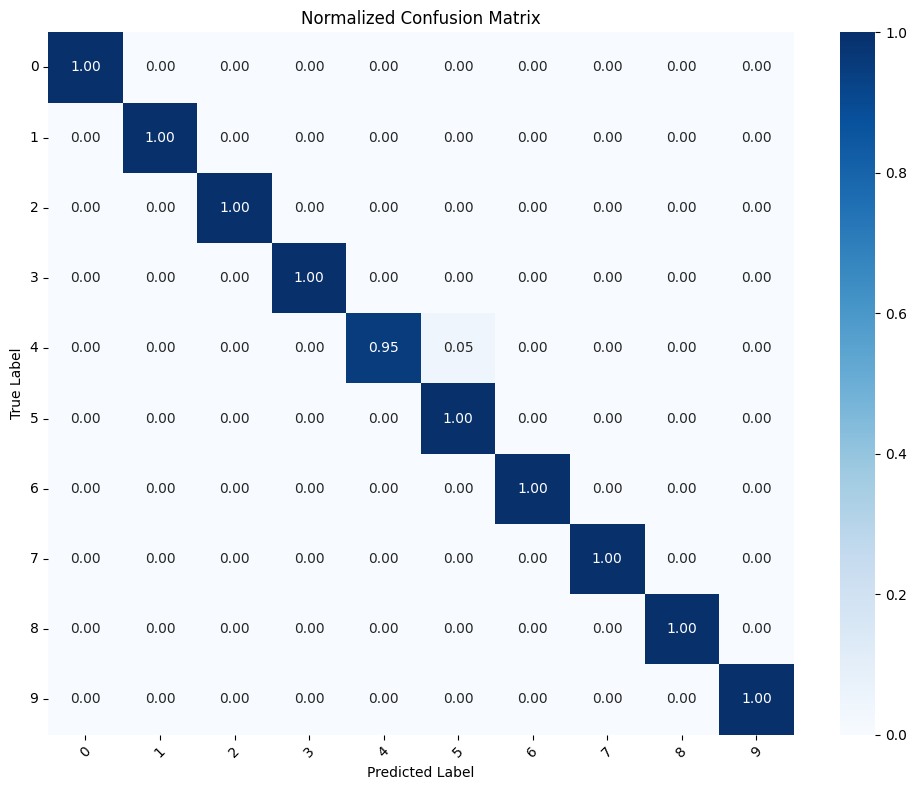

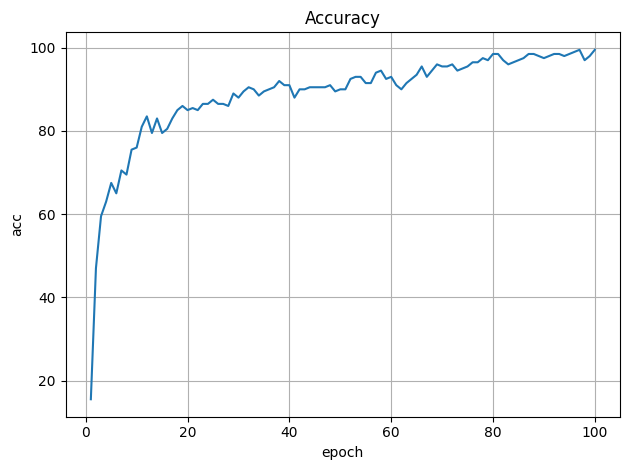

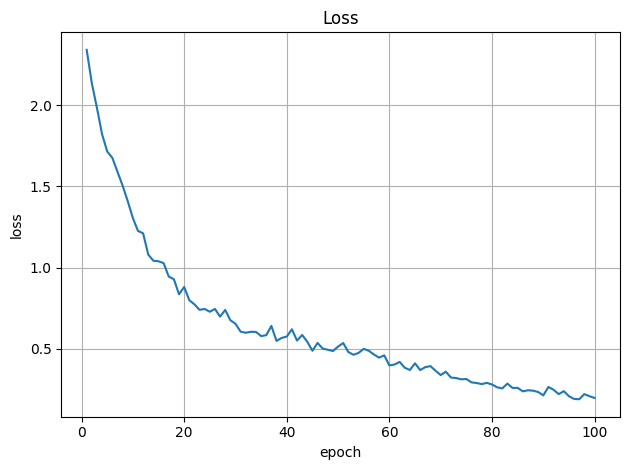

In [37]:
import seaborn as sns
cm_normalized = conf_train_matrix.astype('float') / conf_train_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),acc_timeline)
# plt.plot(np.linspace(1, epochs, epochs),val_acc_timeline)
plt.title("Accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),loss_timeline)
# plt.plot(np.linspace(1, epochs, epochs),val_loss_timeline)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

Trenovanie


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
epochs = 100
batch_size = 20

conf_train_matrix = []
loss_timeline = []
acc_timeline = []
val_loss_timeline = []
val_acc_timeline = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        if len(inputs.shape) == 4:
            inputs = inputs.squeeze(1) 

        outputs = model(inputs)

        # labels = labels.squeeze()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    loss_timeline.append(running_loss / len(train_loader))
    acc_timeline.append(accuracy * 100)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy*100:.2f}%")


    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():  
        for val_inputs, val_labels_batch in test_loader:
            if len(val_inputs.shape) == 4:
                val_inputs = val_inputs.squeeze(1) 
            val_outputs = model(val_inputs)
            val_labels_batch 

            val_loss = criterion(val_outputs, val_labels_batch)
            val_running_loss += val_loss.item()

            _, val_preds_batch = torch.max(val_outputs, 1)
            val_preds.extend(val_preds_batch.cpu().numpy())
            val_labels.extend(val_labels_batch.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    val_loss_timeline.append(val_running_loss / len(test_loader))
    val_acc_timeline.append(val_accuracy * 100)
    print(f"Validation Loss: {val_running_loss/len(test_loader):.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

    if epoch == epochs - 1:  
        conf_train_matrix = confusion_matrix(all_labels, all_preds)




Epoch 1/100, Loss: 2.3537, Accuracy: 16.00%
Validation Loss: 2.2117, Validation Accuracy: 27.55%
Epoch 2/100, Loss: 2.1904, Accuracy: 27.00%
Validation Loss: 2.1205, Validation Accuracy: 33.67%
Epoch 3/100, Loss: 2.1047, Accuracy: 42.00%
Validation Loss: 2.0474, Validation Accuracy: 41.84%
Epoch 4/100, Loss: 2.0400, Accuracy: 49.50%
Validation Loss: 1.9813, Validation Accuracy: 57.14%
Epoch 5/100, Loss: 1.9684, Accuracy: 59.00%
Validation Loss: 1.9198, Validation Accuracy: 62.24%
Epoch 6/100, Loss: 1.8931, Accuracy: 64.00%
Validation Loss: 1.8616, Validation Accuracy: 57.14%
Epoch 7/100, Loss: 1.8409, Accuracy: 61.50%
Validation Loss: 1.8263, Validation Accuracy: 67.35%
Epoch 8/100, Loss: 1.8260, Accuracy: 67.00%
Validation Loss: 1.7631, Validation Accuracy: 73.47%
Epoch 9/100, Loss: 1.7609, Accuracy: 70.50%
Validation Loss: 1.7273, Validation Accuracy: 75.51%
Epoch 10/100, Loss: 1.6525, Accuracy: 76.50%
Validation Loss: 1.6776, Validation Accuracy: 77.55%
Epoch 11/100, Loss: 1.6571, A

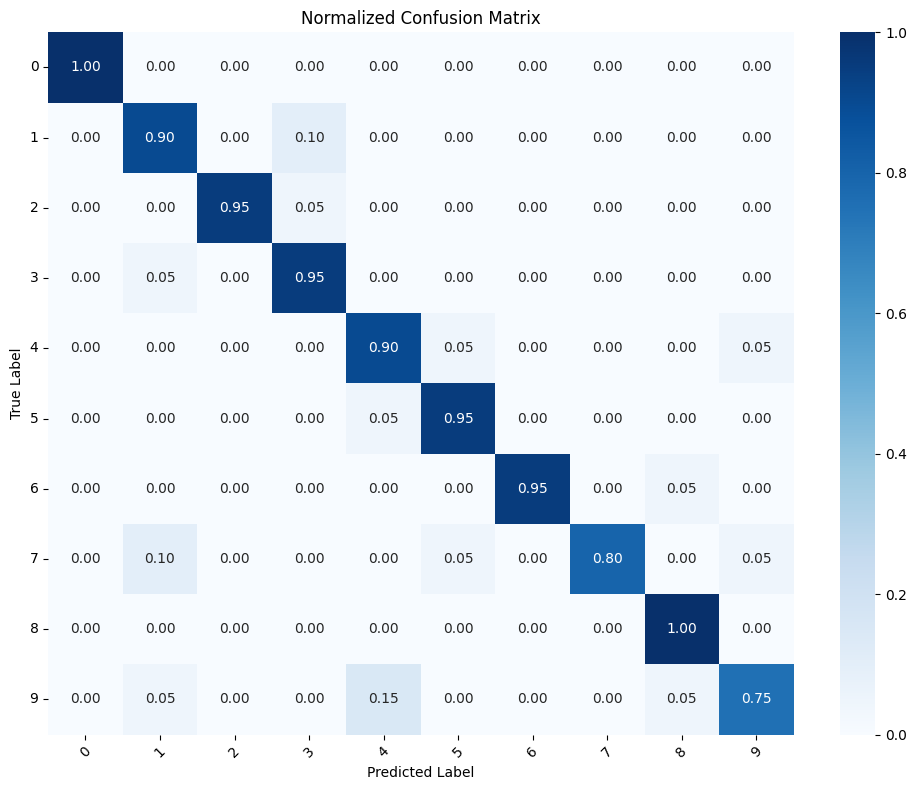

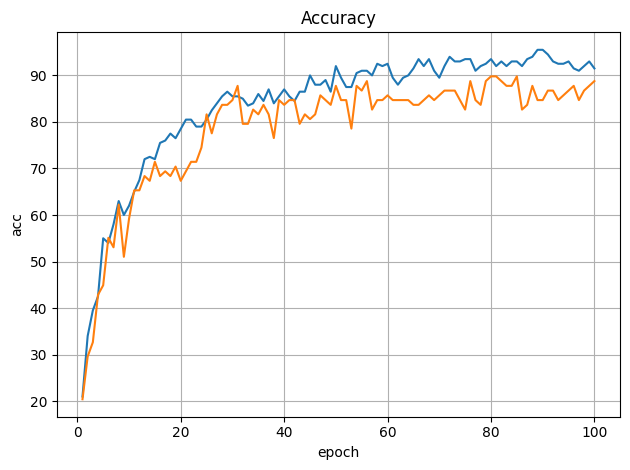

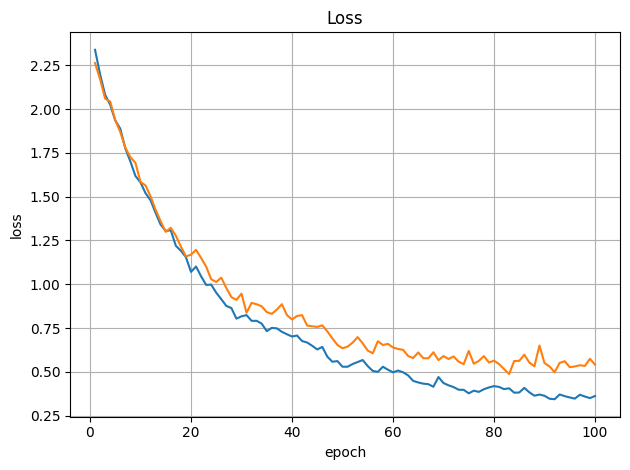

In [84]:
import seaborn as sns
cm_normalized = conf_train_matrix.astype('float') / conf_train_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),acc_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_acc_timeline)
plt.title("Accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),loss_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_loss_timeline)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

Train 128

In [20]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
epochs = 100
batch_size = 20

conf_train_matrix = []
loss_timeline = []
acc_timeline = []
val_loss_timeline = []
val_acc_timeline = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        if len(inputs.shape) == 4:
            inputs = inputs.squeeze(1) 

        outputs = model(inputs)

        # labels = labels.squeeze()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    loss_timeline.append(running_loss / len(train_loader))
    acc_timeline.append(accuracy * 100)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy*100:.2f}%")


    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():  
        for val_inputs, val_labels_batch in test_loader:
            if len(val_inputs.shape) == 4:
                val_inputs = val_inputs.squeeze(1) 
            val_outputs = model(val_inputs)
            val_labels_batch 

            val_loss = criterion(val_outputs, val_labels_batch)
            val_running_loss += val_loss.item()

            _, val_preds_batch = torch.max(val_outputs, 1)
            val_preds.extend(val_preds_batch.cpu().numpy())
            val_labels.extend(val_labels_batch.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    val_loss_timeline.append(val_running_loss / len(test_loader))
    val_acc_timeline.append(val_accuracy * 100)
    print(f"Validation Loss: {val_running_loss/len(test_loader):.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

    if epoch == epochs - 1:  
        conf_train_matrix = confusion_matrix(all_labels, all_preds)




Epoch 1/100, Loss: 2.2594, Accuracy: 24.50%
Validation Loss: 2.0632, Validation Accuracy: 51.02%
Epoch 2/100, Loss: 2.0230, Accuracy: 57.00%
Validation Loss: 1.9297, Validation Accuracy: 61.22%
Epoch 3/100, Loss: 1.8753, Accuracy: 67.00%
Validation Loss: 1.8168, Validation Accuracy: 67.35%
Epoch 4/100, Loss: 1.7700, Accuracy: 71.00%
Validation Loss: 1.7379, Validation Accuracy: 59.18%
Epoch 5/100, Loss: 1.6726, Accuracy: 74.00%
Validation Loss: 1.5587, Validation Accuracy: 66.33%
Epoch 6/100, Loss: 1.5157, Accuracy: 75.50%
Validation Loss: 1.4672, Validation Accuracy: 69.39%
Epoch 7/100, Loss: 1.3838, Accuracy: 74.50%
Validation Loss: 1.3614, Validation Accuracy: 71.43%
Epoch 8/100, Loss: 1.3015, Accuracy: 76.50%
Validation Loss: 1.2944, Validation Accuracy: 66.33%
Epoch 9/100, Loss: 1.2290, Accuracy: 76.50%
Validation Loss: 1.2726, Validation Accuracy: 79.59%
Epoch 10/100, Loss: 1.2211, Accuracy: 80.00%
Validation Loss: 1.2201, Validation Accuracy: 69.39%
Epoch 11/100, Loss: 1.1477, A

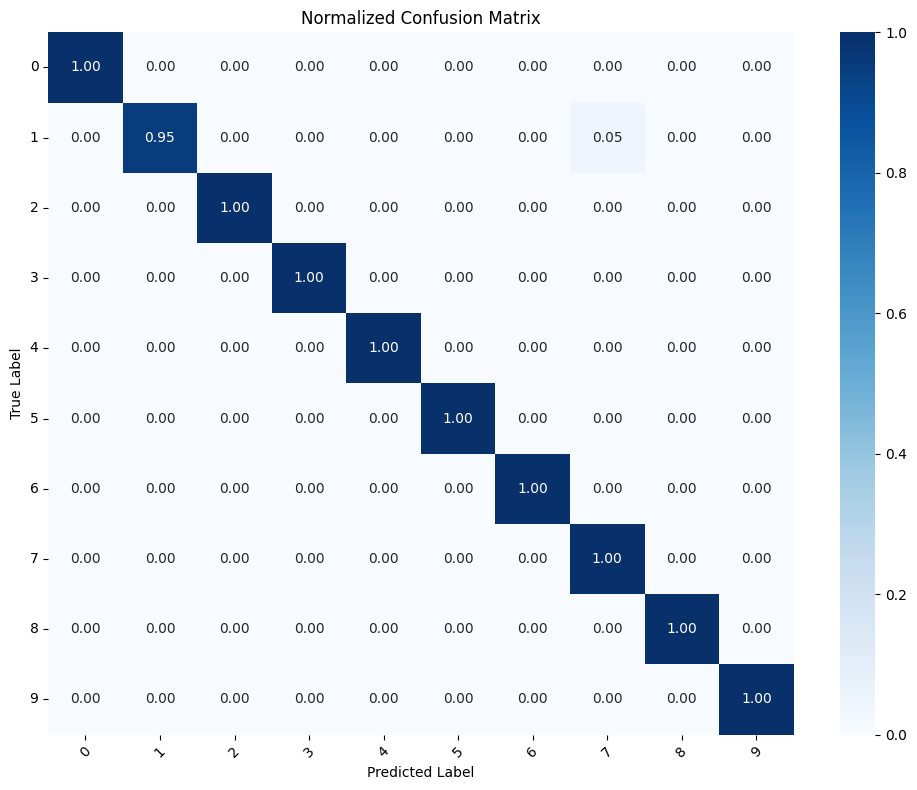

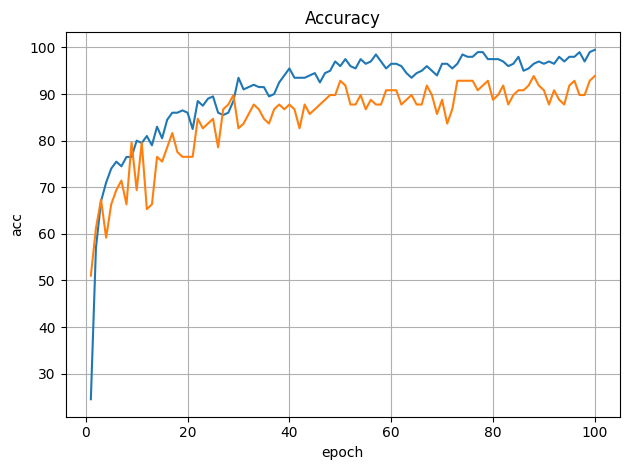

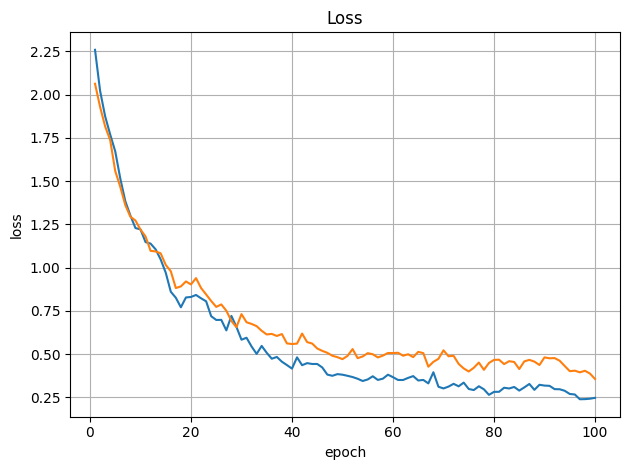

In [21]:
import seaborn as sns
cm_normalized = conf_train_matrix.astype('float') / conf_train_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),acc_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_acc_timeline)
plt.title("Accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),loss_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_loss_timeline)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

Train 32

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
epochs = 100
batch_size = 20

conf_train_matrix = []
loss_timeline = []
acc_timeline = []
val_loss_timeline = []
val_acc_timeline = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    all_preds = []
    all_labels = []

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        if len(inputs.shape) == 4:
            inputs = inputs.squeeze(1) 

        outputs = model(inputs)

        # labels = labels.squeeze()

        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_preds)
    loss_timeline.append(running_loss / len(train_loader))
    acc_timeline.append(accuracy * 100)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy*100:.2f}%")


    model.eval()
    val_running_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():  
        for val_inputs, val_labels_batch in test_loader:
            if len(val_inputs.shape) == 4:
                val_inputs = val_inputs.squeeze(1) 
            val_outputs = model(val_inputs)
            val_labels_batch 

            val_loss = criterion(val_outputs, val_labels_batch)
            val_running_loss += val_loss.item()

            _, val_preds_batch = torch.max(val_outputs, 1)
            val_preds.extend(val_preds_batch.cpu().numpy())
            val_labels.extend(val_labels_batch.cpu().numpy())

    val_accuracy = accuracy_score(val_labels, val_preds)
    val_loss_timeline.append(val_running_loss / len(test_loader))
    val_acc_timeline.append(val_accuracy * 100)
    print(f"Validation Loss: {val_running_loss/len(test_loader):.4f}, Validation Accuracy: {val_accuracy*100:.2f}%")

    if epoch == epochs - 1:  
        conf_train_matrix = confusion_matrix(all_labels, all_preds)




Epoch 1/100, Loss: 2.3831, Accuracy: 12.00%
Validation Loss: 2.3913, Validation Accuracy: 12.24%
Epoch 2/100, Loss: 2.3311, Accuracy: 17.00%
Validation Loss: 2.3273, Validation Accuracy: 17.35%
Epoch 3/100, Loss: 2.2903, Accuracy: 22.00%
Validation Loss: 2.2837, Validation Accuracy: 20.41%
Epoch 4/100, Loss: 2.2559, Accuracy: 28.50%
Validation Loss: 2.2294, Validation Accuracy: 22.45%
Epoch 5/100, Loss: 2.1819, Accuracy: 32.00%
Validation Loss: 2.1926, Validation Accuracy: 24.49%
Epoch 6/100, Loss: 2.1263, Accuracy: 35.00%
Validation Loss: 2.1448, Validation Accuracy: 30.61%
Epoch 7/100, Loss: 2.1208, Accuracy: 41.50%
Validation Loss: 2.0980, Validation Accuracy: 40.82%
Epoch 8/100, Loss: 2.0887, Accuracy: 46.00%
Validation Loss: 2.0761, Validation Accuracy: 48.98%
Epoch 9/100, Loss: 2.0387, Accuracy: 54.00%
Validation Loss: 2.0320, Validation Accuracy: 54.08%
Epoch 10/100, Loss: 1.9702, Accuracy: 60.00%
Validation Loss: 2.0037, Validation Accuracy: 54.08%
Epoch 11/100, Loss: 1.9724, A

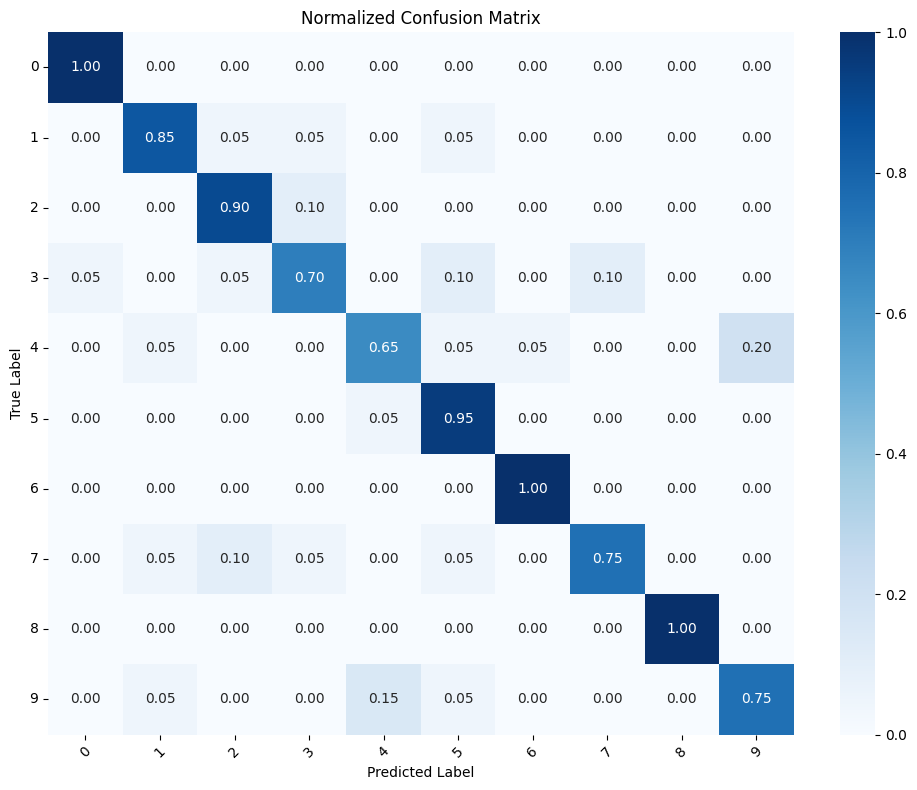

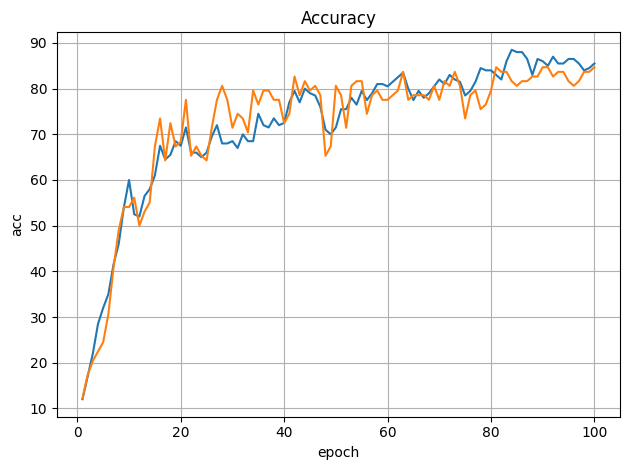

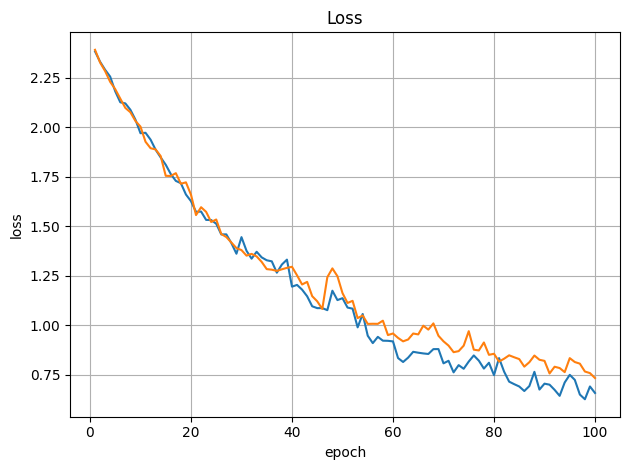

In [26]:
import seaborn as sns
cm_normalized = conf_train_matrix.astype('float') / conf_train_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),acc_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_acc_timeline)
plt.title("Accuracy")
plt.ylabel("acc")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

plt.plot(np.linspace(1, epochs, epochs),loss_timeline)
plt.plot(np.linspace(1, epochs, epochs),val_loss_timeline)
plt.title("Loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.grid()
plt.tight_layout()
plt.show()

Testovanie

Test Loss: 0.2595
Test Accuracy: 88.78%


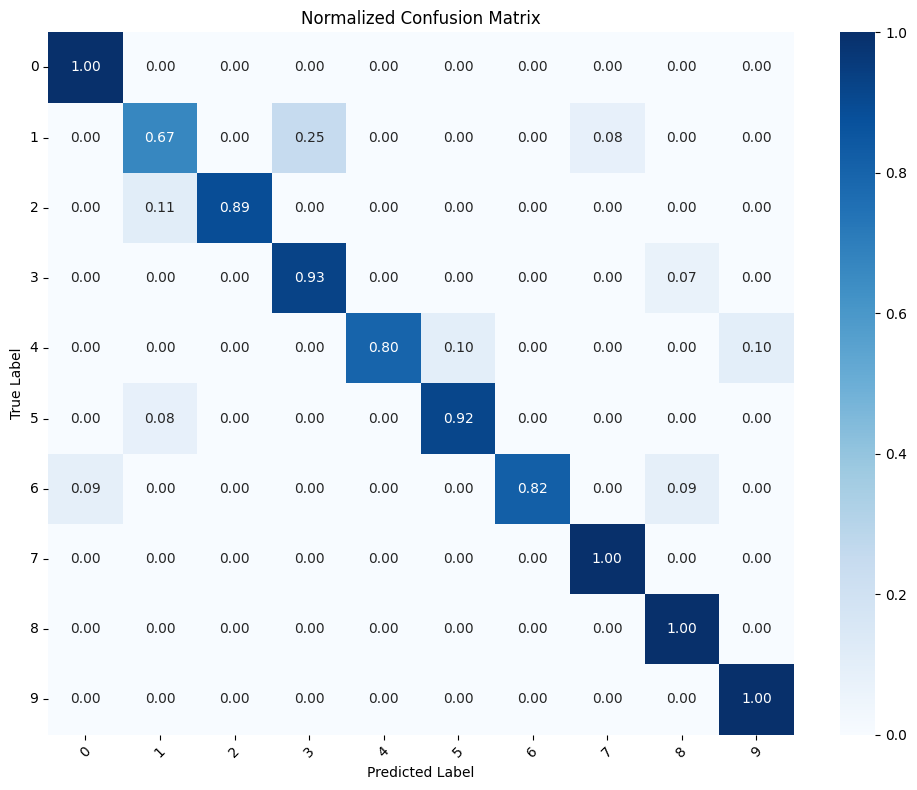

In [86]:
model.eval()

total_loss = 0.0
correct_predictions = 0
total_samples = 0

all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:  
        if len(inputs.shape) == 4:
            inputs = inputs.squeeze(1) 
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        total_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

average_loss = total_loss / len(train_loader)
accuracy = (correct_predictions / total_samples) * 100
conf_matrix = confusion_matrix(all_labels, all_preds)
print(f"Test Loss: {average_loss:.4f}")
print(f"Test Accuracy: {accuracy:.2f}%")

cm_normalized = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
class_names = ['0', '1', '2','3', '4', '5','6', '7', '8','9'] 

plt.figure(figsize=(10, 8))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

plt.title("Normalized Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()